In [1]:
from parsing import Parser
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
import optuna

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pickle import dump, load

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.gaussian_process.kernels import ConstantKernel, DotProduct, ExpSineSquared, Matern, RBF, RationalQuadratic
from xgboost import XGBClassifier
import catboost as cb
import lightgbm as lgb


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [2]:
conn = psycopg2.connect(host="localhost", dbname='cs', user='postgres', password='123456', port=5432)
cur = conn.cursor()

length = 400
start = 16

maps = []
dataset = []

query = """
        SELECT dataset.map_name
        FROM dataset
        """
cur.execute(query)
for row in cur.fetchall():
    maps.append(row[0])

for index in range(length):
    query = f"""
            SELECT dataset.t1_winstreak,dataset.t2_winstreak,dataset.t1_h2h,dataset.t2_h2h,
                            dataset.t1_ranking,dataset.t2_ranking,dataset.t1_weeks,dataset.t2_weeks,dataset.t1_age,dataset.t2_age,dataset.t1_rating,dataset.t2_rating,
                            dataset.t1_winrate,dataset.t2_winrate,dataset.t1_5v4,dataset.t2_5v4,dataset.t1_4v5,dataset.t2_4v5,dataset.t1_maps,dataset.t2_maps,  
                            dataset.t1_pistol,dataset.t2_pistol,win,betting_info.rounds_lost_{maps[index]}, betting_info.rounds_won_{maps[index]}, betting_info.fp_{maps[index]}, betting_info.fp_percent_{maps[index]}
            FROM dataset
            FULL OUTER JOIN betting_info ON dataset.t1_name = betting_info.team
            WHERE dataset.id = {start+index}
            """
    cur.execute(query)
    row = cur.fetchall()[0]
    query = f"""
            SELECT betting_info.rounds_lost_{maps[index]}, betting_info.rounds_won_{maps[index]}, betting_info.fp_{maps[index]}, betting_info.fp_percent_{maps[index]}
            FROM dataset
            FULL OUTER JOIN betting_info ON dataset.t2_name = betting_info.team
            WHERE dataset.id = {start+index}
            """
    cur.execute(query)
    row += cur.fetchall()[0]

    if start+index < 73:

        query = f"""
                SELECT blast_fall_groups2023_rating.team_rating, blast_fall_groups2023_rating.event_rating
                FROM dataset
                FULL OUTER JOIN blast_fall_groups2023_rating ON dataset.t1_name = blast_fall_groups2023_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]
        query = f"""
                SELECT blast_fall_groups2023_rating.team_rating, blast_fall_groups2023_rating.event_rating
                FROM dataset
                FULL OUTER JOIN blast_fall_groups2023_rating ON dataset.t2_name = blast_fall_groups2023_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]

    elif start+index >= 73 and start+index < 147:

        query = f"""
                SELECT iem_cologne2023_rating.team_rating, iem_cologne2023_rating.event_rating
                FROM dataset
                FULL OUTER JOIN iem_cologne2023_rating ON dataset.t1_name = iem_cologne2023_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]
        query = f"""
                SELECT iem_cologne2023_rating.team_rating, iem_cologne2023_rating.event_rating
                FROM dataset
                FULL OUTER JOIN iem_cologne2023_rating ON dataset.t2_name = iem_cologne2023_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]

    elif start+index >= 147 and start+index < 184:

        query = f"""
                SELECT gamers8_rating.team_rating, gamers8_rating.event_rating
                FROM dataset
                FULL OUTER JOIN gamers8_rating ON dataset.t1_name = gamers8_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]
        query = f"""
                SELECT gamers8_rating.team_rating, gamers8_rating.event_rating
                FROM dataset
                FULL OUTER JOIN gamers8_rating ON dataset.t2_name = gamers8_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]

    elif start+index >= 184 and start+index < 214:

        query = f"""
                SELECT dunav_rating.team_rating, dunav_rating.event_rating
                FROM dataset
                FULL OUTER JOIN dunav_rating ON dataset.t1_name = dunav_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]
        query = f"""
                SELECT dunav_rating.team_rating, dunav_rating.event_rating
                FROM dataset
                FULL OUTER JOIN dunav_rating ON dataset.t2_name = dunav_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]

    elif start+index >= 214 and start+index < 289:

        query = f"""
                SELECT cct_online_rating.team_rating, cct_online_rating.event_rating
                FROM dataset
                FULL OUTER JOIN cct_online_rating ON dataset.t1_name = cct_online_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]
        query = f"""
                SELECT cct_online_rating.team_rating, cct_online_rating.event_rating
                FROM dataset
                FULL OUTER JOIN cct_online_rating ON dataset.t2_name = cct_online_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]

    elif start+index >= 289 and start+index < 401:

        query = f"""
                SELECT cct_north_rating.team_rating, cct_north_rating.event_rating
                FROM dataset
                FULL OUTER JOIN cct_north_rating ON dataset.t1_name = cct_north_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]
        query = f"""
                SELECT cct_north_rating.team_rating, cct_north_rating.event_rating
                FROM dataset
                FULL OUTER JOIN cct_north_rating ON dataset.t2_name = cct_north_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]

    elif start+index >= 401:

        query = f"""
                SELECT iem_sydney_rating.team_rating, iem_sydney_rating.event_rating
                FROM dataset
                FULL OUTER JOIN iem_sydney_rating ON dataset.t1_name = iem_sydney_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]
        query = f"""
                SELECT iem_sydney_rating.team_rating, iem_sydney_rating.event_rating
                FROM dataset
                FULL OUTER JOIN iem_sydney_rating ON dataset.t2_name = iem_sydney_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]


    dataset.append(row)
conn.close()

In [3]:
df = pd.DataFrame(dataset, columns=["t1_winstreak","t2_winstreak","t1_h2h","t2_h2h",
                            "t1_ranking","t2_ranking","t1_weeks","t2_weeks","t1_age","t2_age","t1_rating","t2_rating",
                            "t1_winrate","t2_winrate","t1_5v4","t2_5v4","t1_4v5","t2_4v5","t1_maps","t2_maps",  
                            "t1_pistol","t2_pistol","win","t1_rounds_lost", "t1_rounds_won", "t1_fp", "t1_fp_percent",
                            "t2_rounds_lost", "t2_rounds_won", "t2_fp", "t2_fp_percent","t1_team_rating","t1_event_rating",
                            "t2_team_rating","t2_event_rating"])
df.head()

t1_winstreak  t2_winstreak  t1_h2h  t2_h2h  t1_ranking  t2_ranking   
0           0.0           0.0     0.0     0.0         9.0         4.0  \
1           0.0           0.0     0.0     0.0         9.0         4.0   
2           0.0           0.0     0.0     1.0         1.0        24.0   
3           0.0           0.0     0.0     1.0         1.0        24.0   
4           0.0           0.0     2.0     1.0        13.0         6.0   

   t1_weeks  t2_weeks  t1_age  t2_age  t1_rating  t2_rating  t1_winrate   
0       6.0      83.0    24.2    25.7       5.11       5.42       0.600  \
1       6.0      83.0    24.2    25.7       5.11       5.42       0.571   
2      85.0      16.0    24.4    23.4       5.49       5.24       0.667   
3      85.0      16.0    24.4    23.4       5.49       5.24       0.800   
4      54.0      35.0    23.2    23.5       5.06       5.41       0.200   

   t2_winrate  t1_5v4  t2_5v4  t1_4v5  t2_4v5  t1_maps  t2_maps  t1_pistol   
0       0.562   0.662   0.756   0.281   0.298      5.0     16.0      0.500  \
1       0.500   0.689   0.764   0.264   0.282      7.0     10.0      0.714   
2       0.333   0.734   0.703   0.293   0.243      9.0      3.0      0.500   
3       0.500   0.803   0.661   0.336   0.220     10.0      4.0      0.500   
4       0.615   0.727   0.780   0.205   0.273      5.0     13.0      0.700   

   t2_pistol    win  t1_rounds_lost  t1_rounds_won  t1_fp  t1_fp_percent   
0      0.656   True           14.00          10.50  False           0.07  \
1      0.350   True           11.75           7.33   True           0.29   
2      0.333   True           13.00           9.33   True           0.24   
3      0.750   True            9.50           9.00  False           0.12   
4      0.423  False            9.00          10.00  False           0.16   

   t2_rounds_lost  t2_rounds_won  t2_fp  t2_fp_percent  t1_team_rating   
0            8.50          11.33   True           0.61            1.04  \
1           10.50          11.50  False           0.10            1.04   
2            7.00           9.50  False           0.15            1.16   
3           13.00           8.00  False           0.15            1.16   
4            8.43          10.20  False           0.28            0.99   

   t1_event_rating  t2_team_rating  t2_event_rating  
0             5.20            1.03             5.16  
1             5.20            1.03             5.16  
2             5.82            0.97             4.85  
3             5.82            0.97             4.85  
4             4.96            1.12             5.61

In [4]:
df.describe()

t1_winstreak  t2_winstreak      t1_h2h     t2_h2h  t1_ranking   
count    400.000000    400.000000  400.000000  400.00000  400.000000  \
mean       0.922500      0.837500    1.732500    1.37250   24.550000   
std        1.992843      1.906615    2.944081    2.47367   22.519554   
min        0.000000      0.000000    0.000000    0.00000    1.000000   
25%        0.000000      0.000000    0.000000    0.00000    8.000000   
50%        0.000000      0.000000    0.000000    0.00000   20.000000   
75%        0.000000      0.000000    2.000000    2.00000   34.000000   
max        9.000000      9.000000   17.000000   14.00000  154.000000   

       t2_ranking    t1_weeks    t2_weeks      t1_age      t2_age   t1_rating   
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000  \
mean    34.040000   44.877500   32.902500   24.042000   23.611750    5.303025   
std     30.925789   49.580521   43.327198    1.663341    1.802668    0.216144   
min      1.000000    0.000000    0.000000   19.900000   19.200000    4.350000   
25%     11.000000    3.000000    0.000000   22.850000   22.700000    5.220000   
50%     24.000000   25.000000   16.000000   24.100000   23.500000    5.290000   
75%     50.000000   77.000000   64.000000   25.500000   25.200000    5.420000   
max    155.000000  175.000000  240.000000   27.400000   27.400000    5.710000   

        t2_rating  t1_winrate  t2_winrate      t1_5v4      t2_5v4      t1_4v5   
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000  \
mean     5.200075    0.563078    0.521918    0.729175    0.717800    0.298268   
std      0.275409    0.193000    0.209260    0.059591    0.064269    0.053438   
min      4.270000    0.000000    0.000000    0.286000    0.263000    0.120000   
25%      5.100000    0.444000    0.400000    0.697750    0.686000    0.268000   
50%      5.230000    0.571000    0.500000    0.730000    0.724500    0.293000   
75%      5.410000    0.700000    0.667000    0.763250    0.762000    0.331000   
max      5.710000    1.000000    1.000000    0.871000    0.871000    0.500000   

           t2_4v5     t1_maps     t2_maps   t1_pistol   t2_pistol   
count  400.000000  400.000000  400.000000  400.000000  400.000000  \
mean     0.288328    9.625000    9.302500    0.498440    0.513025   
std      0.054236    5.433524    5.458983    0.131048    0.152608   
min      0.083000    1.000000    1.000000    0.000000    0.000000   
25%      0.256000    6.000000    5.000000    0.429000    0.438000   
50%      0.288000    9.000000    8.000000    0.500000    0.500000   
75%      0.323000   12.000000   12.000000    0.583000    0.602750   
max      0.446000   28.000000   28.000000    1.000000    1.000000   

       t1_rounds_lost  t1_rounds_won  t1_fp_percent  t2_rounds_lost   
count      383.000000     383.000000     383.000000      368.000000  \
mean        10.351149      10.610679       0.188590       10.637554   
std          2.897729       2.917412       0.162162        2.871535   
min          0.000000       0.000000       0.000000        0.000000   
25%          8.860000       9.500000       0.060000        9.352500   
50%         10.380000      11.000000       0.150000       10.500000   
75%         11.830000      12.000000       0.260000       11.670000   
max         20.000000      18.000000       0.710000       20.000000   

       t2_rounds_won  t2_fp_percent  t1_team_rating  t1_event_rating   
count     368.000000     368.000000      400.000000       400.000000  \
mean       10.215462       0.183397        1.043850         5.352200   
std         2.887355       0.171041        0.073622         0.521181   
min         0.000000       0.000000        0.800000         4.020000   
25%         9.000000       0.040000        0.990000         4.970000   
50%        10.400000       0.150000        1.050000         5.370000   
75%        11.710000       0.270000        1.090000         5.640000   
max        18.000000       0.670000        1.180000         

In [5]:
df.isnull().sum()

t1_winstreak        0
t2_winstreak        0
t1_h2h              0
t2_h2h              0
t1_ranking          0
t2_ranking          0
t1_weeks            0
t2_weeks            0
t1_age              0
t2_age              0
t1_rating           0
t2_rating           0
t1_winrate          0
t2_winrate          0
t1_5v4              0
t2_5v4              0
t1_4v5              0
t2_4v5              0
t1_maps             0
t2_maps             0
t1_pistol           0
t2_pistol           0
win                 0
t1_rounds_lost     17
t1_rounds_won      17
t1_fp              17
t1_fp_percent      17
t2_rounds_lost     32
t2_rounds_won      32
t2_fp              32
t2_fp_percent      32
t1_team_rating      0
t1_event_rating     0
t2_team_rating      0
t2_event_rating     0
dtype: int64

In [6]:
df.dropna(subset=['t1_rounds_lost', 't2_rounds_lost'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 0 to 394
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   t1_winstreak     355 non-null    float64
 1   t2_winstreak     355 non-null    float64
 2   t1_h2h           355 non-null    float64
 3   t2_h2h           355 non-null    float64
 4   t1_ranking       355 non-null    float64
 5   t2_ranking       355 non-null    float64
 6   t1_weeks         355 non-null    float64
 7   t2_weeks         355 non-null    float64
 8   t1_age           355 non-null    float64
 9   t2_age           355 non-null    float64
 10  t1_rating        355 non-null    float64
 11  t2_rating        355 non-null    float64
 12  t1_winrate       355 non-null    float64
 13  t2_winrate       355 non-null    float64
 14  t1_5v4           355 non-null    float64
 15  t2_5v4           355 non-null    float64
 16  t1_4v5           355 non-null    float64
 17  t2_4v5           355 

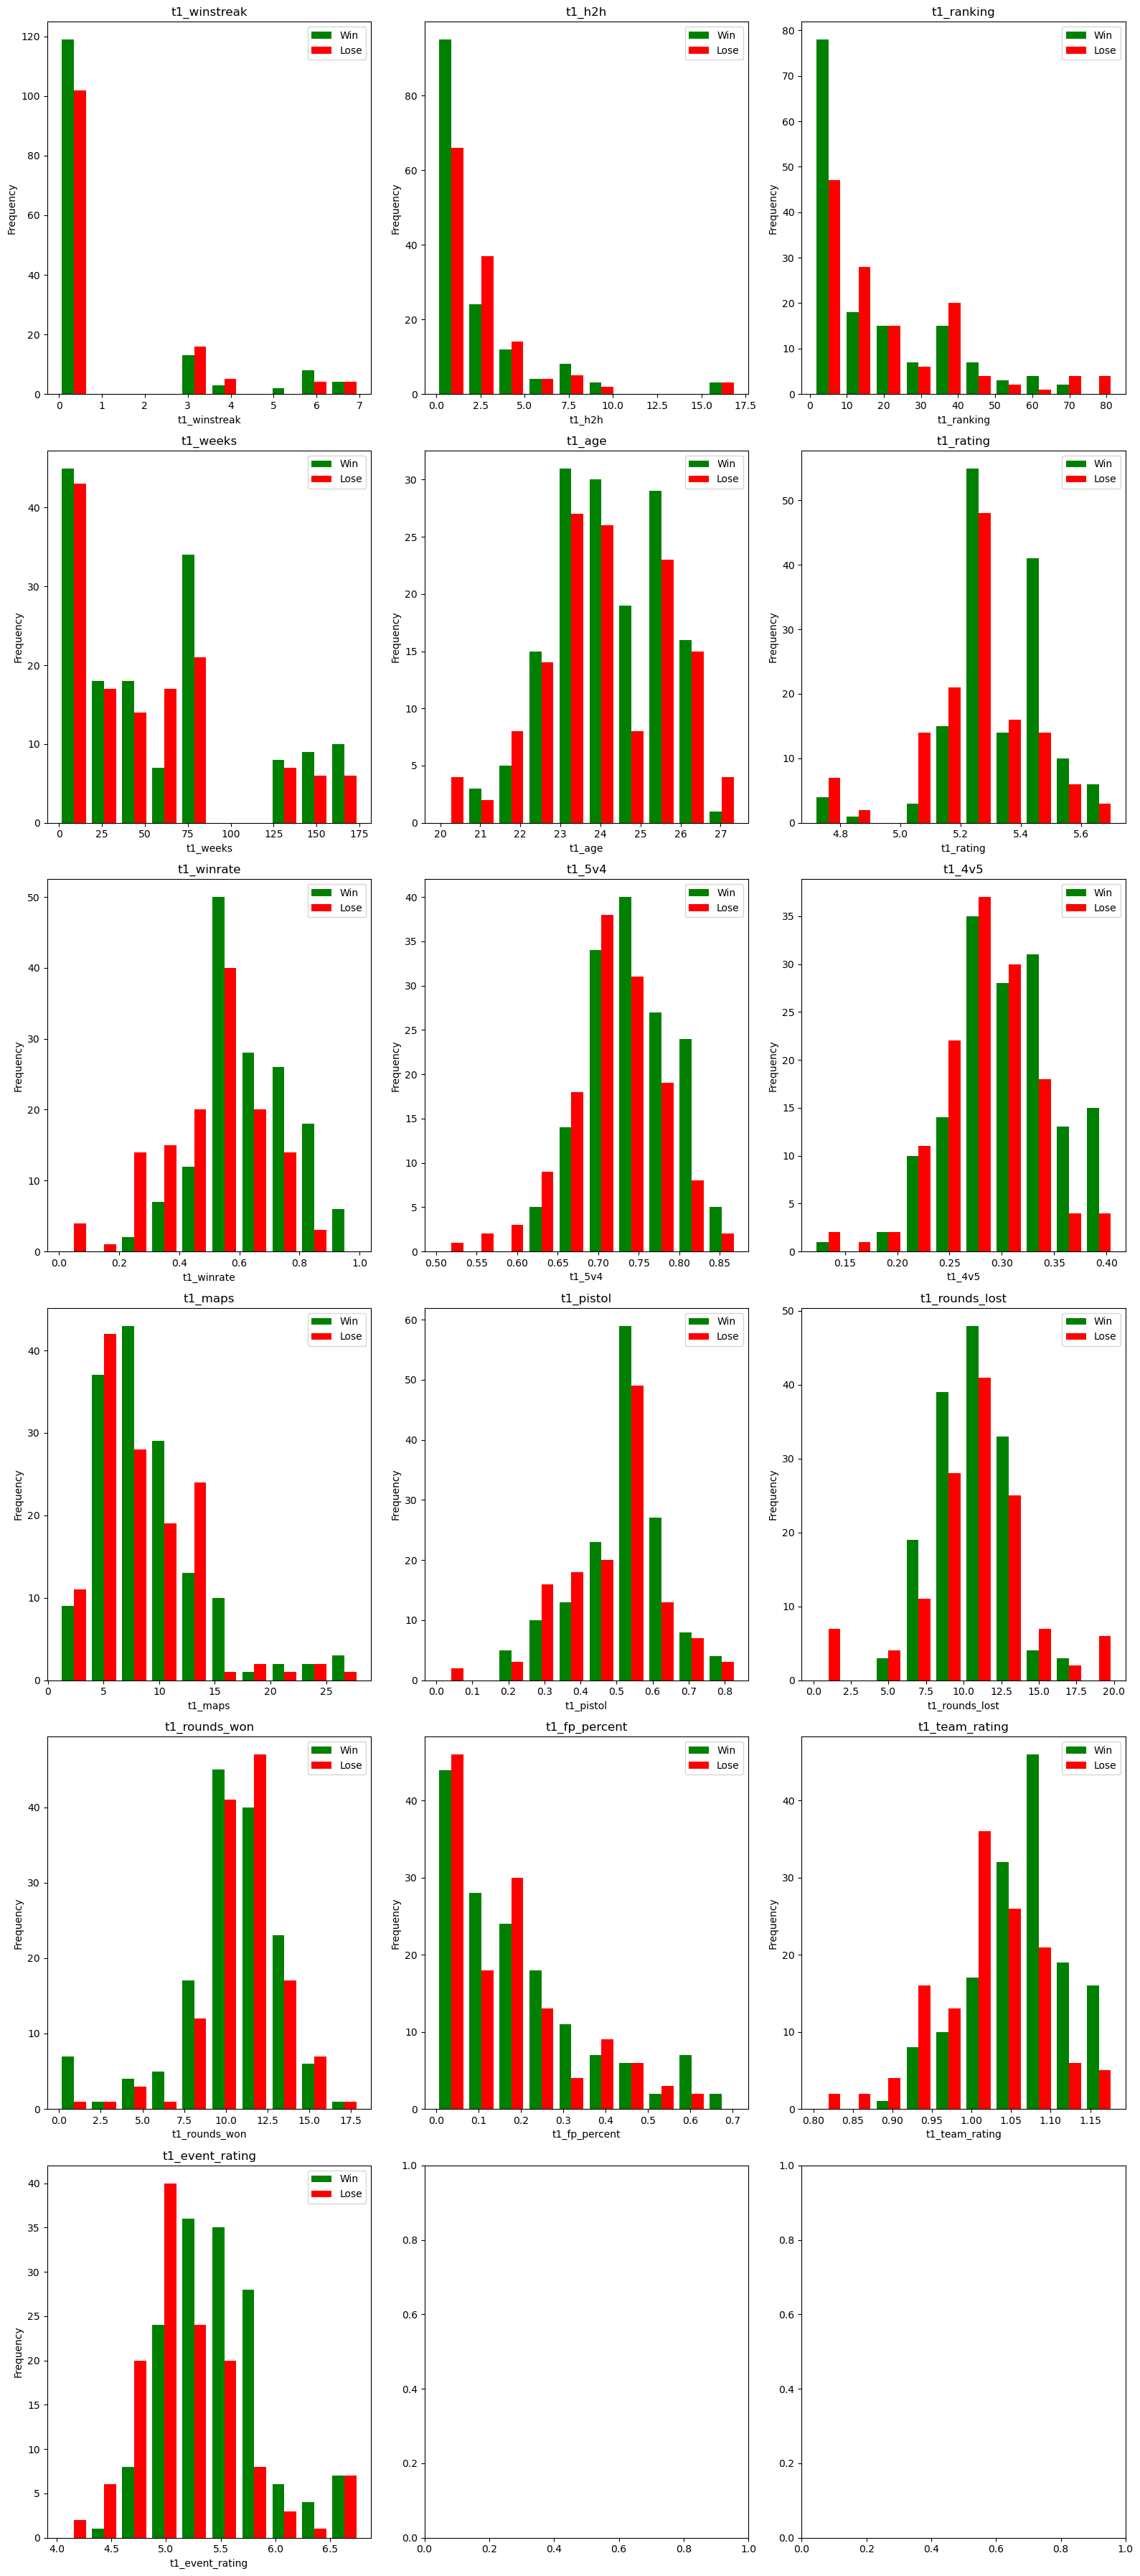

In [8]:
data_columns = [col for col in df.columns if col != 'win' and col != 't1_fp' and col != 't2_fp' and 't1' in col]

# Define the number of rows and columns for subplots
num_cols = 3
num_rows = len(data_columns)//num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6*num_rows))

index = 0
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        if index < len(data_columns):
            axes[row,col].hist(x = [df[df['win']==1][data_columns[index]], df[df['win']==0][data_columns[index]]], 
            stacked=False, color = ['g','r'],label = ['Win','Lose'])
            axes[row,col].set_title(f'{data_columns[index]}')
            axes[row,col].set_xlabel(data_columns[index])
            axes[row,col].set_ylabel('Frequency')
            axes[row,col].legend(['Win', 'Lose'])
            index += 1

plt.tight_layout()
plt.show()

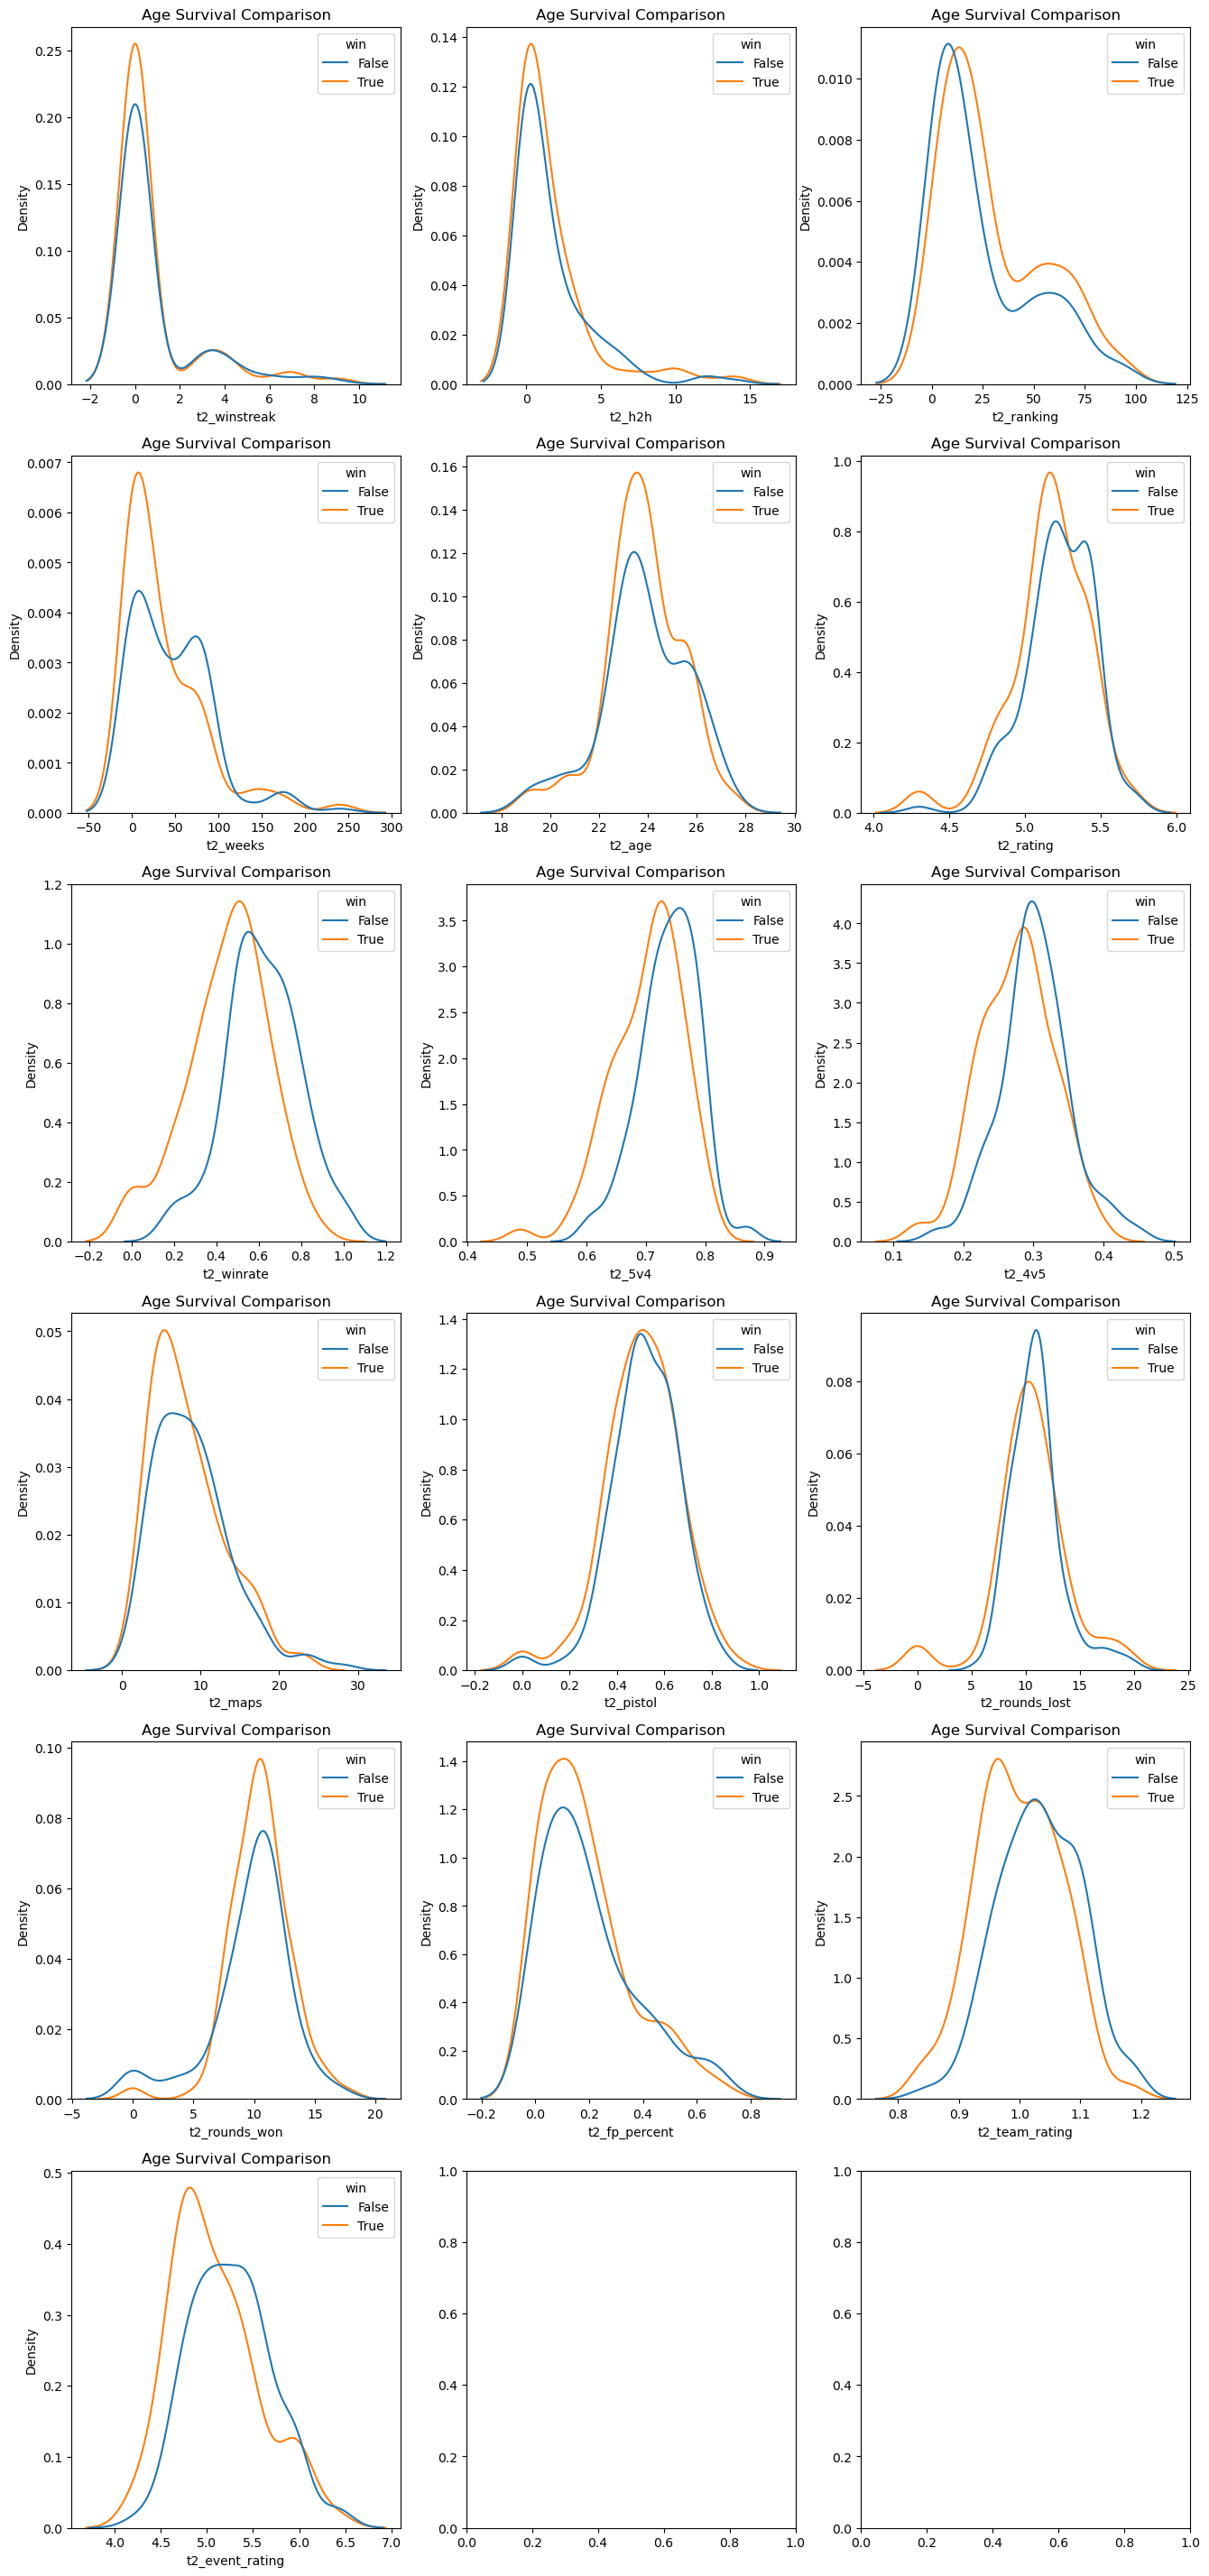

In [9]:
# fig, axes = plt.subplots(2,3,figsize=(14,12))

# sns.kdeplot(x = 'Age', hue='Transported' ,data = train, ax = axes[0,0])
# axes[0,0].set_title('Age Survival Comparison')

data_columns = [col for col in df.columns if col != 'win' and col != 't1_fp' and col != 't2_fp' and 't2' in col]

# Define the number of rows and columns for subplots
num_cols = 3
num_rows = len(data_columns)//num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6*num_rows))

index = 0
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        if index < len(data_columns):
            sns.kdeplot(x = data_columns[index], hue='win', data = df, ax = axes[row,col])
            axes[row,col].set_title('Age Survival Comparison')
            index += 1

In [15]:
data_columns = [col for col in df.columns if col != 'win' and col != 't1_fp' and col != 't2_fp']
data_columns[:22]
da = pd.DataFrame()

for index in range(0,22,2):
    da[data_columns[index][3:]] = df.loc[:,data_columns[index]]-df.loc[:,data_columns[index+1]]
for index in range(22,25):
    da[data_columns[index][3:]] = df.loc[:,data_columns[index]]-df.loc[:,data_columns[index+3]]
for index in range(28,30):
    da[data_columns[index][3:]] = df.loc[:,data_columns[index]]-df.loc[:,data_columns[index+2]]
da['win'] = df.loc[:,'win']
    
da.head

<bound method NDFrame.head of      winstreak  h2h  ranking  weeks  age  rating  winrate    5v4    4v5  maps   
0          0.0  0.0      5.0  -77.0 -1.5   -0.31    0.038 -0.094 -0.017 -11.0  \
1          0.0  0.0      5.0  -77.0 -1.5   -0.31    0.071 -0.075 -0.018  -3.0   
2          0.0 -1.0    -23.0   69.0  1.0    0.25    0.334  0.031  0.050   6.0   
3          0.0 -1.0    -23.0   69.0  1.0    0.25    0.300  0.142  0.116   6.0   
4          0.0  1.0      7.0   19.0 -0.3   -0.35   -0.415 -0.053 -0.068  -8.0   
5          0.0  1.0      7.0   19.0 -0.3   -0.35   -0.167 -0.087 -0.057  -5.0   
6          0.0  0.0     36.0  -83.0 -3.0   -0.28   -0.062 -0.011 -0.020 -10.0   
7          0.0  0.0     36.0  -83.0 -3.0   -0.28    0.429  0.133  0.000  -4.0   
8          0.0  0.0     36.0  -83.0 -3.0   -0.28   -0.250 -0.086 -0.068  -6.0   
9          0.0  0.0     -1.0  -12.0  0.6   -0.18    0.357  0.118  0.013   1.0   
10         0.0  0.0     -1.0  -12.0  0.6   -0.18   -0.171 -0.080  0.081   2.0  

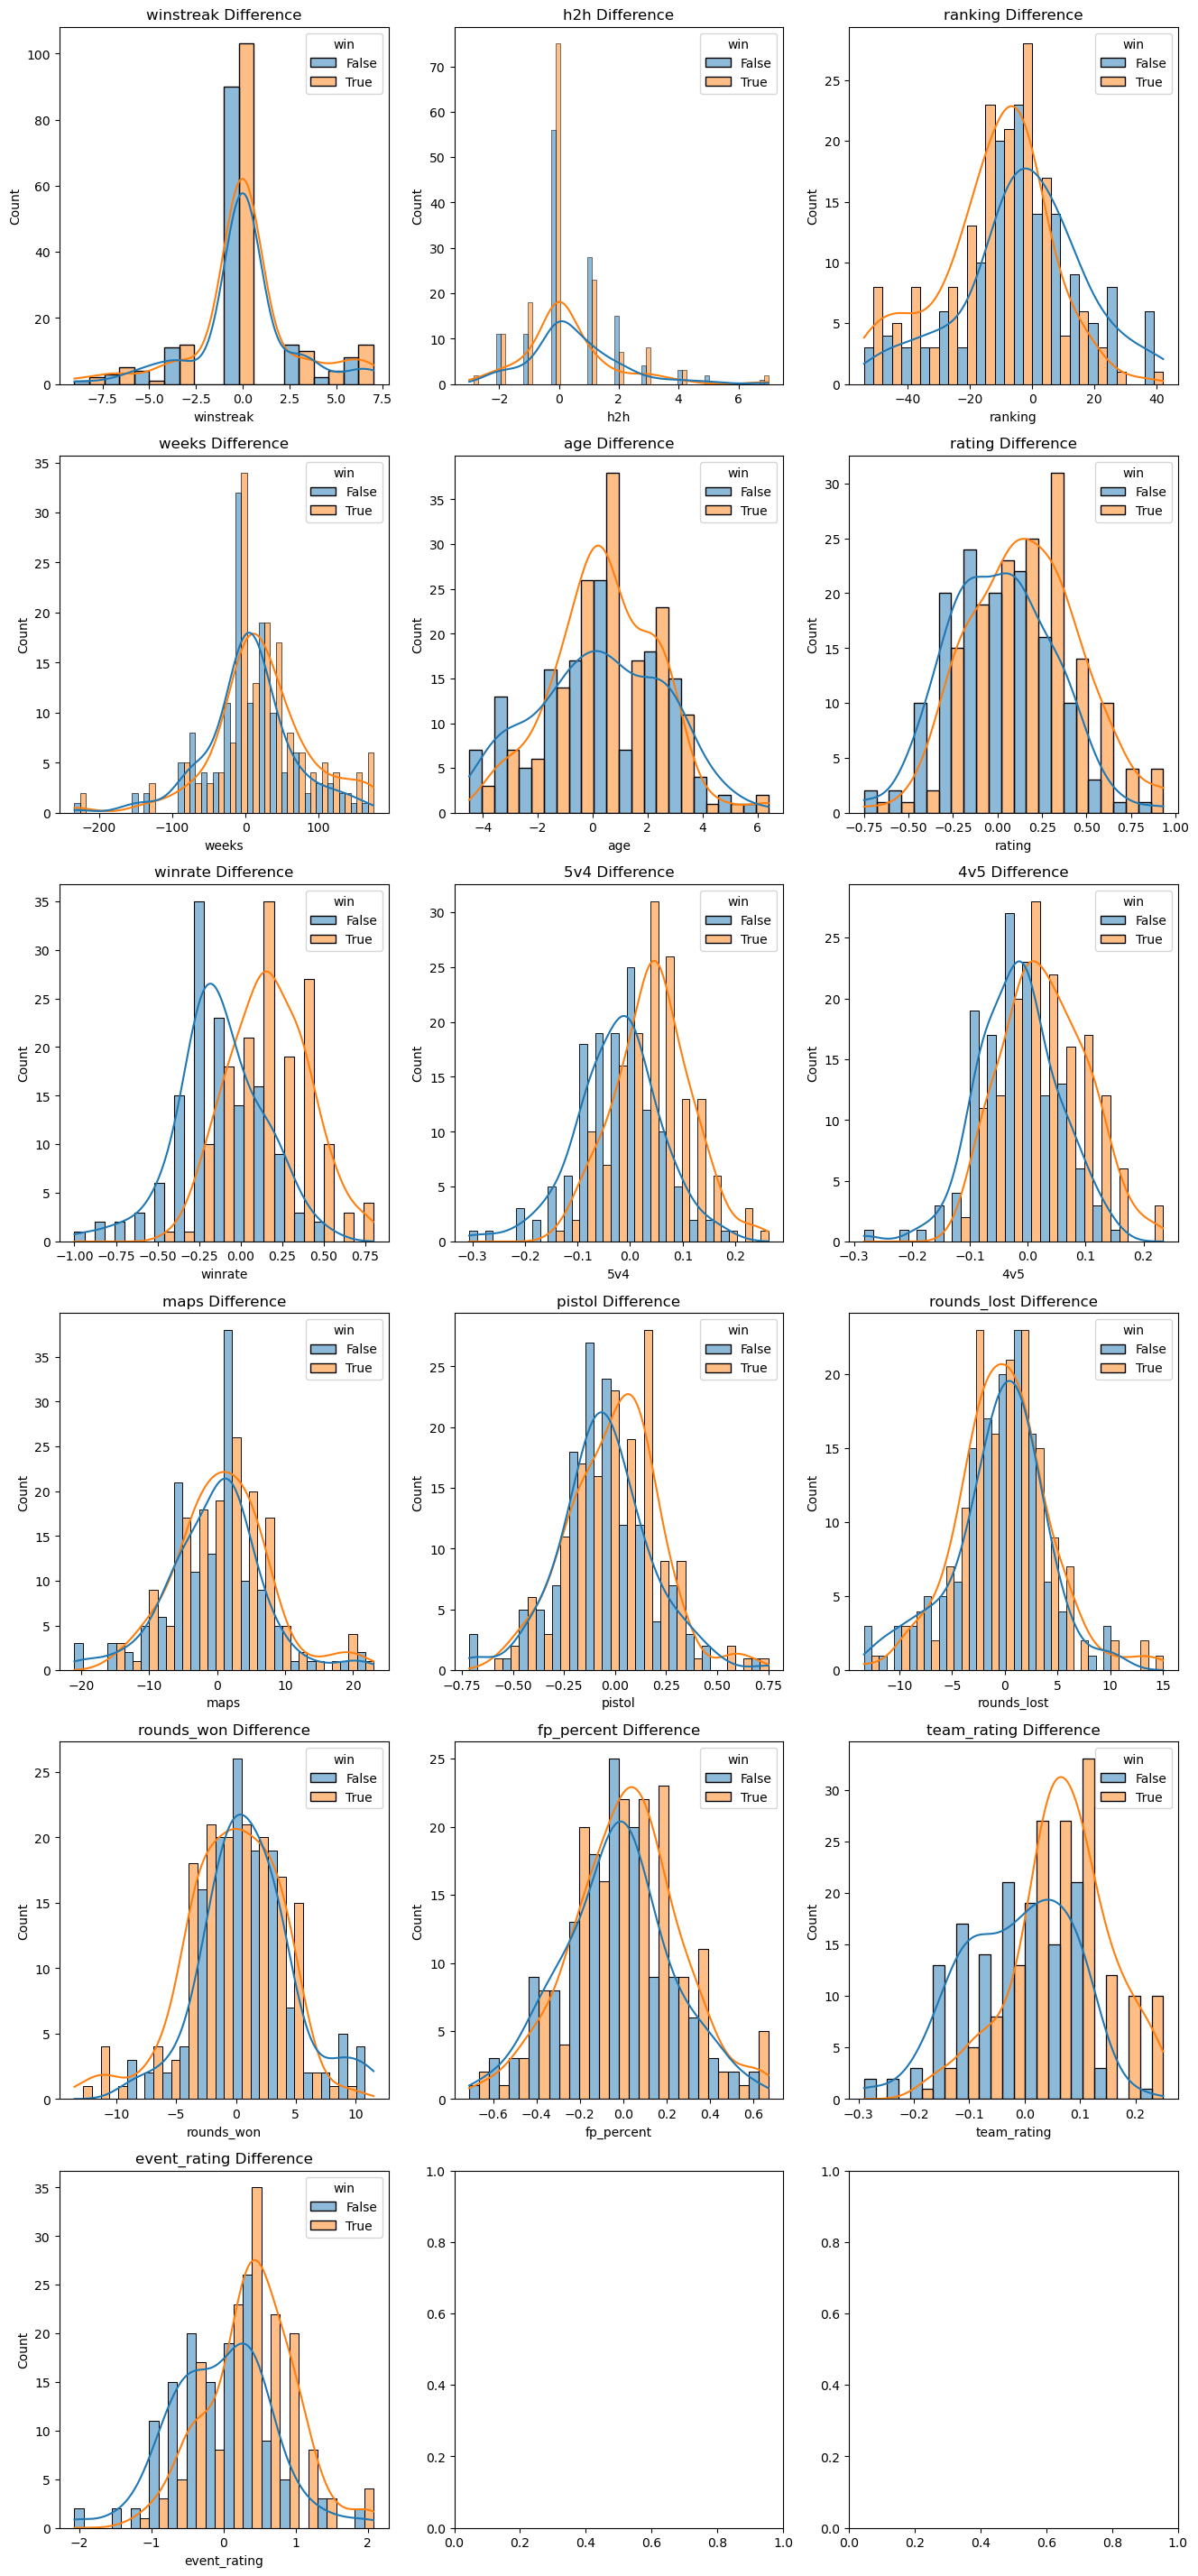

In [11]:
num_cols = 3
num_rows = math.ceil(len(da.columns)/num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6*num_rows))

index = 0
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        if index < len(da.columns)-1:
            sns.histplot(x = da.columns[index], hue='win', data = da, ax = axes[row,col], kde=True, multiple='dodge')
            axes[row,col].set_title(f'{da.columns[index]} Difference')
            index += 1

In [12]:
print('Correlation by first_pick')
print(df[['t1_fp', 'win']].groupby('t1_fp').mean())
print('---------------')

Correlation by first_pick
            win
t1_fp          
False  0.516129
True   0.587302
---------------


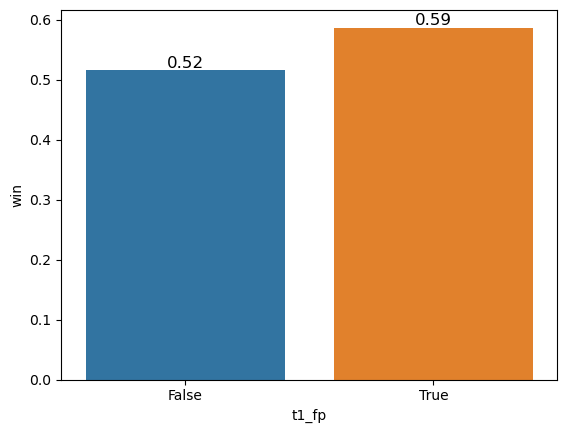

In [13]:
sns.barplot(x='t1_fp', y='win', data=df, errorbar=None)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

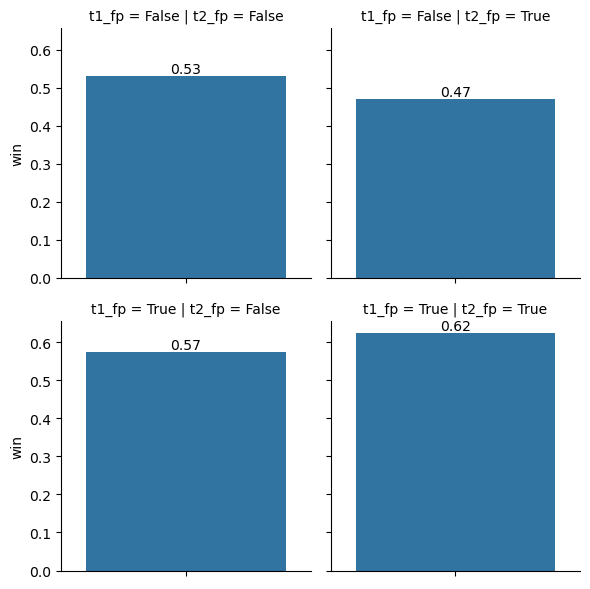

In [14]:
# Define a custom annotation function
def annotate_bars(*args, **kwargs):
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

h = sns.FacetGrid(df, col='t2_fp', row='t1_fp')
h.map_dataframe(sns.barplot, y='win', errorbar=None)

# Apply the custom annotation function to each subplot in the FacetGrid
h.map(annotate_bars)

### Some Feature Engineering

In [8]:
data_columns = [col for col in df.columns if col != 'win' and col != 't1_fp' and col != 't2_fp']

for index in range(0,22,2):
    df.loc[:,data_columns[index][3:]+'_diff'] = df.loc[:,data_columns[index]]-df.loc[:,data_columns[index+1]]
for index in range(22,25):
    df.loc[:,data_columns[index][3:]+'_diff'] = df.loc[:,data_columns[index]]-df.loc[:,data_columns[index+3]]
for index in range(28,30):
    df.loc[:,data_columns[index][3:]+'_diff'] = df.loc[:,data_columns[index]]-df.loc[:,data_columns[index+2]]

df.head()
    

t1_winstreak  t2_winstreak  t1_h2h  t2_h2h  t1_ranking  t2_ranking   
0           0.0           0.0     0.0     0.0         9.0         4.0  \
1           0.0           0.0     0.0     0.0         9.0         4.0   
2           0.0           0.0     0.0     1.0         1.0        24.0   
3           0.0           0.0     0.0     1.0         1.0        24.0   
4           0.0           0.0     2.0     1.0        13.0         6.0   

   t1_weeks  t2_weeks  t1_age  t2_age  t1_rating  t2_rating  t1_winrate   
0       6.0      83.0    24.2    25.7       5.11       5.42       0.600  \
1       6.0      83.0    24.2    25.7       5.11       5.42       0.571   
2      85.0      16.0    24.4    23.4       5.49       5.24       0.667   
3      85.0      16.0    24.4    23.4       5.49       5.24       0.800   
4      54.0      35.0    23.2    23.5       5.06       5.41       0.200   

   t2_winrate  t1_5v4  t2_5v4  t1_4v5  t2_4v5  t1_maps  t2_maps  t1_pistol   
0       0.562   0.662   0.756   0.281   0.298      5.0     16.0      0.500  \
1       0.500   0.689   0.764   0.264   0.282      7.0     10.0      0.714   
2       0.333   0.734   0.703   0.293   0.243      9.0      3.0      0.500   
3       0.500   0.803   0.661   0.336   0.220     10.0      4.0      0.500   
4       0.615   0.727   0.780   0.205   0.273      5.0     13.0      0.700   

   t2_pistol    win  t1_rounds_lost  t1_rounds_won  t1_fp  t1_fp_percent   
0      0.656   True           14.00          10.50  False           0.07  \
1      0.350   True           11.75           7.33   True           0.29   
2      0.333   True           13.00           9.33   True           0.24   
3      0.750   True            9.50           9.00  False           0.12   
4      0.423  False            9.00          10.00  False           0.16   

   t2_rounds_lost  t2_rounds_won  t2_fp  t2_fp_percent  t1_team_rating   
0            8.50          11.33   True           0.61            1.04  \
1           10.50          11.50  False           0.10            1.04   
2            7.00           9.50  False           0.15            1.16   
3           13.00           8.00  False           0.15            1.16   
4            8.43          10.20  False           0.28            0.99   

   t1_event_rating  t2_team_rating  t2_event_rating  winstreak_diff  h2h_diff   
0             5.20            1.03             5.16             0.0       0.0  \
1             5.20            1.03             5.16             0.0       0.0   
2             5.82            0.97             4.85             0.0      -1.0   
3             5.82            0.97             4.85             0.0      -1.0   
4             4.96            1.12             5.61             0.0       1.0   

   ranking_diff  weeks_diff  age_diff  rating_diff  winrate_diff  5v4_diff   
0           5.0       -77.0      -1.5        -0.31         0.038    -0.094  \
1           5.0       -77.0      -1.5        -0.31         0.071    -0.075   
2         -23.0        69.0       1.0         0.25         0.334     0.031   
3         -23.0        69.0       1.0         0.25         0.300     0.142   
4           7.0        19.0      -0.3        -0.35        -0.415    -0.053   

   4v5_diff  maps_diff  pistol_diff  rounds_lost_diff  rounds_won_diff   
0    -0.017      -11.0       -0.156              5.50            -0.83  \
1    -0.018       -3.0        0.364              1.25            -4.17   
2     0.050        6.0        0.167              6.00            -0.17   
3     0.116        6.0       -0.250             -3.50             1.00   
4    -0.068       -8.0        0.277              0.57            -0.20   

   fp_percent_diff  team_rating_diff  event_rating_diff  
0            -0.54              0.01               0.04  
1             0.19              0.01               0.04  
2             0.09              0.19               0.97  
3            -0.03              0.19               0.97  
4            -0.12             -0.13              -

In [9]:
#Scaling

pipeline = Pipeline([
    ('robust_scaler', StandardScaler()),
    ('min_max_scaler', MinMaxScaler())
])

cols_to_scale = [col for col in df.columns if col != 't1_fp' and col != 't2_fp' and col != 'win']

pipeline.fit(df.loc[:, cols_to_scale])
df.loc[:, cols_to_scale] = pipeline.transform(df.loc[:, cols_to_scale])

with open('cs_pipeline.pkl','wb') as f:
    dump(pipeline, f)

df


t1_winstreak  t2_winstreak    t1_h2h    t2_h2h  t1_ranking  t2_ranking   
0        0.000000      0.000000  0.000000  0.000000    0.098765    0.033333  \
1        0.000000      0.000000  0.000000  0.000000    0.098765    0.033333   
2        0.000000      0.000000  0.000000  0.071429    0.000000    0.255556   
3        0.000000      0.000000  0.000000  0.071429    0.000000    0.255556   
4        0.000000      0.000000  0.117647  0.071429    0.148148    0.055556   
5        0.000000      0.000000  0.117647  0.071429    0.148148    0.055556   
6        0.000000      0.000000  0.000000  0.000000    0.481481    0.033333   
7        0.000000      0.000000  0.000000  0.000000    0.481481    0.033333   
8        0.000000      0.000000  0.000000  0.000000    0.481481    0.033333   
9        0.000000      0.000000  0.000000  0.000000    0.271605    0.255556   
10       0.000000      0.000000  0.000000  0.000000    0.271605    0.255556   
11       0.000000      0.000000  0.000000  0.000000    0.271605    0.255556   
12       0.000000      0.000000  0.058824  0.142857    0.061728    0.211111   
13       0.000000      0.000000  0.058824  0.142857    0.061728    0.211111   
14       0.000000      0.000000  0.294118  0.428571    0.148148    0.044444   
15       0.000000      0.000000  0.294118  0.428571    0.148148    0.044444   
16       0.666667      0.000000  0.117647  0.000000    0.012346    0.088889   
17       0.666667      0.000000  0.117647  0.000000    0.012346    0.088889   
18       0.666667      0.000000  0.117647  0.000000    0.012346    0.088889   
19       0.444444      0.000000  0.352941  0.071429    0.000000    0.111111   
20       0.444444      0.000000  0.352941  0.071429    0.000000    0.111111   
21       0.000000      0.000000  0.470588  0.714286    0.049383    0.033333   
22       0.000000      0.000000  0.470588  0.714286    0.049383    0.033333   
23       0.000000      0.000000  0.000000  0.000000    0.098765    0.255556   
24       0.000000      0.000000  0.000000  0.000000    0.098765    0.255556   
25       0.000000      0.000000  0.117647  0.071429    0.234568    0.111111   
26       0.000000      0.000000  0.117647  0.071429    0.234568    0.111111   
27       0.000000      0.000000  0.117647  0.071429    0.234568    0.111111   
28       0.000000      0.000000  0.000000  0.000000    0.271605    0.033333   
29       0.000000      0.000000  0.000000  0.000000    0.271605    0.033333   
30       0.000000      0.000000  0.294118  0.214286    0.049383    0.133333   
31       0.000000      0.000000  0.294118  0.214286    0.049383    0.133333   
32       0.000000      0.000000  0.294118  0.214286    0.049383    0.133333   
33       0.000000      0.000000  0.000000  0.000000    0.283951    0.055556   
34       0.000000      0.000000  0.000000  0.000000    0.283951    0.055556   
35       0.000000      0.000000  0.000000  0.000000    0.283951    0.055556   
36       0.555556      0.000000  0.000000  0.000000    0.012346    0.088889   
37       0.555556      0.000000  0.000000  0.000000    0.012346    0.088889   
38       0.000000      0.000000  0.000000  0.000000    0.481481    0.111111   
39       0.000000      0.000000  0.000000  0.000000    0.481481    0.111111   
40       0.333333      0.000000  0.058824  0.000000    0.000000    0.211111   
41       0.333333      0.000000  0.058824  0.000000    0.000000    0.211111   
42       0.000000      0.000000  0.235294  0.214286    0.037037    0.133333   
43       0.000000      0.000000  0.235294  0.214286    0.037037    0.133333   
44       0.000000      0.000000  0.235294  0.214286    0.037037    0.133333   
45       0.000000      0.000000  0.000000  0.000000    0.049383    0.244444   
46       0.000000      0.000000  0.000000  0.000000    0.049383    0.244444   
47       0.000000      0.000000  0.000000  0.000000    0.098765    0.055556   
48       0.000000      0.000000  0.000000  0.000000    0.098765    0.055556   
49       0.000000      0.000000  0.000000  0.000000    

In [10]:
df['win'] = df['win'].astype(bool)
df['t1_fp'] = df['t1_fp'].astype(bool)
df['t2_fp'] = df['t2_fp'].astype(bool)

In [11]:
df

t1_winstreak  t2_winstreak    t1_h2h    t2_h2h  t1_ranking  t2_ranking   
0        0.000000      0.000000  0.000000  0.000000    0.098765    0.033333  \
1        0.000000      0.000000  0.000000  0.000000    0.098765    0.033333   
2        0.000000      0.000000  0.000000  0.071429    0.000000    0.255556   
3        0.000000      0.000000  0.000000  0.071429    0.000000    0.255556   
4        0.000000      0.000000  0.117647  0.071429    0.148148    0.055556   
5        0.000000      0.000000  0.117647  0.071429    0.148148    0.055556   
6        0.000000      0.000000  0.000000  0.000000    0.481481    0.033333   
7        0.000000      0.000000  0.000000  0.000000    0.481481    0.033333   
8        0.000000      0.000000  0.000000  0.000000    0.481481    0.033333   
9        0.000000      0.000000  0.000000  0.000000    0.271605    0.255556   
10       0.000000      0.000000  0.000000  0.000000    0.271605    0.255556   
11       0.000000      0.000000  0.000000  0.000000    0.271605    0.255556   
12       0.000000      0.000000  0.058824  0.142857    0.061728    0.211111   
13       0.000000      0.000000  0.058824  0.142857    0.061728    0.211111   
14       0.000000      0.000000  0.294118  0.428571    0.148148    0.044444   
15       0.000000      0.000000  0.294118  0.428571    0.148148    0.044444   
16       0.666667      0.000000  0.117647  0.000000    0.012346    0.088889   
17       0.666667      0.000000  0.117647  0.000000    0.012346    0.088889   
18       0.666667      0.000000  0.117647  0.000000    0.012346    0.088889   
19       0.444444      0.000000  0.352941  0.071429    0.000000    0.111111   
20       0.444444      0.000000  0.352941  0.071429    0.000000    0.111111   
21       0.000000      0.000000  0.470588  0.714286    0.049383    0.033333   
22       0.000000      0.000000  0.470588  0.714286    0.049383    0.033333   
23       0.000000      0.000000  0.000000  0.000000    0.098765    0.255556   
24       0.000000      0.000000  0.000000  0.000000    0.098765    0.255556   
25       0.000000      0.000000  0.117647  0.071429    0.234568    0.111111   
26       0.000000      0.000000  0.117647  0.071429    0.234568    0.111111   
27       0.000000      0.000000  0.117647  0.071429    0.234568    0.111111   
28       0.000000      0.000000  0.000000  0.000000    0.271605    0.033333   
29       0.000000      0.000000  0.000000  0.000000    0.271605    0.033333   
30       0.000000      0.000000  0.294118  0.214286    0.049383    0.133333   
31       0.000000      0.000000  0.294118  0.214286    0.049383    0.133333   
32       0.000000      0.000000  0.294118  0.214286    0.049383    0.133333   
33       0.000000      0.000000  0.000000  0.000000    0.283951    0.055556   
34       0.000000      0.000000  0.000000  0.000000    0.283951    0.055556   
35       0.000000      0.000000  0.000000  0.000000    0.283951    0.055556   
36       0.555556      0.000000  0.000000  0.000000    0.012346    0.088889   
37       0.555556      0.000000  0.000000  0.000000    0.012346    0.088889   
38       0.000000      0.000000  0.000000  0.000000    0.481481    0.111111   
39       0.000000      0.000000  0.000000  0.000000    0.481481    0.111111   
40       0.333333      0.000000  0.058824  0.000000    0.000000    0.211111   
41       0.333333      0.000000  0.058824  0.000000    0.000000    0.211111   
42       0.000000      0.000000  0.235294  0.214286    0.037037    0.133333   
43       0.000000      0.000000  0.235294  0.214286    0.037037    0.133333   
44       0.000000      0.000000  0.235294  0.214286    0.037037    0.133333   
45       0.000000      0.000000  0.000000  0.000000    0.049383    0.244444   
46       0.000000      0.000000  0.000000  0.000000    0.049383    0.244444   
47       0.000000      0.000000  0.000000  0.000000    0.098765    0.055556   
48       0.000000      0.000000  0.000000  0.000000    0.098765    0.055556   
49       0.000000      0.000000  0.000000  0.000000    

### ML

In [9]:
Y_train = df.loc[:,'win']
X_train = df.drop('win', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, random_state=0, train_size=0.85, shuffle=True, stratify=Y_train)

In [20]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import catboost as cb
import lightgbm as lgb

#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
#    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.LogisticRegression(),
#    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Naive Bayes
#    naive_bayes.BernoulliNB(),
#    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
#    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
#    tree.DecisionTreeClassifier(), #RandomForest is better
#    tree.ExtraTreeClassifier(), #ExtraTrees ensemble is better
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier(),
    
    lgb.LGBMClassifier()
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = Y_train.copy()


#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, x_train, y_train.values.ravel(), cv = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #record predictions on the training set to see correlations betweeb model for ensembling
    alg.fit(x_train, y_train.values.ravel())
    MLA_predict[MLA_name] = alg.predict(x_train)
    
    row_index+=1

cb_data = cb.Pool(data=X_train,label=[float(item) for item in Y_train.values])
params = {'eval_metric':'Accuracy',
          'loss_function':'CrossEntropy',
          'verbose':False}
scores = cb.cv(cb_data, fold_count=10, seed=0, shuffle=True, params=params, verbose=False)

MLA_compare.loc[row_index, 'MLA Name'] = 'CatBoost'
MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = scores[['train-Accuracy-mean']].mean()['train-Accuracy-mean']
MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = scores[['test-Accuracy-mean']].mean()['test-Accuracy-mean']
MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = scores[['test-Accuracy-std']].mean()['test-Accuracy-std']

#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Training on fold [0/10]

bestTest = 0.9285714286
bestIteration = 1

Training on fold [1/10]

bestTest = 0.6785714286
bestIteration = 1

Training on fold [2/10]

bestTest = 0.8214285714
bestIteration = 1

Training on fold [3/10]

bestTest = 0.75
bestIteration = 35

Training on fold [4/10]

bestTest = 0.7857142857
bestIteration = 10

Training on fold [5/10]

bestTest = 0.7857142857
bestIteration = 4

Training on fold [6/10]

bestTest = 0.7142857143
bestIteration = 3

Training on fold [7/10]

bestTest = 0.8214285714
bestIteration = 119

Training on fold [8/10]

bestTest = 0.8214285714
bestIteration = 0

Training on fold [9/10]

bestTest = 0.75
bestIteration = 1



MLA Name MLA Train Accuracy Mean   
4            LogisticRegressionCV                0.792411  \
11                      LinearSVC                0.812946   
5              LogisticRegression                0.799107   
6               RidgeClassifierCV                0.785714   
3       GaussianProcessClassifier                0.869643   
2          RandomForestClassifier                     1.0   
16                       CatBoost                0.990138   
12     LinearDiscriminantAnalysis                0.808482   
10                            SVC                0.854018   
15                 LGBMClassifier                     1.0   
14                  XGBClassifier                     1.0   
7                   SGDClassifier                0.748214   
0               BaggingClassifier                0.980804   
1            ExtraTreesClassifier                     1.0   
8                      Perceptron                0.745982   
9            KNeighborsClassifier                0.752232   
13  QuadraticDiscriminantAnalysis                0.730804   

   MLA Test Accuracy Mean MLA Test Accuracy 3*STD  
4                0.732143                0.063387  
11               0.732143                0.112372  
5                0.730357                0.087864  
6                0.728571                0.106606  
3                0.716071                0.146614  
2                0.710714                0.124027  
16               0.709168                0.069918  
12               0.707143                0.124949  
10               0.705357                0.122748  
15               0.696429                0.151523  
14               0.694643                0.159729  
7                0.676786                0.170168  
0                0.667857                0.179604  
1                0.667857                0.072668  
8                0.657143                0.151144  
9                0.642857                0.079459  
13               0.589286                0.165985

### Fine Tuning (with Optuna)

#### Utility function for testing model accuracy

In [26]:
# For sklearn models
def kfold_check(model, x, y):

    cv = KFold(n_splits=5, shuffle=True)
    acc = 0
    
    for train_index, test_index in cv.split(x,y):
        # Split the data into training and testing sets for this fold
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train a model on the training data
        model.fit(x_train, y_train)

        # Make predictions on the testing data
        y_pred = model.predict(x_test)

        # Calculate and print the mean squared error for this fold
        acc += accuracy_score(y_test, y_pred)
    
    print("Mean Accuracy:", acc/5)

#### LogisticRegression

In [47]:
def log_objective(trial, X, y):
    param_grid = {
        'C':trial.suggest_float('C', 0.01, 80.0),
        'penalty':trial.suggest_categorical('penalty',['l1', 'l2']),
        'max_iter':trial.suggest_int('max_iter', 100, 3000, step=50),
        'solver':trial.suggest_categorical('solver', ['liblinear'])
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = linear_model.LogisticRegression(**param_grid, random_state=0)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="LogReg Classifier")
func = lambda trial: log_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=200)

print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
log_model = linear_model.LogisticRegression(random_state=0)
log_model.set_params(**study.best_params)
print('Default Model')
kfold_check(linear_model.LogisticRegression(random_state=0), x_train, y_train.values.ravel())
print('Finetuned')
kfold_check(log_model, x_train, y_train.values.ravel())

#[I 2023-07-15 18:25:52,523] Trial 64 finished with value: 0.4362286438230519 and parameters: {'C': 51.40888258322043, 'penalty': 'l2', 'max_iter': 1050}. Best is trial 64 with value: 0.4362286438230519.

[I 2023-09-06 02:16:32,748] A new study created in memory with name: LogReg Classifier
[I 2023-09-06 02:16:32,812] Trial 0 finished with value: 0.7226950354609929 and parameters: {'C': 47.862706529415284, 'penalty': 'l2', 'max_iter': 850, 'solver': 'liblinear'}. Best is trial 0 with value: 0.7226950354609929.
[I 2023-09-06 02:16:33,525] Trial 1 finished with value: 0.7312056737588654 and parameters: {'C': 16.43631520958096, 'penalty': 'l1', 'max_iter': 1150, 'solver': 'liblinear'}. Best is trial 1 with value: 0.7312056737588654.
[I 2023-09-06 02:16:33,578] Trial 2 finished with value: 0.7479609929078015 and parameters: {'C': 6.844073283881708, 'penalty': 'l2', 'max_iter': 950, 'solver': 'liblinear'}. Best is trial 2 with value: 0.7479609929078015.
[I 2023-09-06 02:16:33,632] Trial 3 finished with value: 0.7226950354609929 and parameters: {'C': 51.08370864613242, 'penalty': 'l2', 'max_iter': 350, 'solver': 'liblinear'}. Best is trial 2 with value: 0.7479609929078015.
[I 2023-09-06 02:16

	Best value: 0.76064
	Best params:
		C: 5.602408088529782
		penalty: l2
		max_iter: 1800
		solver: liblinear
Default Model
Mean Accuracy: 0.7395390070921987
Finetuned
Mean Accuracy: 0.7606382978723405


#### LinearSVC

In [48]:
def linSVC_objective(trial, X, y):
    param_grid = {
        'C':trial.suggest_float('C', 0.01, 80.0),
        'dual': trial.suggest_categorical('dual',[False]),
        'max_iter': trial.suggest_int('max_iter', 500, 5000, step=100)
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = svm.LinearSVC(**param_grid, random_state=0)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="SVC Classifier")
func = lambda trial: linSVC_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=200)

print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
linSVC_model = svm.LinearSVC(random_state=0)
linSVC_model.set_params(**study.best_params)
print("Default Model")
kfold_check(svm.LinearSVC(random_state=0), x_train, y_train.values.ravel())
print("Finetuned")
kfold_check(linSVC_model, x_train, y_train.values.ravel())

[I 2023-09-06 02:17:16,920] A new study created in memory with name: SVC Classifier
[I 2023-09-06 02:17:16,977] Trial 0 finished with value: 0.7186170212765958 and parameters: {'C': 63.733640524273056, 'dual': False, 'max_iter': 1600}. Best is trial 0 with value: 0.7186170212765958.
[I 2023-09-06 02:17:17,032] Trial 1 finished with value: 0.7186170212765958 and parameters: {'C': 57.57143118444535, 'dual': False, 'max_iter': 800}. Best is trial 0 with value: 0.7186170212765958.
[I 2023-09-06 02:17:17,083] Trial 2 finished with value: 0.7186170212765958 and parameters: {'C': 38.476453362965906, 'dual': False, 'max_iter': 2500}. Best is trial 0 with value: 0.7186170212765958.
[I 2023-09-06 02:17:17,131] Trial 3 finished with value: 0.7186170212765958 and parameters: {'C': 62.92403735828876, 'dual': False, 'max_iter': 600}. Best is trial 0 with value: 0.7186170212765958.
[I 2023-09-06 02:17:17,176] Trial 4 finished with value: 0.7186170212765958 and parameters: {'C': 12.36252035250603, 'du

	Best value: 0.75638
	Best params:
		C: 0.4302453758150284
		dual: False
		max_iter: 900
Default Model
Mean Accuracy: 0.7395390070921986
Finetuned
Mean Accuracy: 0.7563829787234042


#### RidgeClassifier

In [49]:
def ridge_objective(trial, X, y):
    param_grid = {
        'alpha':trial.suggest_float('alpha', 0.01, 50.0), 
        'solver': trial.suggest_categorical('solver',['svd','cholesky','lsqr','sparse_cg','saga', 'sag'])
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = linear_model.RidgeClassifier(**param_grid, random_state=0)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="Ridge Classifier")
func = lambda trial: ridge_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=200)

print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
ridge_model = linear_model.RidgeClassifier(random_state=0)
ridge_model.set_params(**study.best_params)
print("Default Model")
kfold_check(linear_model.RidgeClassifier(random_state=0), x_train, y_train.values.ravel())
print("Finetuned")
kfold_check(ridge_model, x_train, y_train.values.ravel())

[I 2023-09-06 02:17:46,113] A new study created in memory with name: Ridge Classifier


[I 2023-09-06 02:17:46,190] Trial 0 finished with value: 0.7141843971631205 and parameters: {'alpha': 48.59910144519417, 'solver': 'cholesky'}. Best is trial 0 with value: 0.7141843971631205.
[I 2023-09-06 02:17:46,282] Trial 1 finished with value: 0.7181737588652483 and parameters: {'alpha': 33.72550677054168, 'solver': 'cholesky'}. Best is trial 1 with value: 0.7181737588652483.
[I 2023-09-06 02:17:46,376] Trial 2 finished with value: 0.7479609929078015 and parameters: {'alpha': 11.44942006879817, 'solver': 'sag'}. Best is trial 2 with value: 0.7479609929078015.
[I 2023-09-06 02:17:46,467] Trial 3 finished with value: 0.7396276595744681 and parameters: {'alpha': 5.568657842567459, 'solver': 'saga'}. Best is trial 2 with value: 0.7479609929078015.
[I 2023-09-06 02:17:46,556] Trial 4 finished with value: 0.7311170212765956 and parameters: {'alpha': 3.8971403191897727, 'solver': 'sparse_cg'}. Best is trial 2 with value: 0.7479609929078015.
[I 2023-09-06 02:17:46,684] Trial 5 finished wi

	Best value: 0.75222
	Best params:
		alpha: 10.418154446342188
		solver: sparse_cg
Default Model
Mean Accuracy: 0.7396276595744681
Finetuned
Mean Accuracy: 0.7522163120567376


#### Gaussian Process Classifier

In [58]:
def gauss_objective(trial, X, y):
    param_grid = {
        'max_iter_predict': trial.suggest_int('max_iter_predict', 100,500),
        'kernel': trial.suggest_categorical('kernel',[ConstantKernel(), DotProduct(), Matern(), RBF(), RationalQuadratic()])
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = gaussian_process.GaussianProcessClassifier(**param_grid, random_state=0, n_jobs=-1)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="Gauss Classifier")
func = lambda trial: gauss_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=200)

print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
gauss_model = gaussian_process.GaussianProcessClassifier(random_state=0)
gauss_model.set_params(**study.best_params)
print("Default Model")
kfold_check(gaussian_process.GaussianProcessClassifier(random_state=0), x_train, y_train.values.ravel())
print("Finetuned")
kfold_check(gauss_model, x_train, y_train.values.ravel())

[I 2023-09-06 02:59:00,333] A new study created in memory with name: Gauss Classifier
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains 1**2 which is of type ConstantKernel.
  warnings.warn(message)
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains DotProduct(sigma_0=1) which is of type DotProduct.
  warnings.warn(message)
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains Matern(length_scale=1, nu=1.5) which is of type Matern.
  warnings.warn(message)
c:\Users\DELL\mambaforge\envs\ds\l

	Best value: 0.73502
	Best params:
		max_iter_predict: 238
		kernel: RBF(length_scale=1)
Default Model
Mean Accuracy: 0.7141843971631207
Finetuned
Mean Accuracy: 0.7350177304964539


#### RandomForest

In [14]:
def rf_objective(trial, X, y):
    param_grid = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),
        "criterion":trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"]),
        "min_samples_leaf":trial.suggest_int("min_samples_leaf", 2, 20),
        "min_samples_split":trial.suggest_int("min_samples_split", 2, 20),
        #"max_features":trial.suggest_categorical("max_features", ['sqrt','log2',None]),
        "max_leaf_nodes":trial.suggest_int("max_leaf_nodes", 20, 350, step=10),
        #"min_impurity_decrease":trial.suggest_float("min_impurity_decrease", 0.0, 0.2, step=0.005),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "max_samples": trial.suggest_float("max_samples", 0.6, 1, step=0.05)
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = ensemble.RandomForestClassifier(**param_grid ,random_state=0, n_jobs=-1)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="RF Classifier")
func = lambda trial: rf_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=100)

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
rf_model = ensemble.RandomForestClassifier(random_state=0)
rf_model.set_params(**study.best_params)
print("Default Model")
kfold_check(ensemble.RandomForestClassifier(random_state=0), x_train, y_train.values.ravel())
print("Finetuned")
kfold_check(rf_model, x_train, y_train.values.ravel())

[I 2023-09-06 23:41:28,943] A new study created in memory with name: RF Classifier


[I 2023-09-06 23:41:34,050] Trial 0 finished with value: 0.7312056737588652 and parameters: {'n_estimators': 550, 'criterion': 'gini', 'min_samples_leaf': 12, 'min_samples_split': 17, 'max_leaf_nodes': 210, 'max_depth': 12, 'max_samples': 0.75}. Best is trial 0 with value: 0.7312056737588652.
[I 2023-09-06 23:41:36,670] Trial 1 finished with value: 0.7184397163120567 and parameters: {'n_estimators': 300, 'criterion': 'log_loss', 'min_samples_leaf': 16, 'min_samples_split': 16, 'max_leaf_nodes': 190, 'max_depth': 6, 'max_samples': 0.7}. Best is trial 0 with value: 0.7312056737588652.
[I 2023-09-06 23:41:42,395] Trial 2 finished with value: 0.72677304964539 and parameters: {'n_estimators': 700, 'criterion': 'log_loss', 'min_samples_leaf': 18, 'min_samples_split': 19, 'max_leaf_nodes': 70, 'max_depth': 4, 'max_samples': 0.65}. Best is trial 0 with value: 0.7312056737588652.
[I 2023-09-06 23:41:46,493] Trial 3 finished with value: 0.7226950354609929 and parameters: {'n_estimators': 500, 'c

	Best value (rmse): 0.74787
	Best params:
		n_estimators: 900
		criterion: gini
		min_samples_leaf: 15
		min_samples_split: 7
		max_leaf_nodes: 200
		max_depth: 5
		max_samples: 1.0
Default Model
Mean Accuracy: 0.6806737588652483
Finetuned
Mean Accuracy: 0.747872340425532


#### LDA

In [37]:
def lda_objective(trial, X, y):
    param_grid = {
        'shrinkage':trial.suggest_float('shrinkage', 0.0, 1.0), 
        'solver': trial.suggest_categorical('solver',['eigen','lsqr'])
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = discriminant_analysis.LinearDiscriminantAnalysis(**param_grid)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="LDA Classifier")
func = lambda trial: lda_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=100)

print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.set_params(**study.best_params)
print("Default Model")
kfold_check(discriminant_analysis.LinearDiscriminantAnalysis(), x_train, y_train.values.ravel())
print("Finetuned")
kfold_check(lda_model, x_train, y_train.values.ravel())

[I 2023-09-07 02:22:27,560] A new study created in memory with name: LDA Classifier
[I 2023-09-07 02:22:27,634] Trial 0 finished with value: 0.7523049645390072 and parameters: {'shrinkage': 0.6045193841648893, 'solver': 'lsqr'}. Best is trial 0 with value: 0.7523049645390072.
[I 2023-09-07 02:22:27,746] Trial 1 finished with value: 0.7437943262411347 and parameters: {'shrinkage': 0.2343033439161003, 'solver': 'eigen'}. Best is trial 0 with value: 0.7523049645390072.
[I 2023-09-07 02:22:27,839] Trial 2 finished with value: 0.7270390070921986 and parameters: {'shrinkage': 0.9817672424581421, 'solver': 'lsqr'}. Best is trial 0 with value: 0.7523049645390072.
[I 2023-09-07 02:22:27,913] Trial 3 finished with value: 0.7395390070921987 and parameters: {'shrinkage': 0.37994842045456356, 'solver': 'lsqr'}. Best is trial 0 with value: 0.7523049645390072.
[I 2023-09-07 02:22:27,966] Trial 4 finished with value: 0.7481382978723404 and parameters: {'shrinkage': 0.5652735240878238, 'solver': 'lsqr'

	Best value: 0.76073
	Best params:
		shrinkage: 0.6191499935098764
		solver: lsqr
Default Model
Mean Accuracy: 0.7268617021276595
Finetuned
Mean Accuracy: 0.7607269503546099


#### CatBoost

In [26]:
def cb_objective(trial, X, y):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "iterations": trial.suggest_categorical("iterations", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 300, step=1),
        "l2_leaf_reg": trial.suggest_int("l2_leaf_reg", 0, 20, step=1),
        "colsample_bylevel": trial.suggest_float(
            "colsample_bylevel", 0.6, 1, step=0.1
        ),
        "subsample": trial.suggest_float("subsample", 0.6, 1, step=0.1),
        "random_strength": trial.suggest_float("random_strength", 0, 1, step=0.1),
        #"grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree"]),
        "bagging_temperature": trial.suggest_float('bagging_temperature', 0, 20, step=0.25)
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = cb.CatBoostClassifier(
                              **param_grid,
                              loss_function='Logloss',
                              random_seed=0,
                              early_stopping_rounds=50,
                              eval_metric='Accuracy'
                              )
 
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            verbose=False,
        )
        preds = [True if item=='True' else False for item in model.predict(X_test)]
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="CB Classifier")
func = lambda trial: cb_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=100)

print(f"\tBest value : {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-09-08 01:52:11,145] A new study created in memory with name: CB Classifier
[I 2023-09-08 01:52:15,690] Trial 0 finished with value: 0.7351063829787233 and parameters: {'iterations': 10000, 'learning_rate': 0.09894759716481633, 'max_depth': 8, 'l2_leaf_reg': 9, 'colsample_bylevel': 0.6, 'subsample': 1.0, 'random_strength': 0.9, 'bagging_temperature': 10.75}. Best is trial 0 with value: 0.7351063829787233.
[I 2023-09-08 01:52:16,796] Trial 1 finished with value: 0.7142730496453901 and parameters: {'iterations': 10000, 'learning_rate': 0.29767695894222246, 'max_depth': 5, 'l2_leaf_reg': 18, 'colsample_bylevel': 0.7, 'subsample': 0.7, 'random_strength': 0.1, 'bagging_temperature': 2.25}. Best is trial 0 with value: 0.7351063829787233.
[I 2023-09-08 01:52:17,882] Trial 2 finished with value: 0.760549645390071 and parameters: {'iterations': 10000, 'learning_rate': 0.09627020241063297, 'max_depth': 3, 'l2_leaf_reg': 6, 'colsample_bylevel': 0.7, 'subsample': 0.9, 'random_strength': 0.3

	Best value : 0.77722
	Best params:
		iterations: 10000
		learning_rate: 0.2927395014586791
		max_depth: 4
		l2_leaf_reg: 8
		colsample_bylevel: 0.8
		subsample: 0.9
		random_strength: 0.30000000000000004
		bagging_temperature: 3.75


In [27]:
#### Check accuracies of default and finetuned models
def_model =  cb.CatBoostClassifier(random_seed=0)
cb_model = cb.CatBoostClassifier(
                              loss_function='Logloss',
                              random_seed=0,
                              early_stopping_rounds=50
                              )
 
cb_model.set_params(**study.best_params)

cv = KFold(n_splits=5, shuffle=True)
acc = 0
def_acc = 0

for train_index, test_index in cv.split(x_train,y_train.values.ravel()):
    # Split the data into training and testing sets for this fold
    train_x, test_x = x_train.iloc[train_index], x_train.iloc[test_index]
    train_y, test_y = y_train.values.ravel()[train_index], y_train.values.ravel()[test_index]

    # Train a model on the training data
    cb_model.fit(
        train_x,
        train_y,
        eval_set=[(test_x, test_y)],
    )
    def_model.fit(train_x, train_y)

    y_pred = [True if item=='True' else False for item in cb_model.predict(test_x)]
    def_pred = [True if item=='True' else False for item in def_model.predict(test_x)]

    # Calculate and print the mean squared error for this fold
    acc += accuracy_score(test_y, y_pred)
    def_acc += accuracy_score(test_y, def_pred)
    
print("Finetuned Mean Accuracy:", acc/5)
print("Default Mean Accuracy:", def_acc/5)

0:	learn: 0.5885011	test: 0.6163480	best: 0.6163480 (0)	total: 3.15ms	remaining: 31.5s
1:	learn: 0.5141751	test: 0.6214373	best: 0.6163480 (0)	total: 5.49ms	remaining: 27.5s
2:	learn: 0.4611265	test: 0.5941003	best: 0.5941003 (2)	total: 8.41ms	remaining: 28s
3:	learn: 0.4162314	test: 0.6195089	best: 0.5941003 (2)	total: 11ms	remaining: 27.4s
4:	learn: 0.3728879	test: 0.6109716	best: 0.5941003 (2)	total: 14.2ms	remaining: 28.5s
5:	learn: 0.3493786	test: 0.6164731	best: 0.5941003 (2)	total: 16.4ms	remaining: 27.3s
6:	learn: 0.3213359	test: 0.6144561	best: 0.5941003 (2)	total: 39.5ms	remaining: 56.4s
7:	learn: 0.2985288	test: 0.6335624	best: 0.5941003 (2)	total: 43.1ms	remaining: 53.8s
8:	learn: 0.2871912	test: 0.6286528	best: 0.5941003 (2)	total: 48.6ms	remaining: 54s
9:	learn: 0.2760655	test: 0.6247491	best: 0.5941003 (2)	total: 52.3ms	remaining: 52.2s
10:	learn: 0.2691196	test: 0.6243796	best: 0.5941003 (2)	total: 56.4ms	remaining: 51.2s
11:	learn: 0.2572035	test: 0.6340754	best: 0.594

#### XGBoost

In [28]:
def xgb_objective(trial, X, y):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "eta": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_weight": trial.suggest_int("min_child_weight", 0, 10, step=1),
        "reg_lambda": trial.suggest_int("reg_lambda", 0, 20, step=2),
        "reg_alpha": trial.suggest_int("reg_alpha", 0, 20, step=2),
        "gamma": trial.suggest_int("gamma", 0, 10, step=1),
        "colsample_bytree": trial.suggest_float(
            "colsample_bytree", 0.6, 1, step=0.1
        ),
        "subsample": trial.suggest_float("subsample", 0.6, 1, step=0.1),
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = XGBClassifier(objective='binary:logistic', **param_grid, seed=0, early_stopping_rounds=50, eval_metric="logloss", verbosity=0, n_jobs=4)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            verbose=False,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="XGB Classifier")
func = lambda trial: xgb_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=150)

print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-09-08 02:23:25,483] A new study created in memory with name: XGB Classifier
[I 2023-09-08 02:23:26,319] Trial 0 finished with value: 0.7643617021276595 and parameters: {'n_estimators': 10000, 'learning_rate': 0.23105491301253195, 'max_depth': 10, 'min_child_weight': 1, 'reg_lambda': 2, 'reg_alpha': 2, 'gamma': 8, 'colsample_bytree': 0.7, 'subsample': 0.7}. Best is trial 0 with value: 0.7643617021276595.
[I 2023-09-08 02:23:26,886] Trial 1 finished with value: 0.5046099290780142 and parameters: {'n_estimators': 10000, 'learning_rate': 0.2746240965125892, 'max_depth': 5, 'min_child_weight': 1, 'reg_lambda': 18, 'reg_alpha': 10, 'gamma': 10, 'colsample_bytree': 0.9, 'subsample': 0.7}. Best is trial 0 with value: 0.7643617021276595.
[I 2023-09-08 02:23:27,316] Trial 2 finished with value: 0.5841312056737589 and parameters: {'n_estimators': 10000, 'learning_rate': 0.20943335401140342, 'max_depth': 11, 'min_child_weight': 3, 'reg_lambda': 0, 'reg_alpha': 18, 'gamma': 3, 'colsample_by

	Best value: 0.78138
	Best params:
		n_estimators: 10000
		learning_rate: 0.2879652452787352
		max_depth: 12
		min_child_weight: 3
		reg_lambda: 0
		reg_alpha: 0
		gamma: 7
		colsample_bytree: 0.7
		subsample: 0.7


In [30]:
xgb_model = XGBClassifier(objective='binary:logistic', seed=0, early_stopping_rounds=50, eval_metric="logloss", verbosity=0)
xgb_model.set_params(**study.best_params)
def_model = XGBClassifier(objective='binary:logistic', seed=0)

cv = KFold(n_splits=5, shuffle=True)
acc = 0
def_acc = 0

for train_index, test_index in cv.split(x_train,y_train.values.ravel()):
    # Split the data into training and testing sets for this fold
    X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
    Y_train, Y_test = y_train.values.ravel()[train_index], y_train.values.ravel()[test_index]

    # Train a model on the training data
    xgb_model.fit(
        X_train,
        Y_train,
        eval_set=[(X_test, Y_test)],
    )
    def_model.fit(
        X_train,
        Y_train
    )

    # Make predictions on the testing data
    y_pred = xgb_model.predict(X_test)
    def_pred = def_model.predict(X_test)

    # Calculate and print the mean squared error for this fold
    acc += accuracy_score(Y_test, y_pred)
    def_acc += accuracy_score(Y_test, def_pred)
    
print("Finetuned Mean Accuracy:", acc/5)
print("Default Mean Accuracy:", def_acc/5)

[0]	validation_0-logloss:0.62251
[1]	validation_0-logloss:0.59140
[2]	validation_0-logloss:0.55195
[3]	validation_0-logloss:0.57869
[4]	validation_0-logloss:0.56617
[5]	validation_0-logloss:0.58488
[6]	validation_0-logloss:0.58608
[7]	validation_0-logloss:0.57106
[8]	validation_0-logloss:0.55997
[9]	validation_0-logloss:0.56091
[10]	validation_0-logloss:0.54372
[11]	validation_0-logloss:0.54381
[12]	validation_0-logloss:0.53955
[13]	validation_0-logloss:0.53951
[14]	validation_0-logloss:0.54090
[15]	validation_0-logloss:0.53998
[16]	validation_0-logloss:0.53969
[17]	validation_0-logloss:0.54010
[18]	validation_0-logloss:0.53936


[19]	validation_0-logloss:0.53976
[20]	validation_0-logloss:0.54000
[21]	validation_0-logloss:0.54089
[22]	validation_0-logloss:0.54002
[23]	validation_0-logloss:0.54018
[24]	validation_0-logloss:0.54261
[25]	validation_0-logloss:0.54339
[26]	validation_0-logloss:0.54212
[27]	validation_0-logloss:0.54222
[28]	validation_0-logloss:0.54145
[29]	validation_0-logloss:0.53938
[30]	validation_0-logloss:0.54027
[31]	validation_0-logloss:0.53973
[32]	validation_0-logloss:0.53974
[33]	validation_0-logloss:0.53890
[34]	validation_0-logloss:0.53904
[35]	validation_0-logloss:0.53861
[36]	validation_0-logloss:0.53844
[37]	validation_0-logloss:0.53833
[38]	validation_0-logloss:0.53840
[39]	validation_0-logloss:0.53909
[40]	validation_0-logloss:0.53867
[41]	validation_0-logloss:0.53964
[42]	validation_0-logloss:0.53971
[43]	validation_0-logloss:0.53846
[44]	validation_0-logloss:0.53899
[45]	validation_0-logloss:0.53066
[46]	validation_0-logloss:0.53048
[47]	validation_0-logloss:0.53096
[48]	validatio

#### LightGBM

In [15]:
def lgb_objective(trial, X, y):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 50),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 20),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 20),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.6, 1, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.6, 1, step=0.1
        ),
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgb.LGBMClassifier(objective="binary", **param_grid, random_state=0, verbosity=-1, early_stopping_rounds=50)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="binary_logloss",
            verbose=False
#            callbacks=[
#                LightGBMPruningCallback(trial, "binary_logloss")
#            ],  # Add a pruning callback
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: lgb_objective(trial, x_train, np.ravel(y_train.values))
study.optimize(func, n_trials=150)

print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-09-13 01:14:04,381] A new study created in memory with name: LGBM Classifier


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_gain_to_split is set=12.740222134258396, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.740222134258396
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_gain_to_split is set=9.009498673488341, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.009498673488341
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set=0

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_gain_to_split is set=4.124472154266395, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.124472154266395
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:05,121] Trial 3 finished with value: 0.630188679245283 and parameters: {'n_estimators': 10000, 'learning_rate': 0.17246656580512024, 'num_leaves': 1740, 'max_depth': 8, 'min_data_in_leaf': 29, 'lambda_l1': 8, 'lambda_l2': 9, 'min_gain_to_split': 13.074629657250389, 'bagging_fraction': 0.

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=13.074629657250389, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.074629657250389
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=8, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] min_gain_to_split is set=10.664373853301273, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.664373853301273
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=9, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_gain_to_split is set=13.02095394064215, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.02095394064215
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=13, reg_alpha=0.0 will be ignored. Current value: lambda_l1=13
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:05,734] Trial 6 finished with value: 0.6716981132075472 and parameters: {'n_estimators': 10000, 'learning_rate': 0.22666513711030198, 'num_leaves': 1080, 'max_depth': 10, 'min_data_in_leaf': 35, 'lambda_l1': 3, 'lambda_l2': 10, 'min_gain_to_split': 12.404206271750603, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 1 with value: 0.720754716981132.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=12.404206271750603, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.404206271750603
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:05,906] Trial 7 finished with value: 0.6754716981132075 and parameters: {'n_estimators': 10000, 'learning_rate': 0.2883904888711769, 'num_leaves': 440, 'max_depth': 5, 'min_data_in_leaf': 43, 'lambda_l1': 14, 'lambda_l2': 6, 'min_gain_to_split': 4.569527186495161, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 1 with value: 0.720754716981132.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_war

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=9.80457005242993, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.80457005242993
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:06,256] Trial 8 finished with value: 0.7547169811320755 and parameters: {'n_estimators': 10000, 'learning_rate': 0.08931309101513916, 'num_leaves': 1100, 'max_depth': 3, 'min_data_in_leaf': 41, 'lambda_l1': 1, 'lambda_l2': 14, 'min_gain_to_split': 9.80457005242993, 'bagging_fraction': 0.

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=9.80457005242993, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.80457005242993
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_gain_to_split is set=13.831693961173421, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.831693961173421
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction 

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] min_gain_to_split is set=0.5323127385359543, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5323127385359543
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] min_gain_to_split is set=0.5323127385359543, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5323127385359543
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] min_gain_to_split is set=0.5323127385359543, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5323127385359543
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


[I 2023-09-13 01:14:07,415] Trial 10 finished with value: 0.7622641509433963 and parameters: {'n_estimators': 10000, 'learning_rate': 0.07438776261342867, 'num_leaves': 2620, 'max_depth': 12, 'min_data_in_leaf': 48, 'lambda_l1': 5, 'lambda_l2': 17, 'min_gain_to_split': 0.5323127385359543, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 10 with value: 0.7622641509433963.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.6437498401652163, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.6437498401652163
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.6437498401652163, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.6437498401652163
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.6437498401652163, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.6437498401652163
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:08,298] Trial 11 finished with value: 0.7660377358490568 and parameters: {'n_estimators': 10000, 'learning_rate': 0.08698783780096668, 'num_leaves': 2920, 'max_depth': 12, 'min_data_in_leaf': 50, 'lambda_l1': 5, 'lambda_l2': 18, 'min_gain_to_split': 0.6437498401652163, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 11 with value: 0.7660377358490568.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] min_gain_to_split is set=0.10283283069036564, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.10283283069036564
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] min_gain_to_split is set=0.10283283069036564, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.10283283069036564
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] min_gain_to_split is set=0.10283283069036564, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.10283283069036564
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] min_gain_to_split is set=0.10283283069036564, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.10283283069036564
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction 

[I 2023-09-13 01:14:10,057] Trial 12 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.03879576203373067, 'num_leaves': 2880, 'max_depth': 12, 'min_data_in_leaf': 48, 'lambda_l1': 5, 'lambda_l2': 20, 'min_gain_to_split': 0.10283283069036564, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 12 with value: 0.769811320754717.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.03345149621622334, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.03345149621622334
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.03345149621622334, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.03345149621622334
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.03345149621622334, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.03345149621622334
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.03345149621622334, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.03345149621622334
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.03345149621622334, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.03345149621622334
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


[I 2023-09-13 01:14:15,211] Trial 13 finished with value: 0.7584905660377359 and parameters: {'n_estimators': 10000, 'learning_rate': 0.012212844798296568, 'num_leaves': 3000, 'max_depth': 12, 'min_data_in_leaf': 50, 'lambda_l1': 6, 'lambda_l2': 20, 'min_gain_to_split': 0.03345149621622334, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 12 with value: 0.769811320754717.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_gain_to_split is set=2.2317162848331193, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.2317162848331193
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:15,763] Trial 14 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.037438994872584806, 'num_leaves': 2140, 'max_depth': 10, 'min_data_in_leaf': 20, 'lambda_l1': 5, 'lambda_l2': 17, 'min_gain_to_split': 2.2317162848331193, 'bagging_fraction'

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_gain_to_split is set=2.2317162848331193, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.2317162848331193
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] min_gain_to_split is set=2.7859644144098055, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.7859644144098055
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:16,226] Trial 15 finished with value: 0.7660377358490567 and parameters: {'n_estimators': 10000, 'learning_rate': 0.04065365477828253, 'num_leaves': 2160, 'max_depth': 10, 'min_data_in_leaf': 19, 'lambda_l1': 0, 'lambda_l2': 15, 'min_gain_to_split': 2.7859644144098055, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 12 with value: 0.769811320754717.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] min_gain_to_split is set=2.7859644144098055, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.7859644144098055
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] min_gain_to_split is set=6.51523095395401, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.51523095395401
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=13, reg_alpha=0.0 will be ignored. Current value: lambda_l1=13
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=2.4246047301106604, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4246047301106604
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=7, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=2.4246047301106604, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4246047301106604
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=7, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=2.4246047301106604, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4246047301106604
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=7, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=2.4246047301106604, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4246047301106604
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=7, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:17,951] Trial 17 finished with value: 0.7547169811320755 and parameters: {'n_estimators': 10000, 'learning_rate': 0.01061289330687418, 'num_leaves': 2560, 'max_depth': 11, 'min_data_in_leaf': 33, 'lambda_l1': 7, 'lambda_l2': 20, 'min_gain_to_split': 2.4246047301106604, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6}. Best is trial 12 with value: 0.769811320754717.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] min_gain_to_split is set=6.723854377430307, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.723854377430307
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] min_gain_to_split is set=1.997965045466943, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.997965045466943
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=11, reg_alpha=0.0 will be ignored. Current value: lambda_l1=11
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:18,698] Trial 19 finished with value: 0.7509433962264153 and parameters: {'n_estimators': 10000, 'learning_rate': 0.05696137445058886, 'num_leaves': 2680, 'max_depth': 11, 'min_data_in_leaf': 12, 'lambda_l1': 11, 'lambda_l2': 1, 'min_gain_to_split': 1.997965045466943, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 12 with value: 0.769811320754717.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] min_gain_to_split is set=1.997965045466943, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.997965045466943
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=11, reg_alpha=0.0 will be ignored. Current value: lambda_l1=11
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_gain_to_split is set=4.513651411551244, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.513651411551244
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=17, reg_alpha=0.0 will be ignored. Current value: lambda_l1=17
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] min_gain_to_split is set=1.05318851915463, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.05318851915463
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] min_gain_to_split is set=1.05318851915463, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.05318851915463
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:19,851] Trial 21 finished with value: 0.7660377358490568 and parameters: {'n_estimators': 10000, 'learning_rate': 0.07778893407720816, 'num_leaves': 3000, 'max_depth': 12, 'min_data_in_leaf': 47, 'lambda_l1': 5, 'lambda_l2': 18, 'min_gain_to_split': 1.05318851915463, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 12 with value: 0.769811320754717.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] min_gain_to_split is set=1.05318851915463, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.05318851915463
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] min_gain_to_split is set=1.2756431528133012, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2756431528133012
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] min_gain_to_split is set=1.2756431528133012, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2756431528133012
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:20,581] Trial 22 finished with value: 0.7584905660377359 and parameters: {'n_estimators': 10000, 'learning_rate': 0.04719887936580637, 'num_leaves': 2800, 'max_depth': 11, 'min_data_in_leaf': 36, 'lambda_l1': 3, 'lambda_l2': 17, 'min_gain_to_split': 1.2756431528133012, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 12 with value: 0.769811320754717.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_gain_to_split is set=0.20986366020401231, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.20986366020401231
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=7, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction 

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_gain_to_split is set=0.20986366020401231, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.20986366020401231
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=7, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_gain_to_split is set=0.20986366020401231, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.20986366020401231
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=7, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction 

[I 2023-09-13 01:14:21,543] Trial 23 finished with value: 0.7547169811320755 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0939871052758324, 'num_leaves': 2480, 'max_depth': 12, 'min_data_in_leaf': 44, 'lambda_l1': 7, 'lambda_l2': 19, 'min_gain_to_split': 0.20986366020401231, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.6}. Best is trial 12 with value: 0.769811320754717.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_gain_to_split is set=3.1520114091936633, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.1520114091936633
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=16, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:21,866] Trial 24 finished with value: 0.7735849056603773 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06857595503248463, 'num_leaves': 2840, 'max_depth': 9, 'min_data_in_leaf': 31, 'lambda_l1': 5, 'lambda_l2': 16, 'min_gain_to_split': 3.1520114091936633, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 24 with value: 0.7735849056603773.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_gain_to_split is set=3.083006317554395, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.083006317554395
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:22,273] Trial 25 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.026039595247865546, 'num_leaves': 1920, 'max_depth': 9, 'min_data_in_leaf': 31, 'lambda_l1': 2, 'lambda_l2': 13, 'min_gain_to_split': 3.083006317554395, 'bagging_fraction': 

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_gain_to_split is set=3.083006317554395, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.083006317554395
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=1.7165770013608856, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.7165770013608856
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=8, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8
[LightGBM] [Warning] lambda_l2 is set=16, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:22,612] Trial 26 finished with value: 0.7735849056603774 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0652297110403549, 'num_leaves': 2220, 'max_depth': 9, 'min_data_in_leaf': 38, 'lambda_l1': 8, 'lambda_l2': 16, 'min_gain_to_split': 1.7165770013608856, 'bagging_fraction': 

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=1.6098008307399974, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.6098008307399974
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=11, reg_alpha=0.0 will be ignored. Current value: lambda_l1=11
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction 

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_gain_to_split is set=3.506844905035571, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.506844905035571
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=7, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_gain_to_split is set=5.715390779488048, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.715390779488048
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=9, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=1.7989741999860485, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.7989741999860485
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=8, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8
[LightGBM] [Warning] lambda_l2 is set=16, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_gain_to_split is set=2.632959589624142, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.632959589624142
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=16, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_gain_to_split is set=2.632959589624142, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.632959589624142
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=16, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-09-13 01:14:24,515] Trial 31 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.03354574809863776, 'num_leaves': 2180, 'max_depth': 10, 'min_data_in_leaf': 26, 'lambda_l1': 4, 'lambda_l2': 16, 'min_gain_to_split': 2.632959589624142, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.7735849056603774.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_gain_to_split is set=1.5332333965685596, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.5332333965685596
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:24,876] Trial 32 finished with value: 0.7622641509433962 and parameters: {'n_estimators': 10000, 'learning_rate': 0.061839132711170114, 'num_leaves': 1680, 'max_depth': 9, 'min_data_in_leaf': 21, 'lambda_l1': 6, 'lambda_l2': 19, 'min_gain_to_split': 1.5332333965685596, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.7735849056603774.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] min_gain_to_split is set=3.7315328751693113, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.7315328751693113
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] min_gain_to_split is set=3.7315328751693113, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.7315328751693113
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:25,561] Trial 33 finished with value: 0.7509433962264151 and parameters: {'n_estimators': 10000, 'learning_rate': 0.041166842481156624, 'num_leaves': 1380, 'max_depth': 11, 'min_data_in_leaf': 14, 'lambda_l1': 3, 'lambda_l2': 3, 'min_gain_to_split': 3.7315328751693113, 'bagging_fraction': 0.6, 'bagging_freq': 1, 'feature_fraction': 0.6}. Best is trial 26 with value: 0.7735849056603774.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] min_gain_to_split is set=3.7315328751693113, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.7315328751693113
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=0.051576301657697776, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.051576301657697776
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fractio

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=0.051576301657697776, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.051576301657697776
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=0.051576301657697776, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.051576301657697776
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fractio

[I 2023-09-13 01:14:26,746] Trial 34 finished with value: 0.7584905660377359 and parameters: {'n_estimators': 10000, 'learning_rate': 0.023777938468477165, 'num_leaves': 2820, 'max_depth': 10, 'min_data_in_leaf': 29, 'lambda_l1': 6, 'lambda_l2': 13, 'min_gain_to_split': 0.051576301657697776, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.7735849056603774.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_gain_to_split is set=2.3020319020767586, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.3020319020767586
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] min_gain_to_split is set=1.1254916654111704, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1254916654111704
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=9, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] min_gain_to_split is set=1.1254916654111704, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1254916654111704
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=9, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:27,710] Trial 36 finished with value: 0.7132075471698114 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0448990138335971, 'num_leaves': 2540, 'max_depth': 9, 'min_data_in_leaf': 46, 'lambda_l1': 9, 'lambda_l2': 19, 'min_gain_to_split': 1.1254916654111704, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.7735849056603774.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] min_gain_to_split is set=1.1254916654111704, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1254916654111704
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=9, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] min_gain_to_split is set=3.528552530503461, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.528552530503461
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=16, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

[I 2023-09-13 01:14:28,092] Trial 37 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1041944557341703, 'num_leaves': 1920, 'max_depth': 10, 'min_data_in_leaf': 7, 'lambda_l1': 4, 'lambda_l2': 16, 'min_gain_to_split': 3.528552530503461, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 26 with value: 0.7735849056603774.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=5.087270396162662, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.087270396162662
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=8, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=3.930785836342105, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.930785836342105
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=11, reg_alpha=0.0 will be ignored. Current value: lambda_l1=11
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=3.930785836342105, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.930785836342105
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=11, reg_alpha=0.0 will be ignored. Current value: lambda_l1=11
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:29,201] Trial 39 finished with value: 0.679245283018868 and parameters: {'n_estimators': 10000, 'learning_rate': 0.021253182550460437, 'num_leaves': 2780, 'max_depth': 11, 'min_data_in_leaf': 1, 'lambda_l1': 11, 'lambda_l2': 11, 'min_gain_to_split': 3.930785836342105, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6}. Best is trial 26 with value: 0.7735849056603774.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=3.930785836342105, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.930785836342105
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=11, reg_alpha=0.0 will be ignored. Current value: lambda_l1=11
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_gain_to_split is set=3.048187512828349, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.048187512828349
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:29,696] Trial 40 finished with value: 0.7735849056603774 and parameters: {'n_estimators': 10000, 'learning_rate': 0.09168190275418242, 'num_leaves': 1680, 'max_depth': 8, 'min_data_in_leaf': 24, 'lambda_l1': 3, 'lambda_l2': 8, 'min_gain_to_split': 3.048187512828349, 'bagging_fraction': 0

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_gain_to_split is set=3.048187512828349, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.048187512828349
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_gain_to_split is set=3.0814930231812143, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.0814930231812143
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:30,196] Trial 41 finished with value: 0.7358490566037736 and parameters: {'n_estimators': 10000, 'learning_rate': 0.08595144198036422, 'num_leaves': 1680, 'max_depth': 8, 'min_data_in_leaf': 24, 'lambda_l1': 2, 'lambda_l2': 8, 'min_gain_to_split': 3.0814930231812143, 'bagging_fraction': 

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_gain_to_split is set=3.0814930231812143, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.0814930231812143
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_gain_to_split is set=2.181884353245901, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.181884353245901
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:30,720] Trial 42 finished with value: 0.7622641509433962 and parameters: {'n_estimators': 10000, 'learning_rate': 0.04902137542973625, 'num_leaves': 1460, 'max_depth': 9, 'min_data_in_leaf': 22, 'lambda_l1': 5, 'lambda_l2': 6, 'min_gain_to_split': 2.181884353245901, 'bagging_fraction': 0

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_gain_to_split is set=2.181884353245901, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.181884353245901
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=0.8520086360185233, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.8520086360185233
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:31,177] Trial 43 finished with value: 0.7320754716981132 and parameters: {'n_estimators': 10000, 'learning_rate': 0.09629496763888722, 'num_leaves': 1780, 'max_depth': 8, 'min_data_in_leaf': 30, 'lambda_l1': 3, 'lambda_l2': 4, 'min_gain_to_split': 0.8520086360185233, 'bagging_fraction': 

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=0.8520086360185233, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.8520086360185233
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_gain_to_split is set=4.20177186609345, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.20177186609345
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set=0

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:31,646] Trial 44 finished with value: 0.750943396226415 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06991256380420631, 'num_leaves': 2340, 'max_depth': 6, 'min_data_in_leaf': 26, 'lambda_l1': 0, 'lambda_l2': 8, 'min_gain_to_split': 4.20177186609345, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.7735849056603774.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_gain_to_split is set=4.20177186609345, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.20177186609345
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set=0

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=0.9375738475291111, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9375738475291111
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=0.9375738475291111, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9375738475291111
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:32,407] Trial 45 finished with value: 0.7132075471698113 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0331660585471886, 'num_leaves': 2100, 'max_depth': 7, 'min_data_in_leaf': 41, 'lambda_l1': 6, 'lambda_l2': 14, 'min_gain_to_split': 0.9375738475291111, 'bagging_fraction': 0.6, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.7735849056603774.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_gain_to_split is set=2.9503067712262334, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.9503067712262334
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:32,896] Trial 46 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.07722662226513319, 'num_leaves': 1300, 'max_depth': 9, 'min_data_in_leaf': 15, 'lambda_l1': 2, 'lambda_l2': 10, 'min_gain_to_split': 2.9503067712262334, 'bagging_fraction': 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_gain_to_split is set=2.9503067712262334, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.9503067712262334
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=1.7617112655025646, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.7617112655025646
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=19, reg_alpha=0.0 will be ignored. Current value: lambda_l1=19
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction 

[I 2023-09-13 01:14:33,269] Trial 47 finished with value: 0.4716981132075472 and parameters: {'n_estimators': 10000, 'learning_rate': 0.04961106931013438, 'num_leaves': 1780, 'max_depth': 10, 'min_data_in_leaf': 33, 'lambda_l1': 19, 'lambda_l2': 17, 'min_gain_to_split': 1.7617112655025646, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 26 with value: 0.7735849056603774.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] min_gain_to_split is set=0.5533475509965669, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5533475509965669
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:33,656] Trial 48 finished with value: 0.7660377358490565 and parameters: {'n_estimators': 10000, 'learning_rate': 0.08578283034091995, 'num_leaves': 1040, 'max_depth': 8, 'min_data_in_leaf': 19, 'lambda_l1': 4, 'lambda_l2': 19, 'min_gain_to_split': 0.5533475509965669, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.7735849056603774.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] min_gain_to_split is set=0.5533475509965669, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5533475509965669
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_gain_to_split is set=2.441668565676203, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.441668565676203
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=7, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_gain_to_split is set=2.441668565676203, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.441668565676203
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=7, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-09-13 01:14:34,705] Trial 49 finished with value: 0.7622641509433963 and parameters: {'n_estimators': 10000, 'learning_rate': 0.010514561644473439, 'num_leaves': 2900, 'max_depth': 10, 'min_data_in_leaf': 25, 'lambda_l1': 7, 'lambda_l2': 20, 'min_gain_to_split': 2.441668565676203, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.7735849056603774.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_gain_to_split is set=4.686497715386825, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.686497715386825
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set=0

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_gain_to_split is set=4.686497715386825, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.686497715386825
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set=0

[I 2023-09-13 01:14:35,375] Trial 50 finished with value: 0.750943396226415 and parameters: {'n_estimators': 10000, 'learning_rate': 0.03335648625282289, 'num_leaves': 2260, 'max_depth': 11, 'min_data_in_leaf': 6, 'lambda_l1': 5, 'lambda_l2': 7, 'min_gain_to_split': 4.686497715386825, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 26 with value: 0.7735849056603774.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_gain_to_split is set=3.1431607157154415, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.1431607157154415
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:35,853] Trial 51 finished with value: 0.7773584905660377 and parameters: {'n_estimators': 10000, 'learning_rate': 0.02433339223547, 'num_leaves': 1880, 'max_depth': 9, 'min_data_in_leaf': 32, 'lambda_l1': 1, 'lambda_l2': 13, 'min_gain_to_split': 3.1431607157154415, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 51 with value: 0.7773584905660377.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_gain_to_split is set=3.1431607157154415, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.1431607157154415
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=3.391793608668647, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.391793608668647
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:36,351] Trial 52 finished with value: 0.7735849056603773 and parameters: {'n_estimators': 10000, 'learning_rate': 0.02085476477721831, 'num_leaves': 2060, 'max_depth': 9, 'min_data_in_leaf': 37, 'lambda_l1': 1, 'lambda_l2': 14, 'min_gain_to_split': 3.391793608668647, 'bagging_fraction': 

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=3.391793608668647, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.391793608668647
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=3.3386143123488914, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.3386143123488914
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:36,770] Trial 53 finished with value: 0.7735849056603773 and parameters: {'n_estimators': 10000, 'learning_rate': 0.02773894010770851, 'num_leaves': 1580, 'max_depth': 9, 'min_data_in_leaf': 38, 'lambda_l1': 1, 'lambda_l2': 12, 'min_gain_to_split': 3.3386143123488914, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 51 with value: 0.7773584905660377.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=3.3386143123488914, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.3386143123488914
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=3.4272453510096352, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.4272453510096352
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:37,365] Trial 54 finished with value: 0.7849056603773585 and parameters: {'n_estimators': 10000, 'learning_rate': 0.019490992150625316, 'num_leaves': 1820, 'max_depth': 9, 'min_data_in_leaf': 37, 'lambda_l1': 0, 'lambda_l2': 11, 'min_gain_to_split': 3.4272453510096352, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=3.4272453510096352, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.4272453510096352
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=4.013842437572222, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.013842437572222
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:37,928] Trial 55 finished with value: 0.7735849056603773 and parameters: {'n_estimators': 10000, 'learning_rate': 0.016741782613570247, 'num_leaves': 1840, 'max_depth': 8, 'min_data_in_leaf': 35, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 4.013842437572222, 'bagging_fraction':

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=4.013842437572222, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.013842437572222
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] min_gain_to_split is set=5.205878551680273, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.205878551680273
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:38,379] Trial 56 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.016366121606109153, 'num_leaves': 1580, 'max_depth': 9, 'min_data_in_leaf': 36, 'lambda_l1': 1, 'lambda_l2': 12, 'min_gain_to_split': 5.205878551680273, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] min_gain_to_split is set=5.205878551680273, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.205878551680273
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=2.846656101947406, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.846656101947406
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:38,848] Trial 57 finished with value: 0.781132075471698 and parameters: {'n_estimators': 10000, 'learning_rate': 0.054695675028711, 'num_leaves': 2040, 'max_depth': 9, 'min_data_in_leaf': 41, 'lambda_l1': 0, 'lambda_l2': 14, 'min_gain_to_split': 2.846656101947406, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=2.846656101947406, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.846656101947406
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=2.6618510012848833, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.6618510012848833
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:39,240] Trial 58 finished with value: 0.7773584905660378 and parameters: {'n_estimators': 10000, 'learning_rate': 0.05519288645939922, 'num_leaves': 1880, 'max_depth': 7, 'min_data_in_leaf': 41, 'lambda_l1': 0, 'lambda_l2': 11, 'min_gain_to_split': 2.6618510012848833, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=2.6618510012848833, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.6618510012848833
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_gain_to_split is set=2.7617090687976478, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.7617090687976478
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] min_gain_to_split is set=2.6712854956243124, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.6712854956243124
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:40,021] Trial 60 finished with value: 0.781132075471698 and parameters: {'n_estimators': 10000, 'learning_rate': 0.052175341248673, 'num_leaves': 1860, 'max_depth': 7, 'min_data_in_leaf': 43, 'lambda_l1': 0, 'lambda_l2': 11, 'min_gain_to_split': 2.6712854956243124, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min_gain_to_split is set=2.451390264901281, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.451390264901281
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_gain_to_split is set=1.9074031285087134, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.9074031285087134
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:40,769] Trial 62 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.04139681883735408, 'num_leaves': 2020, 'max_depth': 6, 'min_data_in_leaf': 40, 'lambda_l1': 0, 'lambda_l2': 11, 'min_gain_to_split': 1.9074031285087134, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] min_gain_to_split is set=1.394884357355961, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.394884357355961
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

[I 2023-09-13 01:14:41,116] Trial 63 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.05130139422685498, 'num_leaves': 2000, 'max_depth': 7, 'min_data_in_leaf': 43, 'lambda_l1': 1, 'lambda_l2': 9, 'min_gain_to_split': 1.394884357355961, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=2.7780766868604294, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.7780766868604294
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:41,518] Trial 64 finished with value: 0.7660377358490565 and parameters: {'n_estimators': 10000, 'learning_rate': 0.03031952010122316, 'num_leaves': 1840, 'max_depth': 5, 'min_data_in_leaf': 45, 'lambda_l1': 2, 'lambda_l2': 13, 'min_gain_to_split': 2.7780766868604294, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_gain_to_split is set=4.239417201693466, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.239417201693466
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=3.6974230976357507, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.6974230976357507
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:42,130] Trial 66 finished with value: 0.781132075471698 and parameters: {'n_estimators': 10000, 'learning_rate': 0.03997696914031533, 'num_leaves': 2220, 'max_depth': 4, 'min_data_in_leaf': 39, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 3.6974230976357507, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] min_gain_to_split is set=3.7465372429447243, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.7465372429447243
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:42,626] Trial 67 finished with value: 0.7660377358490567 and parameters: {'n_estimators': 10000, 'learning_rate': 0.04339694914099111, 'num_leaves': 1960, 'max_depth': 4, 'min_data_in_leaf': 49, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 3.7465372429447243, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] min_gain_to_split is set=3.7465372429447243, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.7465372429447243
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min_gain_to_split is set=2.157007472737845, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.157007472737845
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

[I 2023-09-13 01:14:43,054] Trial 68 finished with value: 0.7773584905660378 and parameters: {'n_estimators': 10000, 'learning_rate': 0.05521697085324463, 'num_leaves': 2060, 'max_depth': 4, 'min_data_in_leaf': 42, 'lambda_l1': 1, 'lambda_l2': 9, 'min_gain_to_split': 2.157007472737845, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.


[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min_gain_to_split is set=2.174972603154071, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.174972603154071
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:43,498] Trial 69 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.037119703627643934, 'num_leaves': 2080, 'max_depth': 4, 'min_data_in_leaf': 42, 'lambda_l1': 2, 'lambda_l2': 9, 'min_gain_to_split': 2.174972603154071, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min_gain_to_split is set=2.174972603154071, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.174972603154071
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] min_gain_to_split is set=4.542084686073727, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.542084686073727
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-09-13 01:14:43,936] Trial 70 finished with value: 0.7773584905660377 and parameters: {'n_estimators': 10000, 'learning_rate': 0.024940679479883876, 'num_leaves': 1720, 'max_depth': 4, 'min_data_in_leaf': 47, 'lambda_l1': 1, 'lambda_l2': 12, 'min_gain_to_split': 4.542084686073727, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_gain_to_split is set=2.697564367253551, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.697564367253551
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-09-13 01:14:44,341] Trial 71 finished with value: 0.7735849056603774 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0499262650503362, 'num_leaves': 1840, 'max_depth': 3, 'min_data_in_leaf': 40, 'lambda_l1': 0, 'lambda_l2': 11, 'min_gain_to_split': 2.697564367253551, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=3.607961382550707, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.607961382550707
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_gain_to_split is set=1.3744890449769223, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.3744890449769223
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:45,106] Trial 73 finished with value: 0.7622641509433963 and parameters: {'n_estimators': 10000, 'learning_rate': 0.037459978394003834, 'num_leaves': 2120, 'max_depth': 5, 'min_data_in_leaf': 44, 'lambda_l1': 0, 'lambda_l2': 11, 'min_gain_to_split': 1.3744890449769223, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_gain_to_split is set=1.3744890449769223, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.3744890449769223
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] min_gain_to_split is set=2.697877036914224, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.697877036914224
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=2.0285906691453497, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.0285906691453497
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-09-13 01:14:45,790] Trial 75 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.08133588358131681, 'num_leaves': 2440, 'max_depth': 4, 'min_data_in_leaf': 33, 'lambda_l1': 1, 'lambda_l2': 7, 'min_gain_to_split': 2.0285906691453497, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min_gain_to_split is set=3.4138057924781053, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.4138057924781053
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] min_gain_to_split is set=2.6210759105410486, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.6210759105410486
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:46,511] Trial 77 finished with value: 0.7773584905660378 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06519012977824758, 'num_leaves': 2500, 'max_depth': 5, 'min_data_in_leaf': 36, 'lambda_l1': 2, 'lambda_l2': 13, 'min_gain_to_split': 2.6210759105410486, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] min_gain_to_split is set=2.232751966878554, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.232751966878554
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

[I 2023-09-13 01:14:46,936] Trial 78 finished with value: 0.7735849056603774 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06759620564801291, 'num_leaves': 2300, 'max_depth': 5, 'min_data_in_leaf': 36, 'lambda_l1': 3, 'lambda_l2': 8, 'min_gain_to_split': 2.232751966878554, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] min_gain_to_split is set=2.596091952294699, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.596091952294699
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-09-13 01:14:47,336] Trial 79 finished with value: 0.7735849056603773 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0582586152576801, 'num_leaves': 2500, 'max_depth': 3, 'min_data_in_leaf': 34, 'lambda_l1': 2, 'lambda_l2': 15, 'min_gain_to_split': 2.596091952294699, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=1.5621852284511277, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.5621852284511277
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:47,761] Trial 80 finished with value: 0.7660377358490567 and parameters: {'n_estimators': 10000, 'learning_rate': 0.07281939983476884, 'num_leaves': 2660, 'max_depth': 5, 'min_data_in_leaf': 45, 'lambda_l1': 3, 'lambda_l2': 9, 'min_gain_to_split': 1.5621852284511277, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=1.5621852284511277, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.5621852284511277
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=3.2177738464432895, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.2177738464432895
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:48,147] Trial 81 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.043332851621130236, 'num_leaves': 2400, 'max_depth': 4, 'min_data_in_leaf': 37, 'lambda_l1': 2, 'lambda_l2': 14, 'min_gain_to_split': 3.2177738464432895, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=4.051138471207219, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.051138471207219
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-09-13 01:14:48,510] Trial 82 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.030243581222314898, 'num_leaves': 2200, 'max_depth': 5, 'min_data_in_leaf': 39, 'lambda_l1': 1, 'lambda_l2': 13, 'min_gain_to_split': 4.051138471207219, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_gain_to_split is set=2.8817789828031595, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.8817789828031595
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:48,861] Trial 83 finished with value: 0.7773584905660378 and parameters: {'n_estimators': 10000, 'learning_rate': 0.045224785971532254, 'num_leaves': 1620, 'max_depth': 6, 'min_data_in_leaf': 31, 'lambda_l1': 0, 'lambda_l2': 12, 'min_gain_to_split': 2.8817789828031595, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] min_gain_to_split is set=1.9134268606246985, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.9134268606246985
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] min_gain_to_split is set=2.8609073219421006, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.8609073219421006
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:49,545] Trial 85 finished with value: 0.7773584905660378 and parameters: {'n_estimators': 10000, 'learning_rate': 0.04603597554117958, 'num_leaves': 2340, 'max_depth': 6, 'min_data_in_leaf': 43, 'lambda_l1': 0, 'lambda_l2': 12, 'min_gain_to_split': 2.8609073219421006, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 54 with value: 0.7849056603773585.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=2.4344775208478584, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4344775208478584
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_gain_to_split is set=3.749402223601987, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.749402223601987
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=1.073368495214026, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.073368495214026
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:50,679] Trial 88 finished with value: 0.7622641509433962 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0834763243733561, 'num_leaves': 1740, 'max_depth': 3, 'min_data_in_leaf': 29, 'lambda_l1': 2, 'lambda_l2': 10, 'min_gain_to_split': 1.073368495214026, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=1.073368495214026, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.073368495214026
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=3.63482023088629, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.63482023088629
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set=0

[I 2023-09-13 01:14:51,011] Trial 89 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.03553851341406533, 'num_leaves': 2040, 'max_depth': 4, 'min_data_in_leaf': 41, 'lambda_l1': 3, 'lambda_l2': 9, 'min_gain_to_split': 3.63482023088629, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_w

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] min_gain_to_split is set=3.819402872133211, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.819402872133211
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_gain_to_split is set=2.896244666470089, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.896244666470089
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_gain_to_split is set=3.3375876721864186, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.3375876721864186
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=2.4576439040277336, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4576439040277336
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:52,486] Trial 93 finished with value: 0.7849056603773585 and parameters: {'n_estimators': 10000, 'learning_rate': 0.015965722277326753, 'num_leaves': 1420, 'max_depth': 4, 'min_data_in_leaf': 39, 'lambda_l1': 1, 'lambda_l2': 13, 'min_gain_to_split': 2.4576439040277336, 'bagging_fraction'

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=2.4576439040277336, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4576439040277336
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=1.7489566531062777, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.7489566531062777
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=1.7489566531062777, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.7489566531062777
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:53,152] Trial 94 finished with value: 0.7773584905660377 and parameters: {'n_estimators': 10000, 'learning_rate': 0.014468558205596047, 'num_leaves': 1340, 'max_depth': 4, 'min_data_in_leaf': 39, 'lambda_l1': 1, 'lambda_l2': 15, 'min_gain_to_split': 1.7489566531062777, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min_gain_to_split is set=2.4441914202481327, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4441914202481327
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:53,570] Trial 95 finished with value: 0.7773584905660378 and parameters: {'n_estimators': 10000, 'learning_rate': 0.022561436473674874, 'num_leaves': 1420, 'max_depth': 3, 'min_data_in_leaf': 42, 'lambda_l1': 1, 'lambda_l2': 13, 'min_gain_to_split': 2.4441914202481327, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min_gain_to_split is set=2.4441914202481327, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4441914202481327
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=1.2482113768441923, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2482113768441923
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=1.2482113768441923, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2482113768441923
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:54,335] Trial 96 finished with value: 0.7773584905660378 and parameters: {'n_estimators': 10000, 'learning_rate': 0.010512398835606472, 'num_leaves': 2540, 'max_depth': 4, 'min_data_in_leaf': 38, 'lambda_l1': 2, 'lambda_l2': 11, 'min_gain_to_split': 1.2482113768441923, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] min_gain_to_split is set=2.0306419279078285, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.0306419279078285
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:54,701] Trial 97 finished with value: 0.7773584905660378 and parameters: {'n_estimators': 10000, 'learning_rate': 0.03799613529465165, 'num_leaves': 1080, 'max_depth': 3, 'min_data_in_leaf': 36, 'lambda_l1': 1, 'lambda_l2': 14, 'min_gain_to_split': 2.0306419279078285, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=4.330427763108872, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.330427763108872
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:55,191] Trial 98 finished with value: 0.7811320754716982 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0289886112913963, 'num_leaves': 2240, 'max_depth': 4, 'min_data_in_leaf': 41, 'lambda_l1': 2, 'lambda_l2': 11, 'min_gain_to_split': 4.330427763108872, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=4.330427763108872, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.330427763108872
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=4.3270766115427435, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.3270766115427435
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:55,600] Trial 99 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.027745875784251528, 'num_leaves': 1200, 'max_depth': 4, 'min_data_in_leaf': 41, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 4.3270766115427435, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=4.3270766115427435, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.3270766115427435
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_gain_to_split is set=4.843160343914737, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.843160343914737
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=3.9459665772625683, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.9459665772625683
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:56,571] Trial 101 finished with value: 0.7660377358490565 and parameters: {'n_estimators': 10000, 'learning_rate': 0.02980931268611145, 'num_leaves': 2200, 'max_depth': 4, 'min_data_in_leaf': 37, 'lambda_l1': 2, 'lambda_l2': 13, 'min_gain_to_split': 3.9459665772625683, 'bagging_fraction'

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=3.9459665772625683, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.9459665772625683
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_gain_to_split is set=3.142130515558888, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.142130515558888
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:57,081] Trial 102 finished with value: 0.7773584905660377 and parameters: {'n_estimators': 10000, 'learning_rate': 0.038129882358140535, 'num_leaves': 2440, 'max_depth': 4, 'min_data_in_leaf': 40, 'lambda_l1': 3, 'lambda_l2': 11, 'min_gain_to_split': 3.142130515558888, 'bagging_fraction'

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_gain_to_split is set=3.142130515558888, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.142130515558888
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=2.579070292322166, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.579070292322166
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-09-13 01:14:57,420] Trial 103 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.05711361704650529, 'num_leaves': 2300, 'max_depth': 5, 'min_data_in_leaf': 35, 'lambda_l1': 0, 'lambda_l2': 13, 'min_gain_to_split': 2.579070292322166, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] min_gain_to_split is set=3.7021163831960733, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.7021163831960733
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:14:57,823] Trial 104 finished with value: 0.7773584905660378 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0693801336810477, 'num_leaves': 1500, 'max_depth': 4, 'min_data_in_leaf': 43, 'lambda_l1': 1, 'lambda_l2': 15, 'min_gain_to_split': 3.7021163831960733, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=4.398947501675428, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.398947501675428
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

[I 2023-09-13 01:14:58,233] Trial 105 finished with value: 0.7660377358490565 and parameters: {'n_estimators': 10000, 'learning_rate': 0.018618439430737398, 'num_leaves': 2060, 'max_depth': 5, 'min_data_in_leaf': 39, 'lambda_l1': 2, 'lambda_l2': 7, 'min_gain_to_split': 4.398947501675428, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=4.398947501675428, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.398947501675428
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=3.350439145881405, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.350439145881405
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:58,679] Trial 106 finished with value: 0.7622641509433963 and parameters: {'n_estimators': 10000, 'learning_rate': 0.05055978671789637, 'num_leaves': 2140, 'max_depth': 4, 'min_data_in_leaf': 41, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 3.350439145881405, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 87 with value: 0.7886792452830189.


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=3.350439145881405, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.350439145881405
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=2.168196419963307, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.168196419963307
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:14:59,151] Trial 107 finished with value: 0.7773584905660378 and parameters: {'n_estimators': 10000, 'learning_rate': 0.03166882840923535, 'num_leaves': 2240, 'max_depth': 3, 'min_data_in_leaf': 45, 'lambda_l1': 1, 'lambda_l2': 11, 'min_gain_to_split': 2.168196419963307, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=2.168196419963307, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.168196419963307
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] min_gain_to_split is set=4.087217912337147, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.087217912337147
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=2.9093518789723243, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.9093518789723243
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] min_gain_to_split is set=1.6367563630668167, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.6367563630668167
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:15:00,151] Trial 110 finished with value: 0.7622641509433963 and parameters: {'n_estimators': 10000, 'learning_rate': 0.04016619535385199, 'num_leaves': 1900, 'max_depth': 8, 'min_data_in_leaf': 47, 'lambda_l1': 3, 'lambda_l2': 12, 'min_gain_to_split': 1.6367563630668167, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=2.709352079136737, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.709352079136737
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:15:00,639] Trial 111 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.02178198379285931, 'num_leaves': 1640, 'max_depth': 6, 'min_data_in_leaf': 30, 'lambda_l1': 0, 'lambda_l2': 12, 'min_gain_to_split': 2.709352079136737, 'bagging_fraction': 

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=2.709352079136737, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.709352079136737
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_gain_to_split is set=3.0951987060054593, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.0951987060054593
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:15:01,075] Trial 112 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0478113919162374, 'num_leaves': 1820, 'max_depth': 7, 'min_data_in_leaf': 32, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 3.0951987060054593, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_gain_to_split is set=3.0951987060054593, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.0951987060054593
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=2.2853014159287453, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.2853014159287453
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:15:01,432] Trial 113 finished with value: 0.7735849056603773 and parameters: {'n_estimators': 10000, 'learning_rate': 0.04235440068772715, 'num_leaves': 1720, 'max_depth': 5, 'min_data_in_leaf': 33, 'lambda_l1': 2, 'lambda_l2': 14, 'min_gain_to_split': 2.2853014159287453, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_gain_to_split is set=3.5241338062886722, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.5241338062886722
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=2.8701960978722965, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.8701960978722965
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:15:02,184] Trial 115 finished with value: 0.7735849056603774 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0260071221367836, 'num_leaves': 2020, 'max_depth': 5, 'min_data_in_leaf': 35, 'lambda_l1': 0, 'lambda_l2': 11, 'min_gain_to_split': 2.8701960978722965, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=2.8701960978722965, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.8701960978722965
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=2.4934399312493802, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4934399312493802
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:15:02,580] Trial 116 finished with value: 0.7773584905660377 and parameters: {'n_estimators': 10000, 'learning_rate': 0.03473569008962912, 'num_leaves': 1260, 'max_depth': 7, 'min_data_in_leaf': 39, 'lambda_l1': 1, 'lambda_l2': 13, 'min_gain_to_split': 2.4934399312493802, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=2.4934399312493802, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4934399312493802
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min_gain_to_split is set=3.164331913324511, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.164331913324511
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=13, reg_alpha=0.0 will be ignored. Current value: lambda_l1=13
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:15:02,991] Trial 117 finished with value: 0.6679245283018868 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06668763414668043, 'num_leaves': 1760, 'max_depth': 6, 'min_data_in_leaf': 42, 'lambda_l1': 13, 'lambda_l2': 11, 'min_gain_to_split': 3.164331913324511, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min_gain_to_split is set=3.164331913324511, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.164331913324511
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=13, reg_alpha=0.0 will be ignored. Current value: lambda_l1=13
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] min_gain_to_split is set=1.9958240708586032, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.9958240708586032
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:15:03,512] Trial 118 finished with value: 0.7773584905660377 and parameters: {'n_estimators': 10000, 'learning_rate': 0.01582713282382746, 'num_leaves': 1620, 'max_depth': 4, 'min_data_in_leaf': 36, 'lambda_l1': 2, 'lambda_l2': 12, 'min_gain_to_split': 1.9958240708586032, 'bagging_fraction'

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] min_gain_to_split is set=1.9958240708586032, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.9958240708586032
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_gain_to_split is set=3.6587793732045992, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.6587793732045992
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=3.9891160370582517, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.9891160370582517
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:15:04,247] Trial 120 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.032811430002350934, 'num_leaves': 1980, 'max_depth': 8, 'min_data_in_leaf': 37, 'lambda_l1': 1, 'lambda_l2': 10, 'min_gain_to_split': 3.9891160370582517, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] min_gain_to_split is set=2.7732510020444803, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.7732510020444803
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:15:04,586] Trial 121 finished with value: 0.7773584905660378 and parameters: {'n_estimators': 10000, 'learning_rate': 0.04671930123762773, 'num_leaves': 2340, 'max_depth': 6, 'min_data_in_leaf': 43, 'lambda_l1': 0, 'lambda_l2': 12, 'min_gain_to_split': 2.7732510020444803, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] min_gain_to_split is set=3.006875514446979, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.006875514446979
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] min_gain_to_split is set=3.393498484772503, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.393498484772503
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=2.228434458869412, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.228434458869412
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=1.6879773612800757, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.6879773612800757
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:15:05,980] Trial 125 finished with value: 0.7735849056603774 and parameters: {'n_estimators': 10000, 'learning_rate': 0.026853426727433426, 'num_leaves': 200, 'max_depth': 6, 'min_data_in_leaf': 41, 'lambda_l1': 2, 'lambda_l2': 13, 'min_gain_to_split': 1.6879773612800757, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=1.6879773612800757, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.6879773612800757
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=2.698703760124343, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.698703760124343
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:15:06,631] Trial 126 finished with value: 0.7735849056603774 and parameters: {'n_estimators': 10000, 'learning_rate': 0.010405196692607852, 'num_leaves': 1820, 'max_depth': 5, 'min_data_in_leaf': 30, 'lambda_l1': 1, 'lambda_l2': 8, 'min_gain_to_split': 2.698703760124343, 'bagging_fraction':

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=2.698703760124343, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.698703760124343
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=2.470217667527147, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.470217667527147
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-09-13 01:15:06,974] Trial 127 finished with value: 0.7849056603773585 and parameters: {'n_estimators': 10000, 'learning_rate': 0.07434715207129253, 'num_leaves': 2400, 'max_depth': 7, 'min_data_in_leaf': 38, 'lambda_l1': 0, 'lambda_l2': 14, 'min_gain_to_split': 2.470217667527147, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=2.4698011411390195, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4698011411390195
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_gain_to_split is set=1.5012897593362295, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.5012897593362295
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:15:07,760] Trial 129 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.08132359723783218, 'num_leaves': 1400, 'max_depth': 7, 'min_data_in_leaf': 32, 'lambda_l1': 2, 'lambda_l2': 15, 'min_gain_to_split': 1.5012897593362295, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_gain_to_split is set=1.5012897593362295, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.5012897593362295
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_gain_to_split is set=1.862386300025852, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.862386300025852
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=2.9654932836586934, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.9654932836586934
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:15:08,498] Trial 131 finished with value: 0.7773584905660377 and parameters: {'n_estimators': 10000, 'learning_rate': 0.04013936735978729, 'num_leaves': 2200, 'max_depth': 7, 'min_data_in_leaf': 39, 'lambda_l1': 0, 'lambda_l2': 13, 'min_gain_to_split': 2.9654932836586934, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] min_gain_to_split is set=3.494801469135759, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.494801469135759
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] min_gain_to_split is set=2.3421473318169506, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.3421473318169506
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min_gain_to_split is set=3.254432392156822, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.254432392156822
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=3.7327914612875897, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.7327914612875897
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:15:09,941] Trial 135 finished with value: 0.781132075471698 and parameters: {'n_estimators': 10000, 'learning_rate': 0.05379921393225389, 'num_leaves': 2520, 'max_depth': 7, 'min_data_in_leaf': 37, 'lambda_l1': 1, 'lambda_l2': 11, 'min_gain_to_split': 3.7327914612875897, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=3.7327914612875897, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.7327914612875897
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_gain_to_split is set=4.378745553781363, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.378745553781363
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

[I 2023-09-13 01:15:10,291] Trial 136 finished with value: 0.769811320754717 and parameters: {'n_estimators': 10000, 'learning_rate': 0.053315690337313995, 'num_leaves': 2500, 'max_depth': 7, 'min_data_in_leaf': 40, 'lambda_l1': 1, 'lambda_l2': 9, 'min_gain_to_split': 4.378745553781363, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _lo

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] min_gain_to_split is set=3.9111073272203396, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.9111073272203396
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=3.2349132768308175, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.2349132768308175
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=4.736339419668045, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.736339419668045
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min_gain_to_split is set=3.2358066701089028, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.2358066701089028
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=17, reg_alpha=0.0 will be ignored. Current value: lambda_l1=17
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction 

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=3.7797216014310626, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.7797216014310626
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=3.373544093743889, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.373544093743889
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=4.192308514456771, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.192308514456771
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=2.575130849836286, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.575130849836286
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-09-13 01:15:13,051] Trial 144 finished with value: 0.7773584905660378 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06069506882386466, 'num_leaves': 720, 'max_depth': 9, 'min_data_in_leaf': 41, 'lambda_l1': 1, 'lambda_l2': 10, 'min_gain_to_split': 2.575130849836286, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=2.575130849836286, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.575130849836286
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=3.6979842079760217, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.6979842079760217
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=3.162480248888437, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.162480248888437
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_gain_to_split is set=5.206915243393906, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.206915243393906
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be remov

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=2.0911509979476897, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.0911509979476897
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-09-13 01:15:14,440] Trial 148 finished with value: 0.7773584905660377 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0542657524372716, 'num_leaves': 1920, 'max_depth': 8, 'min_data_in_leaf': 38, 'lambda_l1': 1, 'lambda_l2': 10, 'min_gain_to_split': 2.0911509979476897, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _l

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=2.6450499880562663, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.6450499880562663
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\DELL\mambaforge\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-09-13 01:15:14,911] Trial 149 finished with value: 0.7735849056603774 and parameters: {'n_estimators': 10000, 'learning_rate': 0.067027662093938, 'num_leaves': 2600, 'max_depth': 3, 'min_data_in_leaf': 35, 'lambda_l1': 2, 'lambda_l2': 14, 'min_gain_to_split': 2.6450499880562663, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 87 with value: 0.7886792452830189.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=2.6450499880562663, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.6450499880562663
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
	Best value: 0.78868
	Best params:
		n_e

In [18]:
lgb_model = lgb.LGBMClassifier(objective="binary", random_state=0, verbosity=-1, early_stopping_rounds=50)
lgb_model.set_params(**study.best_params)
def_model = lgb.LGBMClassifier(objective="binary", random_state=0, verbosity=-1)

cv = KFold(n_splits=5, shuffle=True)
acc = 0
def_acc = 0

for train_index, test_index in cv.split(x_train,y_train.values.ravel()):
    # Split the data into training and testing sets for this fold
    X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
    Y_train, Y_test = y_train.values.ravel()[train_index], y_train.values.ravel()[test_index]

    # Train a model on the training data
    lgb_model.fit(
        X_train,
        Y_train,
        eval_set=[(X_test, Y_test)],
    )
    def_model.fit(
        X_train,
        Y_train
    )

    # Make predictions on the testing data
    y_pred = lgb_model.predict(X_test)
    def_pred = def_model.predict(X_test)

    # Calculate and print the mean squared error for this fold
    acc += accuracy_score(Y_test, y_pred)
    def_acc += accuracy_score(Y_test, def_pred)
    
print("Finetuned Mean Accuracy:", acc/5)
print("Default Mean Accuracy:", def_acc/5)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_gain_to_split is set=3.749402223601987, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.749402223601987
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[1]	valid_0's binary_logloss: 0.689862
[2]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_gain_to_split is set=3.749402223601987, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.749402223601987
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[1]	valid_0's binary_logloss: 0.687422
[2]

### Evaluate all models on test set (I started doing this and realized that it is useless since the test set is small). Best solution is to cross validate with whole dataset.

#### LogisticRegression

In [24]:
lr_model = linear_model.LogisticRegression(
        C=5.602408088529782,
		penalty='l2',
		max_iter=1800,
		solver='liblinear',
        random_state=0
)

def_model = linear_model.LogisticRegression(random_state=0)

lr_model.fit(x_train,y_train.values.ravel())
def_model.fit(x_train,y_train.values.ravel())

preds = lr_model.predict(x_test)
def_preds = def_model.predict(x_test)

print(f"Finetuned: {accuracy_score(y_test, preds)}")
print(f"Default: {accuracy_score(y_test, def_preds)}")

Finetuned: 0.6170212765957447
Default: 0.6595744680851063


#### LinearSVC

In [25]:
svc_model = svm.LinearSVC(C=0.4302453758150284,
		dual=False,
		max_iter=900,
        random_state=0
)
def_model = svm.LinearSVC(random_state=0)

svc_model.fit(x_train,y_train.values.ravel())
def_model.fit(x_train,y_train.values.ravel())

preds = svc_model.predict(x_test)
def_preds = def_model.predict(x_test)

print(f"Finetuned: {accuracy_score(y_test, preds)}")
print(f"Default: {accuracy_score(y_test, def_preds)}")

Finetuned: 0.6595744680851063
Default: 0.6170212765957447


#### Gaussian Process Classifier

In [27]:
gpc_model = gaussian_process.GaussianProcessClassifier(
    	random_state=0, 
        n_jobs=-1, 
        max_iter_predict=238,
		kernel=RBF(length_scale=1))
def_model = gaussian_process.GaussianProcessClassifier(random_state=0)

gpc_model.fit(x_train,y_train.values.ravel())
def_model.fit(x_train,y_train.values.ravel())

preds = gpc_model.predict(x_test)
def_preds = def_model.predict(x_test)

print(f"Finetuned: {accuracy_score(y_test, preds)}")
print(f"Default: {accuracy_score(y_test, def_preds)}")

Finetuned: 0.6382978723404256
Default: 0.6382978723404256


#### RidgeClassifier

In [28]:
ridge_model = linear_model.RidgeClassifier(
    	random_state=0, 
        alpha=10.418154446342188,
		solver='sparse_cg')
def_model = linear_model.RidgeClassifier(random_state=0)

ridge_model.fit(x_train,y_train.values.ravel())
def_model.fit(x_train,y_train.values.ravel())

preds = ridge_model.predict(x_test)
def_preds = def_model.predict(x_test)

print(f"Finetuned: {accuracy_score(y_test, preds)}")
print(f"Default: {accuracy_score(y_test, def_preds)}")

Finetuned: 0.6808510638297872
Default: 0.6382978723404256


#### LDA

In [29]:
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(
        shrinkage=0.6191499935098764,
		solver='lsqr')
def_model = linear_model.RidgeClassifier()

lda_model.fit(x_train,y_train.values.ravel())
def_model.fit(x_train,y_train.values.ravel())

preds = lda_model.predict(x_test)
def_preds = def_model.predict(x_test)

print(f"Finetuned: {accuracy_score(y_test, preds)}")
print(f"Default: {accuracy_score(y_test, def_preds)}")

Finetuned: 0.6595744680851063
Default: 0.6382978723404256


#### RandomForest

In [30]:
rf_model = ensemble.RandomForestClassifier(
                n_estimators=900,
                criterion='gini',
                min_samples_leaf=15,
                min_samples_split=7,
                max_leaf_nodes=200,
                max_depth=5,
                max_samples=1.0,
                random_state=0,
                n_jobs=-1)
def_model = ensemble.RandomForestClassifier(random_state=0)

rf_model.fit(x_train,y_train.values.ravel())
def_model.fit(x_train,y_train.values.ravel())

preds = rf_model.predict(x_test)
def_preds = def_model.predict(x_test)

print(f"Finetuned: {accuracy_score(y_test, preds)}")
print(f"Default: {accuracy_score(y_test, def_preds)}")

Finetuned: 0.6382978723404256
Default: 0.6595744680851063


#### XGBoost

In [10]:
# Here I divide the train set to val and train in order to use val set for evaluation in boosting models
train_x, val_x, train_y, val_y = train_test_split(x_train, y_train, random_state=0, train_size=0.8, shuffle=True, stratify=y_train)

NameError: name 'x_train' is not defined

In [33]:
# Here using best parameters from fine-tuning to find best n_estimators
xgb_model = XGBClassifier(objective='binary:logistic', 
                          n_estimators=10000,
                          learning_rate=0.2879652452787352,
                          max_depth=12,
                          min_child_weight=3,
                          reg_lambda=0,
                          reg_alpha=0,
                          gamma=7,
                          colsample_bytree=0.7,
                          subsample=0.7,
                          seed=0, 
                          early_stopping_rounds=50, 
                          eval_metric="logloss", 
                          n_jobs=-1)

xgb_model.fit(
      train_x,
      train_y,
      eval_set=[(val_x, val_y)],
)

[0]	validation_0-logloss:0.59400
[1]	validation_0-logloss:0.54835
[2]	validation_0-logloss:0.51736
[3]	validation_0-logloss:0.51529
[4]	validation_0-logloss:0.49786
[5]	validation_0-logloss:0.49790
[6]	validation_0-logloss:0.50474
[7]	validation_0-logloss:0.50499
[8]	validation_0-logloss:0.50608
[9]	validation_0-logloss:0.50709
[10]	validation_0-logloss:0.50030
[11]	validation_0-logloss:0.49982
[12]	validation_0-logloss:0.49999
[13]	validation_0-logloss:0.50042
[14]	validation_0-logloss:0.50805
[15]	validation_0-logloss:0.50591
[16]	validation_0-logloss:0.50542
[17]	validation_0-logloss:0.50841
[18]	validation_0-logloss:0.50929
[19]	validation_0-logloss:0.50950
[20]	validation_0-logloss:0.51110
[21]	validation_0-logloss:0.51056
[22]	validation_0-logloss:0.51251
[23]	validation_0-logloss:0.51104
[24]	validation_0-logloss:0.51427
[25]	validation_0-logloss:0.50608
[26]	validation_0-logloss:0.50518
[27]	validation_0-logloss:0.50217
[28]	validation_0-logloss:0.50458
[29]	validation_0-loglos

[57]	validation_0-logloss:0.49576
[58]	validation_0-logloss:0.49680
[59]	validation_0-logloss:0.49857
[60]	validation_0-logloss:0.49779
[61]	validation_0-logloss:0.49813
[62]	validation_0-logloss:0.49681
[63]	validation_0-logloss:0.49547
[64]	validation_0-logloss:0.49635
[65]	validation_0-logloss:0.49597
[66]	validation_0-logloss:0.49373
[67]	validation_0-logloss:0.49390
[68]	validation_0-logloss:0.49643
[69]	validation_0-logloss:0.49245
[70]	validation_0-logloss:0.48989
[71]	validation_0-logloss:0.49463
[72]	validation_0-logloss:0.49370
[73]	validation_0-logloss:0.49680
[74]	validation_0-logloss:0.49530
[75]	validation_0-logloss:0.49219
[76]	validation_0-logloss:0.49008
[77]	validation_0-logloss:0.49161
[78]	validation_0-logloss:0.48894
[79]	validation_0-logloss:0.49056
[80]	validation_0-logloss:0.49187
[81]	validation_0-logloss:0.49185
[82]	validation_0-logloss:0.49269
[83]	validation_0-logloss:0.49896
[84]	validation_0-logloss:0.50046
[85]	validation_0-logloss:0.49976
[86]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=7, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2879652452787352, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [34]:
xgb_model = XGBClassifier(objective='binary:logistic', 
                          n_estimators=78,
                          learning_rate=0.2879652452787352,
                          max_depth=12,
                          min_child_weight=3,
                          reg_lambda=0,
                          reg_alpha=0,
                          gamma=7,
                          colsample_bytree=0.7,
                          subsample=0.7,
                          seed=0,
                          n_jobs=-1)
def_model = XGBClassifier(objective='binary:logistic', seed=0)

xgb_model.fit(
      x_train,
      y_train
)
def_model.fit(
      x_train,
      y_train
)

preds = xgb_model.predict(x_test)
def_preds = def_model.predict(x_test)

print(f"Finetuned: {accuracy_score(y_test, preds)}")
print(f"Default: {accuracy_score(y_test, def_preds)}")

Finetuned: 0.6808510638297872
Default: 0.6595744680851063


#### Catboost

In [20]:
cb_model = cb.CatBoostClassifier(
        random_seed=0,
        iterations=10000,
		learning_rate=0.2927395014586791,
		max_depth=4,
		l2_leaf_reg=8,
		colsample_bylevel=0.8,
		subsample=0.9,
		random_strength=0.30000000000000004,
		bagging_temperature=3.75,
        loss_function='Logloss',
        early_stopping_rounds=50,
        eval_metric='Accuracy'
)

cb_model.fit(
    train_x,
    train_y,
    eval_set=[(val_x, val_y)],
)

0:	learn: 0.7971698	test: 0.8301887	best: 0.8301887 (0)	total: 2.29ms	remaining: 22.9s
1:	learn: 0.8207547	test: 0.7735849	best: 0.8301887 (0)	total: 4.34ms	remaining: 21.7s
2:	learn: 0.8443396	test: 0.7735849	best: 0.8301887 (0)	total: 6.91ms	remaining: 23s
3:	learn: 0.8490566	test: 0.7735849	best: 0.8301887 (0)	total: 9.86ms	remaining: 24.6s
4:	learn: 0.8632075	test: 0.7735849	best: 0.8301887 (0)	total: 12.2ms	remaining: 24.4s
5:	learn: 0.8679245	test: 0.7547170	best: 0.8301887 (0)	total: 14.3ms	remaining: 23.8s
6:	learn: 0.8915094	test: 0.7547170	best: 0.8301887 (0)	total: 16ms	remaining: 22.9s
7:	learn: 0.9009434	test: 0.7169811	best: 0.8301887 (0)	total: 17.9ms	remaining: 22.4s
8:	learn: 0.9292453	test: 0.7358491	best: 0.8301887 (0)	total: 19.9ms	remaining: 22.1s
9:	learn: 0.9386792	test: 0.7169811	best: 0.8301887 (0)	total: 22.6ms	remaining: 22.6s
10:	learn: 0.9386792	test: 0.7358491	best: 0.8301887 (0)	total: 24.8ms	remaining: 22.5s
11:	learn: 0.9386792	test: 0.7169811	best: 0.8

In [21]:
cb_model = cb.CatBoostClassifier(
        random_seed=0,
        iterations=1,
		learning_rate=0.2927395014586791,
		max_depth=4,
		l2_leaf_reg=8,
		colsample_bylevel=0.8,
		subsample=0.9,
		random_strength=0.30000000000000004,
		bagging_temperature=3.75,
        loss_function='Logloss'
)
def_model = cb.CatBoostClassifier(random_seed=0)

cb_model.fit(
      x_train,
      y_train
)
def_model.fit(
      x_train,
      y_train
)

preds = cb_model.predict(x_test)
def_preds = def_model.predict(x_test)

print(f"Finetuned: {accuracy_score(y_test, [True if item=='True' else False for item in preds])}")
print(f"Default: {accuracy_score(y_test, [True if item=='True' else False for item in def_preds])}")

0:	learn: 0.5592148	total: 6.21ms	remaining: 0us
Learning rate set to 0.005843
0:	learn: 0.6902414	total: 3.83ms	remaining: 3.83s
1:	learn: 0.6869719	total: 6.98ms	remaining: 3.48s
2:	learn: 0.6844741	total: 10.4ms	remaining: 3.46s
3:	learn: 0.6811987	total: 13.8ms	remaining: 3.43s
4:	learn: 0.6784876	total: 16.5ms	remaining: 3.28s
5:	learn: 0.6751180	total: 19.6ms	remaining: 3.25s
6:	learn: 0.6729486	total: 23.2ms	remaining: 3.3s
7:	learn: 0.6701178	total: 26.8ms	remaining: 3.32s
8:	learn: 0.6676944	total: 29.7ms	remaining: 3.27s
9:	learn: 0.6643962	total: 34.2ms	remaining: 3.38s
10:	learn: 0.6620883	total: 37.4ms	remaining: 3.36s
11:	learn: 0.6605933	total: 40.4ms	remaining: 3.33s
12:	learn: 0.6573240	total: 44.3ms	remaining: 3.36s
13:	learn: 0.6550883	total: 47.5ms	remaining: 3.34s
14:	learn: 0.6529852	total: 50.7ms	remaining: 3.33s
15:	learn: 0.6508089	total: 53.7ms	remaining: 3.3s
16:	learn: 0.6488328	total: 57.4ms	remaining: 3.32s
17:	learn: 0.6453170	total: 60.8ms	remaining: 3.3

#### LightGBM

In [26]:
lgb_model = lgb.LGBMClassifier(
    	random_state=0,
        objective='binary',
        early_stopping_rounds=50,
        n_estimators=10000,
		learning_rate=0.03575147073215729,
		num_leaves=1760,
		max_depth=4,
		min_data_in_leaf=28,
		lambda_l1=0,
		lambda_l2=12,
		min_gain_to_split=3.749402223601987,
		bagging_fraction=1.0,
		bagging_freq=1,
		feature_fraction=0.8
)

lgb_model.fit(
    train_x,
    train_y,
    eval_set=[(val_x, val_y)],
    eval_metric='average_precision'
)

[1]	valid_0's average_precision: 0.746028	valid_0's binary_logloss: 0.686156
[2]	valid_0's average_precision: 0.81591	valid_0's binary_logloss: 0.677668
[3]	valid_0's average_precision: 0.81591	valid_0's binary_logloss: 0.669535
[4]	valid_0's average_precision: 0.867487	valid_0's binary_logloss: 0.663771
[5]	valid_0's average_precision: 0.852686	valid_0's binary_logloss: 0.658886
[6]	valid_0's average_precision: 0.840343	valid_0's binary_logloss: 0.653727
[7]	valid_0's average_precision: 0.840343	valid_0's binary_logloss: 0.646543
[8]	valid_0's average_precision: 0.842701	valid_0's binary_logloss: 0.641127
[9]	valid_0's average_precision: 0.842701	valid_0's binary_logloss: 0.634446
[10]	valid_0's average_precision: 0.842323	valid_0's binary_logloss: 0.629193
[11]	valid_0's average_precision: 0.833857	valid_0's binary_logloss: 0.625136
[12]	valid_0's average_precision: 0.833857	valid_0's binary_logloss: 0.619043
[13]	valid_0's average_precision: 0.833857	valid_0's binary_logloss: 0.6131

LGBMClassifier(bagging_fraction=1.0, bagging_freq=1, early_stopping_rounds=50,
               feature_fraction=0.8, lambda_l1=0, lambda_l2=12,
               learning_rate=0.03575147073215729, max_depth=4,
               min_data_in_leaf=28, min_gain_to_split=3.749402223601987,
               n_estimators=10000, num_leaves=1760, objective='binary',
               random_state=0)

In [28]:
lgb_model = lgb.LGBMClassifier(
    	random_state=0,
        objective='binary',
        n_estimators=62,
		learning_rate=0.03575147073215729,
		num_leaves=1760,
		max_depth=4,
		min_data_in_leaf=28,
		lambda_l1=0,
		lambda_l2=12,
		min_gain_to_split=3.749402223601987,
		bagging_fraction=1.0,
		bagging_freq=1,
		feature_fraction=0.8
)
def_model = lgb.LGBMClassifier(objective='binary',random_state=0)

lgb_model.fit(
      x_train,
      y_train
)
def_model.fit(
      x_train,
      y_train
)

preds = lgb_model.predict(x_test)
def_preds = def_model.predict(x_test)

print(f"Finetuned: {accuracy_score(y_test, preds)}")
print(f"Default: {accuracy_score(y_test, def_preds)}")

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_gain_to_split is set=3.749402223601987, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.749402223601987
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Finetuned: 0.6808510638297872
Default: 0.6808510638297872


### Here I basically will do the same as in finetuning section but with the whole dataset. I could have run the previous cells but it will sort of disrupt the workflow.

In [13]:
Y_train = df.loc[:,'win']
X_train = df.drop('win', axis=1)

#### Logistic Regression

In [28]:
def log_objective(trial, X, y):
    param_grid = {
        'C':trial.suggest_float('C', 0.01, 80.0),
        'penalty':trial.suggest_categorical('penalty',['l1', 'l2']),
        'max_iter':trial.suggest_int('max_iter', 100, 3000, step=50),
        'solver':trial.suggest_categorical('solver', ['liblinear'])
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = linear_model.LogisticRegression(**param_grid, random_state=0)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="LogReg Classifier")
func = lambda trial: log_objective(trial, X_train, np.ravel(Y_train.values))
study.optimize(func, n_trials=200)

print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
log_model = linear_model.LogisticRegression(random_state=0)
log_model.set_params(**study.best_params)
print('Default Model')
kfold_check(linear_model.LogisticRegression(random_state=0), X_train, Y_train.values.ravel())
print('Finetuned')
kfold_check(log_model, X_train, Y_train.values.ravel())

with open("models/logReg.pkl", "wb") as file:
    dump(log_model, file)

[I 2023-10-11 20:34:28,731] A new study created in memory with name: LogReg Classifier
[I 2023-10-11 20:34:28,758] Trial 0 finished with value: 0.7070422535211267 and parameters: {'C': 61.02870802998069, 'penalty': 'l2', 'max_iter': 1050, 'solver': 'liblinear'}. Best is trial 0 with value: 0.7070422535211267.
[I 2023-10-11 20:34:28,784] Trial 1 finished with value: 0.7014084507042253 and parameters: {'C': 32.53292144358341, 'penalty': 'l2', 'max_iter': 2800, 'solver': 'liblinear'}. Best is trial 0 with value: 0.7070422535211267.
[I 2023-10-11 20:34:29,043] Trial 2 finished with value: 0.7098591549295774 and parameters: {'C': 46.05528913628357, 'penalty': 'l1', 'max_iter': 1900, 'solver': 'liblinear'}. Best is trial 2 with value: 0.7098591549295774.
[I 2023-10-11 20:34:29,073] Trial 3 finished with value: 0.704225352112676 and parameters: {'C': 50.29333986712669, 'penalty': 'l2', 'max_iter': 2100, 'solver': 'liblinear'}. Best is trial 2 with value: 0.7098591549295774.
[I 2023-10-11 20:3

	Best value: 0.76620
	Best params:
		C: 1.400839883254968
		penalty: l1
		max_iter: 1400
		solver: liblinear
Default Model
Mean Accuracy: 0.7549295774647887
Finetuned
Mean Accuracy: 0.7605633802816901


#### Linear SVC

In [29]:
def linSVC_objective(trial, X, y):
    param_grid = {
        'C':trial.suggest_float('C', 0.01, 80.0),
        'dual': trial.suggest_categorical('dual',[False]),
        'max_iter': trial.suggest_int('max_iter', 500, 5000, step=100)
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = svm.LinearSVC(**param_grid, random_state=0)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="SVC Classifier")
func = lambda trial: linSVC_objective(trial, X_train, np.ravel(Y_train.values))
study.optimize(func, n_trials=200)

print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
linSVC_model = svm.LinearSVC(random_state=0)
linSVC_model.set_params(**study.best_params)
print("Default Model")
kfold_check(svm.LinearSVC(random_state=0), X_train, Y_train.values.ravel())
print("Finetuned")
kfold_check(linSVC_model, X_train, Y_train.values.ravel())

with open("models/linSVC.pkl", "wb") as file:
    dump(linSVC_model, file)

[I 2023-10-11 20:35:13,374] A new study created in memory with name: SVC Classifier
[I 2023-10-11 20:35:13,402] Trial 0 finished with value: 0.704225352112676 and parameters: {'C': 49.77658769904216, 'dual': False, 'max_iter': 3700}. Best is trial 0 with value: 0.704225352112676.
[I 2023-10-11 20:35:13,428] Trial 1 finished with value: 0.7014084507042253 and parameters: {'C': 21.443361639038446, 'dual': False, 'max_iter': 2700}. Best is trial 0 with value: 0.704225352112676.
[I 2023-10-11 20:35:13,454] Trial 2 finished with value: 0.7070422535211267 and parameters: {'C': 76.36678968363027, 'dual': False, 'max_iter': 4800}. Best is trial 2 with value: 0.7070422535211267.
[I 2023-10-11 20:35:13,482] Trial 3 finished with value: 0.7070422535211267 and parameters: {'C': 4.671712549442001, 'dual': False, 'max_iter': 1300}. Best is trial 2 with value: 0.7070422535211267.
[I 2023-10-11 20:35:13,508] Trial 4 finished with value: 0.7070422535211267 and parameters: {'C': 67.60385136122721, 'dual

	Best value: 0.73803
	Best params:
		C: 0.015290908734060749
		dual: False
		max_iter: 3600
Default Model
Mean Accuracy: 0.7267605633802816
Finetuned
Mean Accuracy: 0.7380281690140845


#### Ridge Classifier

In [31]:
def ridge_objective(trial, X, y):
    param_grid = {
        'alpha':trial.suggest_float('alpha', 0.01, 50.0), 
        'solver': trial.suggest_categorical('solver',['svd','cholesky','lsqr','sparse_cg','saga', 'sag'])
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = linear_model.RidgeClassifier(**param_grid, random_state=0)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="Ridge Classifier")
func = lambda trial: ridge_objective(trial, X_train, np.ravel(Y_train.values))
study.optimize(func, n_trials=200)

print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
ridge_model = linear_model.RidgeClassifier(random_state=0)
ridge_model.set_params(**study.best_params)
print("Default Model")
kfold_check(linear_model.RidgeClassifier(random_state=0), X_train, Y_train.values.ravel())
print("Finetuned")
kfold_check(ridge_model, X_train, Y_train.values.ravel())

with open("models/ridge.pkl", "wb") as file:
    dump(ridge_model, file)

[I 2023-10-11 20:36:38,070] A new study created in memory with name: Ridge Classifier
[I 2023-10-11 20:36:38,107] Trial 0 finished with value: 0.7295774647887324 and parameters: {'alpha': 36.99316830751558, 'solver': 'saga'}. Best is trial 0 with value: 0.7295774647887324.
[I 2023-10-11 20:36:38,133] Trial 1 finished with value: 0.7211267605633803 and parameters: {'alpha': 3.4789831424146973, 'solver': 'cholesky'}. Best is trial 0 with value: 0.7295774647887324.
[I 2023-10-11 20:36:38,163] Trial 2 finished with value: 0.7183098591549295 and parameters: {'alpha': 46.05045249249279, 'solver': 'lsqr'}. Best is trial 0 with value: 0.7295774647887324.
[I 2023-10-11 20:36:38,196] Trial 3 finished with value: 0.7183098591549295 and parameters: {'alpha': 49.91239118788075, 'solver': 'saga'}. Best is trial 0 with value: 0.7295774647887324.
[I 2023-10-11 20:36:38,224] Trial 4 finished with value: 0.732394366197183 and parameters: {'alpha': 27.623918963376017, 'solver': 'lsqr'}. Best is trial 4 w

	Best value: 0.73521
	Best params:
		alpha: 27.22220374770965
		solver: lsqr
Default Model
Mean Accuracy: 0.7295774647887324
Finetuned
Mean Accuracy: 0.7352112676056337


#### Gaussian Process Classifier

In [32]:
def gauss_objective(trial, X, y):
    param_grid = {
        'max_iter_predict': trial.suggest_int('max_iter_predict', 100,500),
        'kernel': trial.suggest_categorical('kernel',[ConstantKernel(), DotProduct(), Matern(), RBF(), RationalQuadratic()])
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = gaussian_process.GaussianProcessClassifier(**param_grid, random_state=0, n_jobs=-1)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="Gauss Classifier")
func = lambda trial: gauss_objective(trial, X_train, np.ravel(Y_train.values))
study.optimize(func, n_trials=200)

print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
gauss_model = gaussian_process.GaussianProcessClassifier(random_state=0)
gauss_model.set_params(**study.best_params)
print("Default Model")
kfold_check(gaussian_process.GaussianProcessClassifier(random_state=0), X_train, Y_train.values.ravel())
print("Finetuned")
kfold_check(gauss_model, X_train, Y_train.values.ravel())

with open("models/gauss.pkl", "wb") as file:
    dump(gauss_model, file)

[I 2023-10-11 20:36:46,046] A new study created in memory with name: Gauss Classifier
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains 1**2 which is of type ConstantKernel.
  warnings.warn(message)
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains DotProduct(sigma_0=1) which is of type DotProduct.
  warnings.warn(message)
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains Matern(length_scale=1, nu=1.5) which is of type Matern.
  warnings.warn(message)
c:\User

	Best value: 0.74085
	Best params:
		max_iter_predict: 387
		kernel: DotProduct(sigma_0=1)
Default Model
Mean Accuracy: 0.7267605633802816
Finetuned
Mean Accuracy: 0.7492957746478872


#### RandomForest

In [33]:
def rf_objective(trial, X, y):
    param_grid = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 3000, step=50),
        "criterion":trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"]),
        "min_samples_leaf":trial.suggest_int("min_samples_leaf", 2, 20),
        "min_samples_split":trial.suggest_int("min_samples_split", 2, 20),
        #"max_features":trial.suggest_categorical("max_features", ['sqrt','log2',None]),
        "max_leaf_nodes":trial.suggest_int("max_leaf_nodes", 20, 350, step=10),
        #"min_impurity_decrease":trial.suggest_float("min_impurity_decrease", 0.0, 0.2, step=0.005),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "max_samples": trial.suggest_float("max_samples", 0.6, 1, step=0.05)
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = ensemble.RandomForestClassifier(**param_grid ,random_state=0, n_jobs=-1)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="RF Classifier")
func = lambda trial: rf_objective(trial, X_train, np.ravel(Y_train.values))
study.optimize(func, n_trials=100)

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
rf_model = ensemble.RandomForestClassifier(random_state=0)
rf_model.set_params(**study.best_params)
print("Default Model")
kfold_check(ensemble.RandomForestClassifier(random_state=0), X_train, Y_train.values.ravel())
print("Finetuned")
kfold_check(rf_model, X_train, Y_train.values.ravel())

with open("models/rf.pkl", "wb") as file:
    dump(rf_model, file)

[I 2023-10-11 20:40:53,856] A new study created in memory with name: RF Classifier
[I 2023-10-11 20:40:56,684] Trial 0 finished with value: 0.7323943661971831 and parameters: {'n_estimators': 500, 'criterion': 'entropy', 'min_samples_leaf': 14, 'min_samples_split': 5, 'max_leaf_nodes': 70, 'max_depth': 11, 'max_samples': 0.75}. Best is trial 0 with value: 0.7323943661971831.
[I 2023-10-11 20:41:03,084] Trial 1 finished with value: 0.7295774647887323 and parameters: {'n_estimators': 1100, 'criterion': 'entropy', 'min_samples_leaf': 18, 'min_samples_split': 12, 'max_leaf_nodes': 240, 'max_depth': 8, 'max_samples': 0.9}. Best is trial 0 with value: 0.7323943661971831.
[I 2023-10-11 20:41:18,137] Trial 2 finished with value: 0.7183098591549296 and parameters: {'n_estimators': 2750, 'criterion': 'gini', 'min_samples_leaf': 19, 'min_samples_split': 10, 'max_leaf_nodes': 60, 'max_depth': 3, 'max_samples': 0.9}. Best is trial 0 with value: 0.7323943661971831.
[I 2023-10-11 20:41:24,476] Trial 

	Best value (rmse): 0.74085
	Best params:
		n_estimators: 450
		criterion: entropy
		min_samples_leaf: 15
		min_samples_split: 3
		max_leaf_nodes: 140
		max_depth: 8
		max_samples: 0.7
Default Model
Mean Accuracy: 0.6901408450704226
Finetuned
Mean Accuracy: 0.7239436619718309


#### LDA

In [36]:
def lda_objective(trial, X, y):
    param_grid = {
        'shrinkage':trial.suggest_float('shrinkage', 0.0, 1.0), 
        'solver': trial.suggest_categorical('solver',['eigen','lsqr'])
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = discriminant_analysis.LinearDiscriminantAnalysis(**param_grid)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="LDA Classifier")
func = lambda trial: lda_objective(trial, X_train, np.ravel(Y_train.values))
study.optimize(func, n_trials=100)

print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.set_params(**study.best_params)
print("Default Model")
kfold_check(discriminant_analysis.LinearDiscriminantAnalysis(), X_train, Y_train.values.ravel())
print("Finetuned")
kfold_check(lda_model, X_train, Y_train.values.ravel())

with open("models/LDA.pkl", "wb") as file:
    dump(lda_model, file)

[I 2023-10-11 20:57:07,346] A new study created in memory with name: LDA Classifier
[I 2023-10-11 20:57:07,379] Trial 0 finished with value: 0.7436619718309858 and parameters: {'shrinkage': 0.5655872580655555, 'solver': 'eigen'}. Best is trial 0 with value: 0.7436619718309858.
[I 2023-10-11 20:57:07,411] Trial 1 finished with value: 0.7295774647887323 and parameters: {'shrinkage': 0.37031196556516377, 'solver': 'eigen'}. Best is trial 0 with value: 0.7436619718309858.
[I 2023-10-11 20:57:07,444] Trial 2 finished with value: 0.7464788732394366 and parameters: {'shrinkage': 0.7421815450316741, 'solver': 'lsqr'}. Best is trial 2 with value: 0.7464788732394366.
[I 2023-10-11 20:57:07,480] Trial 3 finished with value: 0.7239436619718309 and parameters: {'shrinkage': 0.2906911681656241, 'solver': 'eigen'}. Best is trial 2 with value: 0.7464788732394366.
[I 2023-10-11 20:57:07,511] Trial 4 finished with value: 0.7239436619718309 and parameters: {'shrinkage': 0.12838049227013137, 'solver': 'ei

	Best value: 0.74930
	Best params:
		shrinkage: 0.7262065497529062
		solver: lsqr
Default Model
Mean Accuracy: 0.7380281690140845
Finetuned
Mean Accuracy: 0.7577464788732394


#### CatBoost

In [38]:
def cb_objective(trial, X, y):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "iterations": trial.suggest_categorical("iterations", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 300, step=1),
        "l2_leaf_reg": trial.suggest_int("l2_leaf_reg", 0, 20, step=1),
        "colsample_bylevel": trial.suggest_float(
            "colsample_bylevel", 0.6, 1, step=0.1
        ),
        "subsample": trial.suggest_float("subsample", 0.6, 1, step=0.1),
        "random_strength": trial.suggest_float("random_strength", 0, 1, step=0.1),
        #"grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree"]),
        "bagging_temperature": trial.suggest_float('bagging_temperature', 0, 20, step=0.25)
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = cb.CatBoostClassifier(
                              **param_grid,
                              loss_function='Logloss',
                              random_seed=0,
                              early_stopping_rounds=50,
                              eval_metric='Accuracy'
                              )
 
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            verbose=False,
        )
        preds = [True if item=='True' else False for item in model.predict(X_test)]
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="CB Classifier")
func = lambda trial: cb_objective(trial, X_train, np.ravel(Y_train.values))
study.optimize(func, n_trials=100)

print(f"\tBest value : {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-10-11 21:00:54,547] A new study created in memory with name: CB Classifier
[I 2023-10-11 21:00:56,042] Trial 0 finished with value: 0.752112676056338 and parameters: {'iterations': 10000, 'learning_rate': 0.26173462924247193, 'max_depth': 7, 'l2_leaf_reg': 8, 'colsample_bylevel': 0.7, 'subsample': 0.7, 'random_strength': 0.8, 'bagging_temperature': 15.25}. Best is trial 0 with value: 0.752112676056338.
[I 2023-10-11 21:01:15,419] Trial 1 finished with value: 0.7464788732394365 and parameters: {'iterations': 10000, 'learning_rate': 0.16023237368364718, 'max_depth': 12, 'l2_leaf_reg': 12, 'colsample_bylevel': 0.7, 'subsample': 0.9, 'random_strength': 0.6000000000000001, 'bagging_temperature': 14.75}. Best is trial 0 with value: 0.752112676056338.
[I 2023-10-11 21:01:21,047] Trial 2 finished with value: 0.7577464788732394 and parameters: {'iterations': 10000, 'learning_rate': 0.061044932143076214, 'max_depth': 10, 'l2_leaf_reg': 9, 'colsample_bylevel': 1.0, 'subsample': 0.7, 'rand

	Best value : 0.78592
	Best params:
		iterations: 10000
		learning_rate: 0.05158589236699565
		max_depth: 3
		l2_leaf_reg: 6
		colsample_bylevel: 0.8
		subsample: 0.6
		random_strength: 0.9
		bagging_temperature: 0.5


In [13]:
#### Check accuracies of default and finetuned models
def_model =  cb.CatBoostClassifier(random_seed=0)
cb_model = cb.CatBoostClassifier(
                              loss_function='Logloss',
                              random_seed=0,
                              early_stopping_rounds=50,
                              eval_metric='Accuracy'
                              )
 
cb_model.set_params(**study.best_params)

cv = KFold(n_splits=5, shuffle=True)
acc = 0
def_acc = 0

for train_index, test_index in cv.split(X_train,Y_train.values.ravel()):
    # Split the data into training and testing sets for this fold
    train_x, test_x = X_train.iloc[train_index], X_train.iloc[test_index]
    train_y, test_y = Y_train.values.ravel()[train_index], Y_train.values.ravel()[test_index]

    # Train a model on the training data
    cb_model.fit(
        train_x,
        train_y,
        eval_set=[(test_x, test_y)],
    )
    def_model.fit(train_x, train_y)

    y_pred = [True if item=='True' else False for item in cb_model.predict(test_x)]
    def_pred = [True if item=='True' else False for item in def_model.predict(test_x)]

    # Calculate and print the mean squared error for this fold
    acc += accuracy_score(test_y, y_pred)
    def_acc += accuracy_score(test_y, def_pred)
    
print("Finetuned Mean Accuracy:", acc/5)
print("Default Mean Accuracy:", def_acc/5)

with open("models/cb.pkl", "wb") as file:
    dump(cb_model, file)

0:	learn: 0.7469880	test: 0.6825397	best: 0.6825397 (0)	total: 1.54ms	remaining: 15.4s
1:	learn: 0.7590361	test: 0.6825397	best: 0.6825397 (0)	total: 26.3ms	remaining: 2m 11s
2:	learn: 0.8353414	test: 0.6825397	best: 0.6825397 (0)	total: 45ms	remaining: 2m 29s
3:	learn: 0.8674699	test: 0.6984127	best: 0.6984127 (3)	total: 59.3ms	remaining: 2m 28s
4:	learn: 0.9196787	test: 0.7142857	best: 0.7142857 (4)	total: 70.5ms	remaining: 2m 20s
5:	learn: 0.9357430	test: 0.6984127	best: 0.7142857 (4)	total: 81.9ms	remaining: 2m 16s
6:	learn: 0.9518072	test: 0.7142857	best: 0.7142857 (4)	total: 94ms	remaining: 2m 14s
7:	learn: 0.9718876	test: 0.6825397	best: 0.7142857 (4)	total: 104ms	remaining: 2m 10s
8:	learn: 0.9718876	test: 0.6984127	best: 0.7142857 (4)	total: 117ms	remaining: 2m 10s
9:	learn: 0.9799197	test: 0.7142857	best: 0.7142857 (4)	total: 130ms	remaining: 2m 9s
10:	learn: 0.9839357	test: 0.6984127	best: 0.7142857 (4)	total: 143ms	remaining: 2m 9s
11:	learn: 0.9879518	test: 0.7142857	best:

#### XGBoost

In [39]:
def xgb_objective(trial, X, y):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "eta": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_weight": trial.suggest_int("min_child_weight", 0, 10, step=1),
        "reg_lambda": trial.suggest_int("reg_lambda", 0, 20, step=2),
        "reg_alpha": trial.suggest_int("reg_alpha", 0, 20, step=2),
        "gamma": trial.suggest_int("gamma", 0, 10, step=1),
        "colsample_bytree": trial.suggest_float(
            "colsample_bytree", 0.6, 1, step=0.1
        ),
        "subsample": trial.suggest_float("subsample", 0.6, 1, step=0.1),
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = XGBClassifier(objective='binary:logistic', **param_grid, seed=0, early_stopping_rounds=50, eval_metric="error", verbosity=0, n_jobs=4)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            verbose=False,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="XGB Classifier")
func = lambda trial: xgb_objective(trial, X_train, np.ravel(Y_train.values))
study.optimize(func, n_trials=150)

print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-10-11 21:34:24,154] A new study created in memory with name: XGB Classifier
[I 2023-10-11 21:34:24,423] Trial 0 finished with value: 0.7661971830985915 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06897439357139912, 'max_depth': 7, 'min_child_weight': 7, 'reg_lambda': 18, 'reg_alpha': 0, 'gamma': 6, 'colsample_bytree': 1.0, 'subsample': 0.6}. Best is trial 0 with value: 0.7661971830985915.
[I 2023-10-11 21:34:24,711] Trial 1 finished with value: 0.7464788732394366 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06889387851299968, 'max_depth': 9, 'min_child_weight': 0, 'reg_lambda': 6, 'reg_alpha': 6, 'gamma': 8, 'colsample_bytree': 0.9, 'subsample': 1.0}. Best is trial 0 with value: 0.7661971830985915.
[I 2023-10-11 21:34:24,904] Trial 2 finished with value: 0.7352112676056338 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0467730132119517, 'max_depth': 4, 'min_child_weight': 7, 'reg_lambda': 12, 'reg_alpha': 20, 'gamma': 6, 'colsample_bytre

	Best value: 0.79155
	Best params:
		n_estimators: 10000
		learning_rate: 0.16303311381451563
		max_depth: 6
		min_child_weight: 7
		reg_lambda: 4
		reg_alpha: 0
		gamma: 2
		colsample_bytree: 0.6
		subsample: 0.9


In [40]:
xgb_model = XGBClassifier(objective='binary:logistic', seed=0, early_stopping_rounds=50, eval_metric="error", verbosity=0)
xgb_model.set_params(**study.best_params)
def_model = XGBClassifier(objective='binary:logistic', seed=0)

cv = KFold(n_splits=5, shuffle=True)
acc = 0
def_acc = 0

for train_index, test_index in cv.split(X_train,Y_train.values.ravel()):
    # Split the data into training and testing sets for this fold
    train_x, test_x = X_train.iloc[train_index], X_train.iloc[test_index]
    train_y, test_y = Y_train.values.ravel()[train_index], Y_train.values.ravel()[test_index]

    # Train a model on the training data
    xgb_model.fit(
        train_x,
        train_y,
        eval_set=[(test_x, test_y)],
    )
    def_model.fit(
        train_x,
        train_y
    )

    # Make predictions on the testing data
    y_pred = xgb_model.predict(test_x)
    def_pred = def_model.predict(test_x)

    # Calculate and print the mean squared error for this fold
    acc += accuracy_score(test_y, y_pred)
    def_acc += accuracy_score(test_y, def_pred)
    
print("Finetuned Mean Accuracy:", acc/5)
print("Default Mean Accuracy:", def_acc/5)

[0]	validation_0-error:0.21127
[1]	validation_0-error:0.25352
[2]	validation_0-error:0.33803
[3]	validation_0-error:0.28169
[4]	validation_0-error:0.30986
[5]	validation_0-error:0.29577
[6]	validation_0-error:0.29577
[7]	validation_0-error:0.28169
[8]	validation_0-error:0.30986
[9]	validation_0-error:0.29577
[10]	validation_0-error:0.32394


[11]	validation_0-error:0.29577
[12]	validation_0-error:0.28169
[13]	validation_0-error:0.29577
[14]	validation_0-error:0.29577
[15]	validation_0-error:0.28169
[16]	validation_0-error:0.26761
[17]	validation_0-error:0.28169
[18]	validation_0-error:0.28169
[19]	validation_0-error:0.26761
[20]	validation_0-error:0.28169
[21]	validation_0-error:0.26761
[22]	validation_0-error:0.28169
[23]	validation_0-error:0.28169
[24]	validation_0-error:0.28169
[25]	validation_0-error:0.28169
[26]	validation_0-error:0.29577
[27]	validation_0-error:0.28169
[28]	validation_0-error:0.28169
[29]	validation_0-error:0.28169
[30]	validation_0-error:0.28169
[31]	validation_0-error:0.26761
[32]	validation_0-error:0.26761
[33]	validation_0-error:0.28169
[34]	validation_0-error:0.29577
[35]	validation_0-error:0.29577
[36]	validation_0-error:0.30986
[37]	validation_0-error:0.30986
[38]	validation_0-error:0.29577
[39]	validation_0-error:0.30986
[40]	validation_0-error:0.29577
[41]	validation_0-error:0.29577
[42]	val

#### LightGBM

In [41]:
def lgb_objective(trial, X, y):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 50),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 20),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 20),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.6, 1, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.6, 1, step=0.1
        ),
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgb.LGBMClassifier(objective="binary", **param_grid, random_state=0, verbosity=-1, early_stopping_rounds=50, metric='average_precision')
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            verbose=False
#            callbacks=[
#                LightGBMPruningCallback(trial, "binary_logloss")
#            ],  # Add a pruning callback
        )
        preds = model.predict(X_test)
        cv_scores[idx] = accuracy_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: lgb_objective(trial, X_train, np.ravel(Y_train.values))
study.optimize(func, n_trials=150)

print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-10-11 21:35:02,661] A new study created in memory with name: LGBM Classifier


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min_gain_to_split is set=4.6447546998197495, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.6447546998197495
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=11, reg_alpha=0.0 will be ignored. Current value: lambda_l1=11
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction 

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min_gain_to_split is set=4.6447546998197495, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.6447546998197495
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=11, reg_alpha=0.0 will be ignored. Current value: lambda_l1=11
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction 

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] min_gain_to_split is set=7.971791024336814, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.971791024336814
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:02,915] Trial 1 finished with value: 0.7295774647887323 and parameters: {'n_estimators': 10000, 'learning_rate': 0.17000618658207975, 'num_leaves': 1420, 'max_depth': 6, 'min_data_in_leaf': 13, 'lambda_l1': 5, 'lambda_l2': 13, 'min_gain_to_split': 7.971791024336814, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 0 with value: 0.7380281690140845.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] min_gain_to_split is set=7.971791024336814, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.971791024336814
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_gain_to_split is set=3.0154189791183357, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.0154189791183357
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=10.209272650176114, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.209272650176114
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf 

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:03,141] Trial 3 finished with value: 0.523943661971831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.037435845082422745, 'num_leaves': 160, 'max_depth': 4, 'min_data_in_leaf': 29, 'lambda_l1': 20, 'lambda_l2': 20, 'min_gain_to_split': 10.209272650176114, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 2 with value: 0.7464788732394366.


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=10.209272650176114, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.209272650176114
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction 

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_gain_to_split is set=9.230999121917598, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.230999121917598
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=19, reg_alpha=0.0 will be ignored. Current value: lambda_l1=19
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

[I 2023-10-11 21:35:03,276] Trial 4 finished with value: 0.608450704225352 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06780257897276432, 'num_leaves': 2120, 'max_depth': 9, 'min_data_in_leaf': 5, 'lambda_l1': 19, 'lambda_l2': 2, 'min_gain_to_split': 9.230999121917598, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 1.0}. Best is trial 2 with value: 0.7464788732394366.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] min_gain_to_split is set=7.689987071484083, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.689987071484083
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] min_gain_to_split is set=7.689987071484083, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.689987071484083
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] min_gain_to_split is set=7.689987071484083, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.689987071484083
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-10-11 21:35:03,524] Trial 5 finished with value: 0.7408450704225352 and parameters: {'n_estimators': 10000, 'learning_rate': 0.20115232418644105, 'num_leaves': 1180, 'max_depth': 12, 'min_data_in_leaf': 49, 'lambda_l1': 0, 'lambda_l2': 15, 'min_gain_to_split': 7.689987071484083, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6}. Best is trial 2 with value: 0.7464788732394366.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argume

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_gain_to_split is set=5.5014069882201255, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.5014069882201255
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=16, reg_alpha=0.0 will be ignored. Current value: lambda_l1=16
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:03,651] Trial 6 finished with value: 0.5690140845070422 and parameters: {'n_estimators': 10000, 'learning_rate': 0.022170143417724546, 'num_leaves': 780, 'max_depth': 6, 'min_data_in_leaf': 44, 'lambda_l1': 16, 'lambda_l2': 6, 'min_gain_to_split': 5.5014069882201255, 'b

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_gain_to_split is set=5.5014069882201255, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.5014069882201255
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=16, reg_alpha=0.0 will be ignored. Current value: lambda_l1=16
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-10-11 21:35:03,753] Trial 7 finished with value: 0.5492957746478873 and parameters: {'n_estimators': 10000, 'learning_rate': 0.046126349537637536, 'num_leaves': 2580, 'max_depth': 8, 'min_data_in_leaf': 15, 'lambda_l1': 13, 'lambda_l2': 4, 'min_gain_to_split': 11.995202056458613, 'bagging_fraction': 0.6, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 2 with value: 0.7464788732394366.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_gain_to_split is set=0.9292740638339897, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9292740638339897
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=11, reg_alpha=0.0 will be ignored. Current value: lambda_l1=11
[LightGBM] [Warning] lambda_l2 is set=7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_gain_to_split is set=0.9292740638339897, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9292740638339897
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=11, reg_alpha=0.0 will be ignored. Current value: lambda_l1=11
[LightGBM] [Warning] lambda_l2 is set=7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_gain_to_split is set=7.873911056320962, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.873911056320962
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_gain_to_split is set=14.441118495698426, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.441118495698426
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-10-11 21:35:04,262] Trial 10 finished with value: 0.7295774647887323 and parameters: {'n_estimators': 10000, 'learning_rate': 0.29244232709035684, 'num_leaves': 2940, 'max_depth': 3, 'min_data_in_leaf': 28, 'lambda_l1': 1, 'lambda_l2': 0, 'min_gain_to_split': 14.441118495698426, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 2 with value: 0.7464788732394366.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argume

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_gain_to_split is set=0.5842906660947138, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5842906660947138
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=7, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_gain_to_split is set=0.5842906660947138, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5842906660947138
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=7, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] min_gain_to_split is set=0.12980126612057852, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.12980126612057852
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50


c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] min_gain_to_split is set=0.12980126612057852, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.12980126612057852
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_gain_to_split is set=2.5599897672445944, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.5599897672445944
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_gain_to_split is set=2.5924932199628703, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.5924932199628703
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction 

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=4.4775787933326265, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.4775787933326265
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=14, reg_alpha=0.0 will be ignored. Current value: lambda_l1=14
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:05,574] Trial 16 finished with value: 0.6422535211267605 and parameters: {'n_estimators': 10000, 'learning_rate': 0.015039350553506053, 'num_leaves': 1780, 'max_depth': 8, 'min_data_in_leaf': 10, 'lambda_l1': 3, 'lambda_l2': 9, 'min_gain_to_split': 1.7632146433349276, '

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=1.7632146433349276, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.7632146433349276
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_gain_to_split is set=3.1226172119674493, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.1226172119674493
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=8, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_gain_to_split is set=0.04546879706503015, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.04546879706503015
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction 

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] min_gain_to_split is set=5.7265787832763415, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.7265787832763415
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=17, reg_alpha=0.0 will be ignored. Current value: lambda_l1=17
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_gain_to_split is set=1.4398359481806606, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.4398359481806606
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=8, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=3.6765203438265246, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.6765203438265246
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=16, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

[I 2023-10-11 21:35:06,769] Trial 21 finished with value: 0.7408450704225352 and parameters: {'n_estimators': 10000, 'learning_rate': 0.18739806740313053, 'num_leaves': 1160, 'max_depth': 12, 'min_data_in_leaf': 37, 'lambda_l1': 1, 'lambda_l2': 16, 'min_gain_to_split': 3.6765203438265246, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6}. Best is trial 2 with value: 0.7464788732394366.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=6.614742444325964, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.614742444325964
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=6.163963001160781, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.163963001160781
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] min_gain_to_split is set=1.936475627077577, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.936475627077577
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:07,532] Trial 24 finished with value: 0.7183098591549296 and parameters: {'n_estimators': 10000, 'learning_rate': 0.13926785016931992, 'num_leaves': 1640, 'max_depth': 11, 'min_data_in_leaf': 36, 'lambda_l1': 0, 'lambda_l2': 13, 'min_gain_to_split': 1.936475627077577, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6}. Best is trial 22 with value: 0.7492957746478873.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] min_gain_to_split is set=1.936475627077577, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.936475627077577
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=13, reg_lambda=0.0 will be ignored. Current value: lambda_l2=13
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] min_gain_to_split is set=3.527307179282404, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.527307179282404
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=12, reg_alpha=0.0 will be ignored. Current value: lambda_l1=12
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-10-11 21:35:07,898] Trial 26 finished with value: 0.7380281690140845 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1659158880908002, 'num_leaves': 2340, 'max_depth': 8, 'min_data_in_leaf': 4, 'lambda_l1': 8, 'lambda_l2': 6, 'min_gain_to_split': 1.600588728534677, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.6}. Best is trial 22 with value: 0.7492957746478873.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] min_gain_to_split is set=4.1480216397601914, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.1480216397601914
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_gain_to_split is set=6.810009630383286, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.810009630383286
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_gain_to_split is set=4.54508772507907, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.54508772507907
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:08,611] Trial 30 finished with value: 0.7492957746478873 and parameters: {'n_estimators': 10000, 'learning_rate': 0.14337119637076345, 'num_leaves': 2780, 'max_depth': 5, 'min_data_in_leaf': 44, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 4.89863403338184, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 22 with value: 0.7492957746478873.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argume

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_gain_to_split is set=4.89863403338184, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.89863403338184
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] min_gain_to_split is set=6.782221707466335, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.782221707466335
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=5.2748354501987915, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.2748354501987915
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:09,339] Trial 34 finished with value: 0.7436619718309859 and parameters: {'n_estimators': 10000, 'learning_rate': 0.12995695827608728, 'num_leaves': 2240, 'max_depth': 6, 'min_data_in_leaf': 41, 'lambda_l1': 6, 'lambda_l2': 12, 'min_gain_to_split': 3.910053948824688, 'b

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=3.910053948824688, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.910053948824688
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] min_gain_to_split is set=6.729801919234971, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.729801919234971
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=16, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] min_gain_to_split is set=6.294172167445353, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.294172167445353
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=16, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:10,061] Trial 38 finished with value: 0.7577464788732394 and parameters: {'n_estimators': 10000, 'learning_rate': 0.18883322507912403, 'num_leaves': 260, 'max_depth': 4, 'min_data_in_leaf': 41, 'lambda_l1': 1, 'lambda_l2': 19, 'min_gain_to_split': 8.517828802322033, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 35 with value: 0.7605633802816901.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argume

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=8.517828802322033, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.517828802322033
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_gain_to_split is set=9.741330665545346, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.741330665545346
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=8.446280419434789, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.446280419434789
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=9.737061440743778, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.737061440743778
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-10-11 21:35:10,964] Trial 43 finished with value: 0.7380281690140845 and parameters: {'n_estimators': 10000, 'learning_rate': 0.19807099656383703, 'num_leaves': 400, 'max_depth': 3, 'min_data_in_leaf': 48, 'lambda_l1': 1, 'lambda_l2': 17, 'min_gain_to_split': 7.530845609178325, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 35 with value: 0.7605633802816901.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argume

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=7.140569630657736, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.140569630657736
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=8.225700964713994, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.225700964713994
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:11,511] Trial 46 finished with value: 0.752112676056338 and parameters: {'n_estimators': 10000, 'learning_rate': 0.21706499307235125, 'num_leaves': 620, 'max_depth': 3, 'min_data_in_leaf': 35, 'lambda_l1': 2, 'lambda_l2': 17, 'min_gain_to_split': 7.272130382133848, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 35 with value: 0.7605633802816901.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argumen

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=7.272130382133848, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.272130382133848
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=7.545429356498185, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.545429356498185
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=16, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_gain_to_split is set=5.868008864744459, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.868008864744459
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:12,188] Trial 49 finished with value: 0.7549295774647887 and parameters: {'n_estimators': 10000, 'learning_rate': 0.15564917665786768, 'num_leaves': 440, 'max_depth': 3, 'min_data_in_leaf': 27, 'lambda_l1': 4, 'lambda_l2': 19, 'min_gain_to_split': 5.868008864744459, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 35 with value: 0.7605633802816901.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argume

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_gain_to_split is set=5.868008864744459, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.868008864744459
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_gain_to_split is set=5.717627895368796, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.717627895368796
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_gain_to_split is set=5.447000223685346, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.447000223685346
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] min_gain_to_split is set=7.180303435602763, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.180303435602763
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-10-11 21:35:13,064] Trial 54 finished with value: 0.7464788732394366 and parameters: {'n_estimators': 10000, 'learning_rate': 0.15347351445877772, 'num_leaves': 420, 'max_depth': 4, 'min_data_in_leaf': 30, 'lambda_l1': 1, 'lambda_l2': 18, 'min_gain_to_split': 6.033107531295958, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 35 with value: 0.7605633802816901.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argume

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_gain_to_split is set=5.089853936245931, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.089853936245931
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=16, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_gain_to_split is set=5.21379921191073, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.21379921191073
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=7, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:13,617] Trial 57 finished with value: 0.7464788732394366 and parameters: {'n_estimators': 10000, 'learning_rate': 0.19029150639909498, 'num_leaves': 760, 'max_depth': 6, 'min_data_in_leaf': 35, 'lambda_l1': 2, 'lambda_l2': 14, 'min_gain_to_split': 5.910734807707949, 'bagging_fraction': 0.6, 'bagging_freq': 1, 'feature_fraction': 1.0}. Best is trial 35 with value: 0.7605633802816901.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argume

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=5.910734807707949, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.910734807707949
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_gain_to_split is set=7.89556743312692, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.89556743312692
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:14,126] Trial 60 finished with value: 0.5690140845070422 and parameters: {'n_estimators': 10000, 'learning_rate': 0.18505739803166876, 'num_leaves': 840, 'max_depth': 4, 'min_data_in_leaf': 23, 'lambda_l1': 19, 'lambda_l2': 19, 'min_gain_to_split': 4.34468406390766, 'ba

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_gain_to_split is set=4.34468406390766, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.34468406390766
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=19, reg_alpha=0.0 will be ignored. Current value: lambda_l1=19
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-10-11 21:35:14,315] Trial 61 finished with value: 0.7436619718309859 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1756590839523099, 'num_leaves': 140, 'max_depth': 3, 'min_data_in_leaf': 30, 'lambda_l1': 1, 'lambda_l2': 16, 'min_gain_to_split': 6.450641739756536, 'bagging_fraction': 0.6, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 35 with value: 0.7605633802816901.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argumen

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_gain_to_split is set=6.9059590793888015, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.9059590793888015
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_gain_to_split is set=6.213771520069792, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.213771520069792
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_gain_to_split is set=5.665053884622043, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.665053884622043
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] min_gain_to_split is set=6.318311501289361, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.318311501289361
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_gain_to_split is set=4.7619717174634, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.7619717174634
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=14, reg_alpha=0.0 will be ignored. Current value: lambda_l1=14
[LightGBM] [Warning] lambda_l2 is set=14, reg_lambda=0.0 will be ignored. Current value: lambda_l2=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_gain_to_split is set=6.123977121636592, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.123977121636592
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=9, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=4.191945224986491, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.191945224986491
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:15,938] Trial 69 finished with value: 0.7464788732394366 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1808932246065028, 'num_leaves': 1520, 'max_depth': 4, 'min_data_in_leaf': 27, 'lambda_l1': 4, 'lambda_l2': 17, 'min_gain_to_split': 4.950000302943485, 'ba

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_gain_to_split is set=4.950000302943485, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.950000302943485
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:16,121] Trial 70 finished with value: 0.7464788732394366 and parameters: {'n_estimators': 10000, 'learning_rate': 0.20607246004280025, 'num_leaves': 960, 'max_depth': 5, 'min_data_in_leaf': 29, 'lambda_l1': 1, 'lambda_l2': 18, 'min_gain_to_split': 5.547517544609389, 'ba

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=5.547517544609389, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.547517544609389
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=7.004776971501801, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.004776971501801
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=16, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:16,501] Trial 72 finished with value: 0.7464788732394366 and parameters: {'n_estimators': 10000, 'learning_rate': 0.18975325831071102, 'num_leaves': 520, 'max_depth': 3, 'min_data_in_leaf': 42, 'lambda_l1': 1, 'lambda_l2': 15, 'min_gain_to_split': 6.400868925869114, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 63 with value: 0.7605633802816902.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argume

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min_gain_to_split is set=6.400868925869114, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.400868925869114
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:16,737] Trial 73 finished with value: 0.7295774647887323 and parameters: {'n_estimators': 10000, 'learning_rate': 0.18118439800457586, 'num_leaves': 200, 'max_depth': 3, 'min_data_in_leaf': 26, 'lambda_l1': 3, 'lambda_l2': 20, 'min_gain_to_split': 7.374555427468006, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 63 with value: 0.7605633802816902.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argume

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_gain_to_split is set=7.374555427468006, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.374555427468006
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2023-10-11 21:35:16,945] Trial 74 finished with value: 0.7408450704225352 and parameters: {'n_estimators': 10000, 'learning_rate': 0.16532227320323534, 'num_leaves': 780, 'max_depth': 4, 'min_data_in_leaf': 24, 'lambda_l1': 0, 'lambda_l2': 12, 'min_gain_to_split': 6.537445344026588, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 63 with value: 0.7605633802816902.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argume

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_gain_to_split is set=6.537445344026588, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.537445344026588
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=12, reg_lambda=0.0 will be ignored. Current value: lambda_l2=12
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

[I 2023-10-11 21:35:17,129] Trial 75 finished with value: 0.7380281690140845 and parameters: {'n_estimators': 10000, 'learning_rate': 0.22515962343667656, 'num_leaves': 100, 'max_depth': 3, 'min_data_in_leaf': 39, 'lambda_l1': 2, 'lambda_l2': 16, 'min_gain_to_split': 5.784877740138178, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 63 with value: 0.7605633802816902.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argume

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] min_gain_to_split is set=7.879740698222062, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.879740698222062
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_gain_to_split is set=6.723553766423127, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.723553766423127
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_gain_to_split is set=5.208554419387128, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.208554419387128
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] min_gain_to_split is set=7.188406342501155, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.188406342501155
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=16, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=3.6959969229670735, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.6959969229670735
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_gain_to_split is set=3.783969376278252, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.783969376278252
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] min_gain_to_split is set=4.524448248478664, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.524448248478664
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_gain_to_split is set=3.489043269972363, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.489043269972363
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_gain_to_split is set=4.725524824279205, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.725524824279205
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=7, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=6.069679685357268, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.069679685357268
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] min_gain_to_split is set=5.062766187211035, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.062766187211035
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_gain_to_split is set=5.479465630538225, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.479465630538225
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] min_gain_to_split is set=4.082151378524143, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.082151378524143
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_gain_to_split is set=6.701177789981528, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.701177789981528
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=8.250109816630923, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.250109816630923
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_gain_to_split is set=7.631722221767069, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.631722221767069
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=7.488321348886364, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.488321348886364
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_gain_to_split is set=7.102877515935338, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.102877515935338
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_gain_to_split is set=7.731446198709096, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.731446198709096
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_gain_to_split is set=5.860936227471391, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.860936227471391
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_gain_to_split is set=6.190340748254879, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.190340748254879
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_gain_to_split is set=6.880998876460152, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.880998876460152
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=7.151355059899492, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.151355059899492
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=11, reg_alpha=0.0 will be ignored. Current value: lambda_l1=11
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=8.14226185491475, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.14226185491475
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=6.491153487994851, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.491153487994851
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=7.628623293126481, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.628623293126481
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_gain_to_split is set=8.454521043719303, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.454521043719303
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_gain_to_split is set=7.381245321288373, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.381245321288373
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_gain_to_split is set=5.289719388902296, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.289719388902296
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=19, reg_lambda=0.0 will be ignored. Current value: lambda_l2=19
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_gain_to_split is set=5.839533839622575, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.839533839622575
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=18, reg_lambda=0.0 will be ignored. Current value: lambda_l2=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=7.563232231397186, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.563232231397186
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_gain_to_split is set=4.441142342506469, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.441142342506469
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] min_gain_to_split is set=7.031997793102094, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.031997793102094
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_gain_to_split is set=4.873681800202599, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.873681800202599
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=17, reg_lambda=0.0 will be ignored. Current value: lambda_l2=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] min_gain_to_split is set=5.507357845290516, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.507357845290516
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=7.6588266337864335, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.6588266337864335
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_gain_to_split is set=6.213129082458286, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.213129082458286
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=6.555450653340978, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.555450653340978
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_gain_to_split is set=6.222899844538352, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.222899844538352
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=9, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_gain_to_split is set=6.066268170647398, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.066268170647398
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_gain_to_split is set=5.999194011120927, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.999194011120927
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=11, reg_lambda=0.0 will be ignored. Current value: lambda_l2=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_gain_to_split is set=6.890369578464415, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.890369578464415
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_gain_to_split is set=7.050562201096091, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.050562201096091
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_gain_to_split is set=7.984024165254506, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.984024165254506
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=12, reg_alpha=0.0 will be ignored. Current value: lambda_l1=12
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_gain_to_split is set=6.743710561263644, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.743710561263644
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

[I 2023-10-11 21:35:26,333] Trial 121 finished with value: 0.7464788732394366 and parameters: {'n_estimators': 10000, 'learning_rate': 0.23313810099377955, 'num_leaves': 1580, 'max_depth': 3, 'min_data_in_leaf': 28, 'lambda_l1': 3, 'lambda_l2': 4, 'min_gain_to_split': 6.337526997148702, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 1.0}. Best is trial 63 with value: 0.7605633802816902.
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argum

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_gain_to_split is set=5.560523898626988, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.560523898626988
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=7.2343319425694315, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.2343319425694315
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=7.3244452986255, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.3244452986255
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set=1.0

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=6.8519171349630685, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.8519171349630685
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_gain_to_split is set=7.795439539767807, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.795439539767807
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=16, reg_alpha=0.0 will be ignored. Current value: lambda_l1=16
[LightGBM] [Warning] lambda_l2 is set=8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is s

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=8.542001290263649, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.542001290263649
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_gain_to_split is set=8.852268893649924, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.852268893649924
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=8.488612270613494, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.488612270613494
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=8.629449248072154, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.629449248072154
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=8.150614778909224, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.150614778909224
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_gain_to_split is set=9.077447526986598, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.077447526986598
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=9.095653161342343, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.095653161342343
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_gain_to_split is set=9.194897097899325, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.194897097899325
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_gain_to_split is set=8.653702184332916, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.653702184332916
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_gain_to_split is set=9.019169784060644, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.019169784060644
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=9.457886984243082, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.457886984243082
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=8.436204885070811, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.436204885070811
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=7.995803750247046, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.995803750247046
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=8.859940506797038, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.859940506797038
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=9, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=7.45023914175004, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.45023914175004
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set=1

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_gain_to_split is set=8.38439811843916, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.38439811843916
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set=1

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_gain_to_split is set=7.456973577699362, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.456973577699362
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_gain_to_split is set=9.537615244199193, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.537615244199193
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_gain_to_split is set=9.966137458100617, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.966137458100617
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_gain_to_split is set=9.186024043844917, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.186024043844917
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_gain_to_split is set=9.355214556806933, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.355214556806933
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=9.522004122040594, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.522004122040594
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_gain_to_split is set=9.651759283565903, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.651759283565903
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set

In [42]:
lgb_model = lgb.LGBMClassifier(objective="binary", random_state=0, verbosity=-1, early_stopping_rounds=50, metric='average_precision')
lgb_model.set_params(**study.best_params)
def_model = lgb.LGBMClassifier(objective="binary", random_state=0, verbosity=-1)

cv = KFold(n_splits=5, shuffle=True)
acc = 0
def_acc = 0

for train_index, test_index in cv.split(X_train,Y_train.values.ravel()):
    # Split the data into training and testing sets for this fold
    train_x, test_x = X_train.iloc[train_index], X_train.iloc[test_index]
    train_y, test_y = Y_train.values.ravel()[train_index], Y_train.values.ravel()[test_index]

    # Train a model on the training data
    lgb_model.fit(
        train_x,
        train_y,
        eval_set=[(test_x, test_y)]
    )
    def_model.fit(
        train_x,
        train_y
    )

    # Make predictions on the testing data
    y_pred = lgb_model.predict(test_x)
    def_pred = def_model.predict(test_x)

    # Calculate and print the mean squared error for this fold
    acc += accuracy_score(test_y, y_pred)
    def_acc += accuracy_score(test_y, def_pred)
    
print("Finetuned Mean Accuracy:", acc/5)
print("Default Mean Accuracy:", def_acc/5)

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=8.542001290263649, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.542001290263649
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[1]	valid_0's average_precision: 0.767274
[2]	valid_0's average_precision: 0.763647
[3]	valid_0's average_precision: 0.796738
[4]	valid_0's average_precision: 0.809229


### Fitting models on whole dataset and save for inference

In [43]:
log_model = linear_model.LogisticRegression(random_state=0, C=1.400839883254968, penalty='l1', max_iter=1400, solver='liblinear')
log_model.fit(X_train, Y_train.values.ravel())

with open("models/logReg.pkl", "wb") as file:
    dump(log_model, file)

In [45]:
linSVC_model = svm.LinearSVC(random_state=0, C=0.015290908734060749, dual=False, max_iter=3600)
linSVC_model.fit(X_train, Y_train.values.ravel())

with open("models/linSVC.pkl", "wb") as file:
    dump(linSVC_model, file)

In [46]:
ridge_model = linear_model.RidgeClassifier(random_state=0, alpha=27.22220374770965, solver='lsqr')
ridge_model.fit(X_train, Y_train.values.ravel())

with open("models/ridge.pkl", "wb") as file:
    dump(ridge_model, file)

In [47]:
gauss_model = gaussian_process.GaussianProcessClassifier(random_state=0, max_iter_predict=387, kernel=DotProduct(sigma_0=1))
gauss_model.fit(X_train, Y_train.values.ravel())

with open("models/gauss.pkl", "wb") as file:
    dump(gauss_model, file)

In [48]:
rf_model = ensemble.RandomForestClassifier(random_state=0, n_estimators=450, criterion='entropy', min_samples_leaf=15, min_samples_split=3, max_leaf_nodes=140, max_depth=8, max_samples=0.7)
rf_model.fit(X_train, Y_train.values.ravel())

with open("models/rf.pkl", "wb") as file:
    dump(rf_model, file)

In [49]:
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(shrinkage=0.7262065497529062, solver='lsqr')
lda_model.fit(X_train, Y_train.values.ravel())

with open("models/LDA.pkl", "wb") as file:
    dump(lda_model, file)

In [52]:
cb_model = cb.CatBoostClassifier(random_seed=0, iterations=10000, learning_rate=0.05158589236699565, max_depth=3, l2_leaf_reg=6, colsample_bylevel=0.8, subsample=0.6, 
                                 random_strength=0.9, bagging_temperature=0.5, loss_function='Logloss', early_stopping_rounds=50, eval_metric='Accuracy')

cv = KFold(n_splits=5, shuffle=True)
best_iteration = 0

for train_index, test_index in cv.split(X_train,Y_train.values.ravel()):
    # Split the data into training and testing sets for this fold
    train_x, test_x = X_train.iloc[train_index], X_train.iloc[test_index]
    train_y, test_y = Y_train.values.ravel()[train_index], Y_train.values.ravel()[test_index]

    # Train a model on the training data
    cb_model.fit(
        train_x,
        train_y,
        eval_set=[(test_x, test_y)],
    )

    best_iteration += cb_model.get_best_iteration()

best_iteration /= 5    
print("Mean Best Iteration:", best_iteration)

cb_model = cb.CatBoostClassifier(random_seed=0, iterations=round(best_iteration), learning_rate=0.05158589236699565, max_depth=3, l2_leaf_reg=6, colsample_bylevel=0.8, subsample=0.6, 
                                 random_strength=0.9, bagging_temperature=0.5, loss_function='Logloss')
cb_model.fit(X_train, Y_train)

with open("models/cb.pkl", "wb") as file:
    dump(cb_model, file)

0:	learn: 0.7147887	test: 0.7464789	best: 0.7464789 (0)	total: 1.57ms	remaining: 15.8s
1:	learn: 0.7218310	test: 0.7323944	best: 0.7464789 (0)	total: 3.46ms	remaining: 17.3s
2:	learn: 0.7183099	test: 0.7464789	best: 0.7464789 (0)	total: 5.01ms	remaining: 16.7s
3:	learn: 0.7218310	test: 0.7464789	best: 0.7464789 (0)	total: 6.29ms	remaining: 15.7s
4:	learn: 0.7323944	test: 0.7323944	best: 0.7464789 (0)	total: 7.42ms	remaining: 14.8s
5:	learn: 0.7359155	test: 0.7605634	best: 0.7605634 (5)	total: 9.33ms	remaining: 15.5s
6:	learn: 0.7359155	test: 0.7323944	best: 0.7605634 (5)	total: 10.3ms	remaining: 14.8s
7:	learn: 0.7500000	test: 0.7464789	best: 0.7605634 (5)	total: 11.9ms	remaining: 14.9s
8:	learn: 0.7535211	test: 0.7605634	best: 0.7605634 (5)	total: 13ms	remaining: 14.4s
9:	learn: 0.7500000	test: 0.7605634	best: 0.7605634 (5)	total: 14.3ms	remaining: 14.3s
10:	learn: 0.7605634	test: 0.7323944	best: 0.7605634 (5)	total: 15.6ms	remaining: 14.2s
11:	learn: 0.7570423	test: 0.7464789	best: 0

In [20]:
xgb_model = XGBClassifier(objective='binary:logistic', seed=0, early_stopping_rounds=50, eval_metric="error", verbosity=0, n_jobs=4,
                          n_estimators=10000, learning_rate=0.16303311381451563, max_depth=6, min_child_weight=7, reg_lambda=4, reg_alpha=0,
                          gamma=2, colsample_bytree=0.6, subsample=0.9)

cv = KFold(n_splits=5, shuffle=True)
best_iteration = 0

for train_index, test_index in cv.split(X_train,Y_train.values.ravel()):
    # Split the data into training and testing sets for this fold
    train_x, test_x = X_train.iloc[train_index], X_train.iloc[test_index]
    train_y, test_y = Y_train.values.ravel()[train_index], Y_train.values.ravel()[test_index]

    # Train a model on the training data
    xgb_model.fit(
        train_x,
        train_y,
        eval_set=[(test_x, test_y)],
    )

    best_iteration += xgb_model.best_iteration

best_iteration /= 5    
print("Mean Best Iteration:", best_iteration)

xgb_model = XGBClassifier(objective='binary:logistic', seed=0, verbosity=0, n_jobs=4,
                          n_estimators=round(best_iteration), learning_rate=0.16303311381451563, max_depth=6, min_child_weight=7, reg_lambda=4, reg_alpha=0,
                          gamma=2, colsample_bytree=0.6, subsample=0.9)
xgb_model.fit(X_train, Y_train)

with open("models/xgb.pkl", "wb") as file:
    dump(xgb_model, file)

[0]	validation_0-error:0.38028
[1]	validation_0-error:0.35211
[2]	validation_0-error:0.35211
[3]	validation_0-error:0.33803
[4]	validation_0-error:0.32394
[5]	validation_0-error:0.32394
[6]	validation_0-error:0.35211
[7]	validation_0-error:0.38028
[8]	validation_0-error:0.33803
[9]	validation_0-error:0.33803
[10]	validation_0-error:0.33803
[11]	validation_0-error:0.33803
[12]	validation_0-error:0.33803
[13]	validation_0-error:0.36620
[14]	validation_0-error:0.33803
[15]	validation_0-error:0.32394
[16]	validation_0-error:0.35211
[17]	validation_0-error:0.32394
[18]	validation_0-error:0.36620
[19]	validation_0-error:0.36620
[20]	validation_0-error:0.36620
[21]	validation_0-error:0.36620
[22]	validation_0-error:0.35211
[23]	validation_0-error:0.35211
[24]	validation_0-error:0.36620
[25]	validation_0-error:0.33803
[26]	validation_0-error:0.35211
[27]	validation_0-error:0.33803
[28]	validation_0-error:0.35211
[29]	validation_0-error:0.35211
[30]	validation_0-error:0.35211
[31]	validation_0-

[41]	validation_0-error:0.33803
[42]	validation_0-error:0.33803
[43]	validation_0-error:0.33803
[44]	validation_0-error:0.33803
[45]	validation_0-error:0.33803
[46]	validation_0-error:0.32394
[47]	validation_0-error:0.33803
[48]	validation_0-error:0.33803
[49]	validation_0-error:0.33803
[50]	validation_0-error:0.32394
[51]	validation_0-error:0.32394
[52]	validation_0-error:0.32394
[53]	validation_0-error:0.33803
[0]	validation_0-error:0.25352
[1]	validation_0-error:0.25352
[2]	validation_0-error:0.25352
[3]	validation_0-error:0.23944
[4]	validation_0-error:0.22535
[5]	validation_0-error:0.22535
[6]	validation_0-error:0.22535
[7]	validation_0-error:0.22535
[8]	validation_0-error:0.22535
[9]	validation_0-error:0.22535
[10]	validation_0-error:0.22535
[11]	validation_0-error:0.22535
[12]	validation_0-error:0.22535
[13]	validation_0-error:0.22535
[14]	validation_0-error:0.22535
[15]	validation_0-error:0.23944
[16]	validation_0-error:0.22535
[17]	validation_0-error:0.22535
[18]	validation_0-

In [21]:
lgb_model = lgb.LGBMClassifier(objective="binary", random_state=0, verbosity=-1, early_stopping_rounds=50, metric='average_precision',
                               n_estimators=10000, learning_rate=0.2221094900469117, num_leaves=20, max_depth=7, min_data_in_leaf=29,
                               lambda_l1=0, lambda_l2=6, min_gain_to_split=8.542001290263649, bagging_fraction=0.8, bagging_freq=1,
                               feature_fraction=1.0)

cv = KFold(n_splits=5, shuffle=True)
best_iteration = 0

for train_index, test_index in cv.split(X_train,Y_train.values.ravel()):
    # Split the data into training and testing sets for this fold
    train_x, test_x = X_train.iloc[train_index], X_train.iloc[test_index]
    train_y, test_y = Y_train.values.ravel()[train_index], Y_train.values.ravel()[test_index]

    # Train a model on the training data
    lgb_model.fit(
        train_x,
        train_y,
        eval_set=[(test_x, test_y)],
        verbose=False
    )

    best_iteration += lgb_model.best_iteration_

best_iteration /= 5    
print("Mean Best Iteration:", best_iteration)

lgb_model = lgb.LGBMClassifier(objective="binary", random_state=0, verbosity=-1, n_estimators=round(best_iteration), learning_rate=0.2221094900469117, 
                               num_leaves=20, max_depth=7, min_data_in_leaf=29, lambda_l1=0, lambda_l2=6, min_gain_to_split=8.542001290263649, 
                               bagging_fraction=0.8, bagging_freq=1, feature_fraction=1.0)
lgb_model.fit(X_train, Y_train)

with open("models/lgb.pkl", "wb") as file:
    dump(lgb_model, file)

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_gain_to_split is set=8.542001290263649, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.542001290263649
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=6, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
Mean Best Iteration: 32.2


c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\turek_hd7cu13\miniforge3\envs\ds\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is d

### Looking at the important features 

#### XGBoost Features

In [15]:
Y = df.loc[:,'win']
X = df.drop('win', axis=1)

In [16]:
#xgb_model = XGBClassifier()

with open("models/lgb.pkl", "rb") as file:
    xgb_model = load(file)

importance = xgb_model.feature_importances_

# Associate the importance scores with feature names
feature_names = X.columns  # Replace with your feature names or column names

feature_importance = list(zip(feature_names, importance))

# Sort the features by importance
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print or visualize the sorted feature importance
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

winrate_diff: 0.16843390464782715
5v4_diff: 0.12032166123390198
t1_winrate: 0.09478787332773209
t2_event_rating: 0.08369410783052444
team_rating_diff: 0.06604524701833725
t2_winrate: 0.04810389131307602
t1_team_rating: 0.047699082642793655
t1_rating: 0.04345845431089401
maps_diff: 0.03972752392292023
t2_4v5: 0.03827231377363205
ranking_diff: 0.03613702207803726
t1_event_rating: 0.03215813264250755
t2_age: 0.028287837281823158
weeks_diff: 0.026264561340212822
age_diff: 0.02622431330382824
t1_4v5: 0.02300657145678997
rounds_won_diff: 0.02257968671619892
t1_maps: 0.020565450191497803
4v5_diff: 0.01834915764629841
t2_maps: 0.015883207321166992
t1_winstreak: 0.0
t2_winstreak: 0.0
t1_h2h: 0.0
t2_h2h: 0.0
t1_ranking: 0.0
t2_ranking: 0.0
t1_weeks: 0.0
t2_weeks: 0.0
t1_age: 0.0
t2_rating: 0.0
t1_5v4: 0.0
t2_5v4: 0.0
t1_pistol: 0.0
t2_pistol: 0.0
t1_rounds_lost: 0.0
t1_rounds_won: 0.0
t1_fp: 0.0
t1_fp_percent: 0.0
t2_rounds_lost: 0.0
t2_rounds_won: 0.0
t2_fp: 0.0
t2_fp_percent: 0.0
t2_team_ratin

In [17]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(xgb_model, X, Y, n_repeats=30, random_state=0)

# Display the results
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"{X.columns[i]}: {perm_importance.importances_mean[i]}")

winrate_diff: 0.16948356807511736
team_rating_diff: 0.03417840375586859
5v4_diff: 0.018215962441314574
weeks_diff: 0.007793427230046938
age_diff: 0.006478873239436611
rounds_won_diff: 0.006384976525821587
t2_4v5: 0.005633802816901401
t2_event_rating: 0.0050704225352112605
t1_team_rating: 0.004131455399061027
t1_winrate: 0.002159624413145537
ranking_diff: 0.0017840375586854436
maps_diff: 0.0015962441314553968
t1_event_rating: 0.0006572769953051634
4v5_diff: 9.389671361502335e-05
t1_5v4: 0.0
t2_5v4: 0.0
t2_rating: 0.0
t2_age: 0.0
t1_age: 0.0
event_rating_diff: 0.0
t2_weeks: 0.0
t1_weeks: 0.0
t1_pistol: 0.0
t1_ranking: 0.0
t2_h2h: 0.0
t1_h2h: 0.0
t2_winstreak: 0.0
t2_ranking: 0.0
t1_fp: 0.0
t2_pistol: 0.0
t2_fp: 0.0
fp_percent_diff: 0.0
rounds_lost_diff: 0.0
pistol_diff: 0.0
rating_diff: 0.0
h2h_diff: 0.0
winstreak_diff: 0.0
t2_team_rating: 0.0
t2_fp_percent: 0.0
t1_winstreak: 0.0
t2_rounds_won: 0.0
t2_rounds_lost: 0.0
t1_fp_percent: 0.0
t1_rounds_won: 0.0
t1_rounds_lost: 0.0
t2_winrate: 

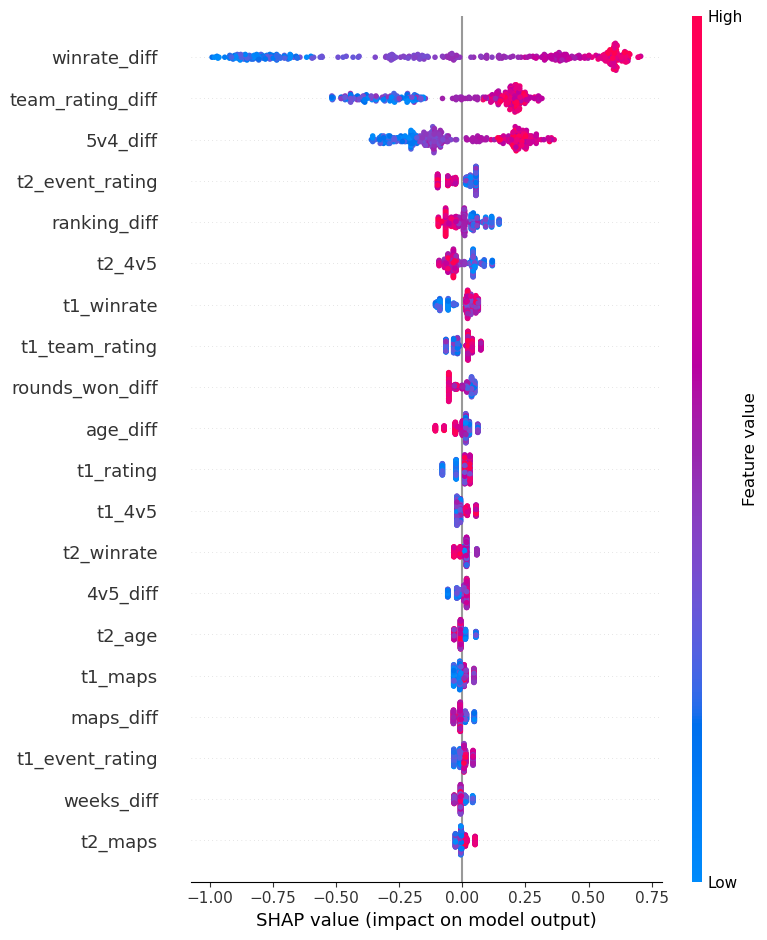

In [19]:
import shap

# Create an explainer
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X)

# Summarize the feature importance
shap.summary_plot(shap_values, X)

#### LGBM Features

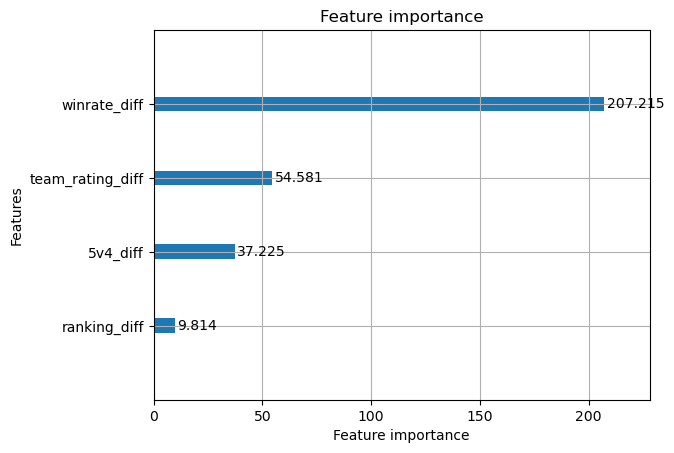

In [24]:
with open("models/lgb.pkl", "rb") as file:
    lgb_model = load(file)

# Plot feature importance
lgb.plot_importance(lgb_model, importance_type='gain', max_num_features=20)
plt.show()

In [25]:
importance = lgb_model.feature_importances_

# Associate the importance scores with feature names
feature_names = X.columns  # Replace with your feature names or column names

feature_importance = list(zip(feature_names, importance))

# Sort the features by importance
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print or visualize the sorted feature importance
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

winrate_diff: 8
team_rating_diff: 4
5v4_diff: 2
ranking_diff: 1
t1_winstreak: 0
t2_winstreak: 0
t1_h2h: 0
t2_h2h: 0
t1_ranking: 0
t2_ranking: 0
t1_weeks: 0
t2_weeks: 0
t1_age: 0
t2_age: 0
t1_rating: 0
t2_rating: 0
t1_winrate: 0
t2_winrate: 0
t1_5v4: 0
t2_5v4: 0
t1_4v5: 0
t2_4v5: 0
t1_maps: 0
t2_maps: 0
t1_pistol: 0
t2_pistol: 0
t1_rounds_lost: 0
t1_rounds_won: 0
t1_fp: 0
t1_fp_percent: 0
t2_rounds_lost: 0
t2_rounds_won: 0
t2_fp: 0
t2_fp_percent: 0
t1_team_rating: 0
t1_event_rating: 0
t2_team_rating: 0
t2_event_rating: 0
winstreak_diff: 0
h2h_diff: 0
weeks_diff: 0
age_diff: 0
rating_diff: 0
4v5_diff: 0
maps_diff: 0
pistol_diff: 0
rounds_lost_diff: 0
rounds_won_diff: 0
fp_percent_diff: 0
event_rating_diff: 0


#### CatBoost Features

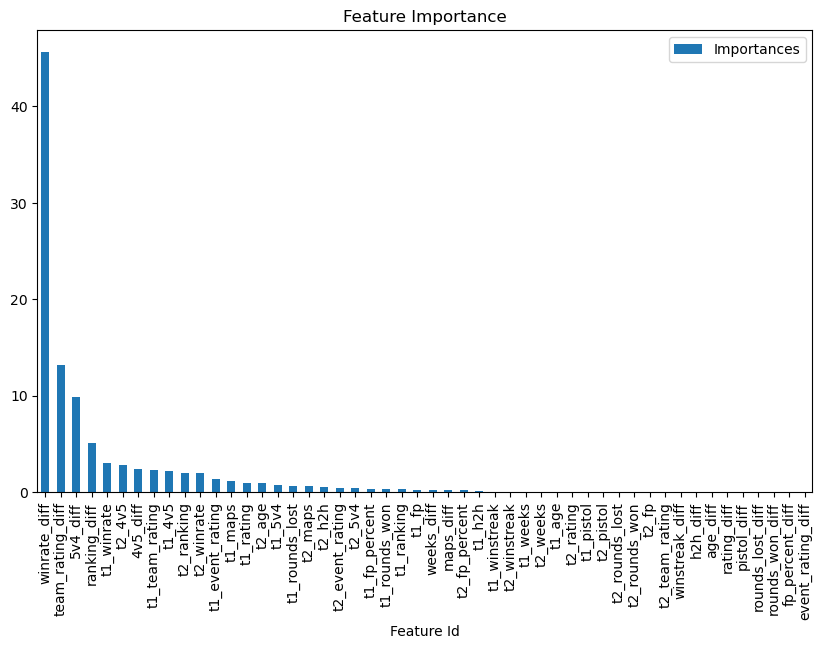

In [26]:
with open("models/cb.pkl", "rb") as file:
    cb_model = load(file)

# Plot feature importance
cb_model.get_feature_importance(prettified=True).plot(kind='bar', x='Feature Id', y='Importances', title='Feature Importance', figsize=(10, 6))
plt.show()

#### Logistic Regression Features

In [28]:
with open("models/logReg.pkl", "rb") as file:
    lr_model = load(file)

coefficients = lr_model.coef_[0]

feature_names = X.columns

feature_importance = list(zip(feature_names, abs(coefficients)))

feature_importance.sort(key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

t2_winrate: 4.324108129954361
t1_winrate: 4.232216984096449
team_rating_diff: 3.2609051731871177
h2h_diff: 2.025840693882167
rating_diff: 1.1494352212091106
ranking_diff: 0.9499772344960908
t1_team_rating: 0.8988886958196786
rounds_won_diff: 0.8721718053977364
t2_maps: 0.7425535257868829
t2_5v4: 0.7373977274585823
t1_fp_percent: 0.7206925190179417
t1_pistol: 0.7061253625459207
t1_ranking: 0.5489522760063819
t1_winstreak: 0.41838317515040296
t1_rounds_lost: 0.21377862195677466
t1_rounds_won: 0.19908121646714652
t2_fp: 0.09604571167214584
maps_diff: 0.04555060701426403
t1_fp: 0.016134443668915588
t2_winstreak: 0.0
t1_h2h: 0.0
t2_h2h: 0.0
t2_ranking: 0.0
t1_weeks: 0.0
t2_weeks: 0.0
t1_age: 0.0
t2_age: 0.0
t1_rating: 0.0
t2_rating: 0.0
t1_5v4: 0.0
t1_4v5: 0.0
t2_4v5: 0.0
t1_maps: 0.0
t2_pistol: 0.0
t2_rounds_lost: 0.0
t2_rounds_won: 0.0
t2_fp_percent: 0.0
t1_event_rating: 0.0
t2_team_rating: 0.0
t2_event_rating: 0.0
winstreak_diff: 0.0
weeks_diff: 0.0
age_diff: 0.0
winrate_diff: 0.0
5v4_di

In [29]:
from sklearn.feature_selection import RFE

selector = RFE(lr_model, n_features_to_select=1)

# Fit the selector and get ranking
selector = selector.fit(X, Y)
ranking = selector.ranking_

# Associate the ranking with feature names
feature_names = X.columns  # Replace with your feature names or column names

feature_ranking = list(zip(feature_names, ranking))

# Sort the features by ranking
feature_ranking.sort(key=lambda x: x[1])

# Print or visualize the sorted feature ranking
for feature, rank in feature_ranking:
    print(f"{feature}: Rank {rank}")

t1_winrate: Rank 1
t2_winrate: Rank 2
team_rating_diff: Rank 3
h2h_diff: Rank 4
rating_diff: Rank 5
ranking_diff: Rank 6
rounds_won_diff: Rank 7
t1_pistol: Rank 8
t2_5v4: Rank 9
t1_team_rating: Rank 10
t1_fp_percent: Rank 11
t2_maps: Rank 12
t1_ranking: Rank 13
t1_winstreak: Rank 14
t1_rounds_won: Rank 15
t1_rounds_lost: Rank 16
t2_fp: Rank 17
maps_diff: Rank 18
t1_fp: Rank 19
t1_maps: Rank 20
fp_percent_diff: Rank 21
t2_team_rating: Rank 22
t2_event_rating: Rank 23
winstreak_diff: Rank 24
t1_age: Rank 25
t2_weeks: Rank 26
t1_weeks: Rank 27
t2_ranking: Rank 28
rounds_lost_diff: Rank 29
t2_h2h: Rank 30
weeks_diff: Rank 31
t1_h2h: Rank 32
t2_winstreak: Rank 33
t2_age: Rank 34
t2_rounds_lost: Rank 35
t1_rating: Rank 36
t2_rating: Rank 37
t2_pistol: Rank 38
t2_rounds_won: Rank 39
pistol_diff: Rank 40
t2_fp_percent: Rank 41
t1_event_rating: Rank 42
age_diff: Rank 43
t1_5v4: Rank 44
winrate_diff: Rank 45
5v4_diff: Rank 46
4v5_diff: Rank 47
t1_4v5: Rank 48
t2_4v5: Rank 49
event_rating_diff: R

#### LDA Features

In [33]:
with open("models/LDA.pkl", "rb") as file:
    lda_model = load(file)

selector = RFE(lda_model, n_features_to_select=1)

# Fit the selector and get ranking
selector = selector.fit(X, Y)
ranking = selector.ranking_

# Associate the ranking with feature names
feature_names = X.columns  # Replace with your feature names or column names

feature_ranking = list(zip(feature_names, ranking))

# Sort the features by ranking
feature_ranking.sort(key=lambda x: x[1])

# Print or visualize the sorted feature ranking
for feature, rank in feature_ranking:
    print(f"{feature}: Rank {rank}")

winrate_diff: Rank 1
team_rating_diff: Rank 2
t2_winrate: Rank 3
t1_winrate: Rank 4
5v4_diff: Rank 5
t1_team_rating: Rank 6
t2_team_rating: Rank 7
ranking_diff: Rank 8
4v5_diff: Rank 9
rounds_won_diff: Rank 10
t2_5v4: Rank 11
t1_5v4: Rank 12
event_rating_diff: Rank 13
t1_fp: Rank 14
t2_4v5: Rank 15
t1_4v5: Rank 16
h2h_diff: Rank 17
t1_pistol: Rank 18
t1_fp_percent: Rank 19
t1_rounds_won: Rank 20
t2_rounds_won: Rank 21
t2_event_rating: Rank 22
t1_event_rating: Rank 23
t1_ranking: Rank 24
t2_ranking: Rank 25
pistol_diff: Rank 26
t1_winstreak: Rank 27
rating_diff: Rank 28
t1_rating: Rank 29
t2_maps: Rank 30
weeks_diff: Rank 31
fp_percent_diff: Rank 32
t1_h2h: Rank 33
t1_rounds_lost: Rank 34
t2_h2h: Rank 35
t2_weeks: Rank 36
t2_rating: Rank 37
winstreak_diff: Rank 38
t1_weeks: Rank 39
t2_fp: Rank 40
rounds_lost_diff: Rank 41
maps_diff: Rank 42
t2_pistol: Rank 43
t2_winstreak: Rank 44
t2_age: Rank 45
t1_maps: Rank 46
t2_fp_percent: Rank 47
age_diff: Rank 48
t2_rounds_lost: Rank 49
t1_age: R